<center> <h1> The Smith Parasite - An Unknown Parasitic Disease </h1> </center> <br>

# Table of Contents

* [1. Metadata](#Metadata)
* [2. Introduction](#Introduction)
* [3. Initial Treatment](#InitialTreatment)
    * [3.1. Import Libraries](#ImportLibraries)
    * [3.2. Auxiliary Functions](#AuxiliaryFunctions)
    * [3.3. Extract data and join datasets](#Extractdataandjoindatasets)
* [4. Data Exploration](#DataExploration)
    * [4.1. Coherence Check](#CoherenceCheck)
        * [4.1.1. General Exploration](#GeneralExploration)
        * [4.1.2. Categorical Features](#CategoricalFeatures)
        * [4.1.3. Numerical Features](#NumericalFeatures)
* [5. Data Pre-Processing](#DataPre-Processing)
    * [5.1. Missing and inconsistent values](#Missingandinconsistentvalues)
    * [5.2. Feature Engineering](#FeatureEngineering)
    * [5.3. Handling outliers](#Handlingoutliers)
    * [5.4. One-Hot-Encoding](#One-Hot-Encoding)
    * [5.5. Feature Scaling](#FeatureScaling)
* [6. Feature Selection](#FeatureSelection)
    * [6.1. Filter Methods](#FilterMethods)
        * [6.1.1. Pearson Correlation](#PearsonCorrelation)
        * [6.1.2. ANOVA method](#ANOVAmethod)
    * [6.2. Wrapper Methods](#WrapperMethods)
        * [6.2.1. Recursive Feature Elimination](#RecursiveFeatureElimination)
    * [6.3. Embedded Methods](#EmbeddedMethod)
        * [6.3.1. Lasso Method](#LassoMethod)
        * [6.3.2. Ridge Method](#RidgeMethod)
        * [6.3.3. Random Forest](#RandomForest)
        * [6.3.4. Deicision Tree](#DecisionTree)
    * [6.4. Summary](#Summary)
* [7. Model Selection](#ModelSelection)
    * [7.1. Data Partition](#DataPartition)
    * [7.2. Predective Modelling](#PredictiveModelling)
        * [7.2.1. Run models without Scaler and Feature Selection](#RunmodelswithoutScalerandFeatureSelection)
        * [7.2.2. Run models with Scaler](#RunmodelswithScaler)
        * [7.2.3. Run models with Scaler and Feature Selection](#RunmodelswithScalerandFeatureSelection)
        * [7.2.4. ROC Curve](#ROCCurve)
        * [7.2.5. Hyperparameter tuning](#Hyperparametertuning)
    * [7.3. Results](#Results)
* [8. Conclusion](#Conclusion)

<a class="anchor" id="Metadata">

# 1. Metdata

</a>

## File descriptions  
- *train_demo.csv* - the training set for demographic data and the target
- *train_health.csv* - the training set for health related data
- *train_habits.csv* - the training set for habits related data
- *test_demo.csv* - the test set for demographic data
- *test_health.csv* - the test set for health related data
- *test_habits.csv* - the test set for habits related data
- *sampleSubmission.csv* - a sample submission file in the correct format

## Data fields  
### Sociodemographic Data
- *PatientID* - The unique identifier of the patient
- *Birth_Year* - Patient Year of Birth
- *Name* - Name of the patient
- *Region* - Patient Living Region
- *Education* - Answer to the question: What is the highest grade or year of school you have?
- *Disease* - The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0)  

### Health Related Data
- *PatientID* - The unique identifier of the patient
- *Height* - Patient"s height
- *Weight* - Patient"s weight
- *Checkup* - Answer to the question: How long has it been since you last visited a doctor for a routine Checkup? [A routine Checkup is a general physical exam, not an exam for a specific injury, illness, or condition.]
- *Diabetes* - Answer to the question: (Ever told) you or your direct relatives have diabetes?
- *High_Cholesterol* - Cholesterol value
- *Blood_Pressure* - Blood Pressure in rest value
- *Mental Health* - Answer to the question: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?
- *Physical Health* - Answer to the question: Thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?

### Habits Related Data
- *PatientID* - The unique identifier of the patient
- *Smoking_Habit* - Answer to the question: Do you smoke more than 10 cigars daily?
- *Drinking_Habit* - Answer to the question: What is your behavior concerning alcohol consumption?
- *Exercise* - Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more?
- *Fruit_Habit* - Answer to the question: How many portions of fruits do you consume per day?
- *Water_Habit* - Answer to the question: How much water do you drink per day?

<a class="anchor" id="Introduction">

# 2. Introduction

</a>

The data shows that we have a supervised classification problem. We defined supervised learning due to the labeled input data and the fact that the data is being classified into a catogory. As the dependent variable disease gives information whether a person is infected or not. Moreover, the dependent variable disease is evenly distributed. Thus, we have a balanced dataset.

For the data analysis two subsets were provided. The train set contains 800 Patients with 411 Patients having the disease (Disease = 1) and 389 without having the disease (Disease = 0). It involves ten categorical features as well as eight numerical including the dependent variable Disease. The test dataset contains 225 entries with unseen data.

In the following analysis, the train dataset is analyzed and transformed. After processing the dimensionality of a dataset and handling outliers as well as missing values, various Feature Selection techniques are performed. Moreover, selected Machine Learning algorithms for supervised classification are introduced to run the defined models and find the most accurate result for the analysis.

<a class="anchor" id="InitialTreatment">

# 3. Initial Treatment

</a>

<a class="anchor" id="ImportLibraries">

## 3.1. Import Libraries

</a>

In [4]:
# Import the required libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import scipy.stats as stats
from scipy.stats import f_oneway
from collections import defaultdict

# Imports from sklearn for Pre-Processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer

# Import from sklearn for Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LassoCV,  Ridge

# Import from sklearn for Model selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFECV
from scipy.stats import pearsonr
from sklearn.feature_selection import f_classif

#Models not in class
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, VotingClassifier, BaggingClassifier


sns.set_theme(style="darkgrid")

<a class="anchor" id="Auxiliaryfunctions">

## 3.2. Auxiliary functions

</a>

#### Functions for Data Exploration

In [5]:
# Plotting Histogram and Boxplot for numerical features.

def visualize_numerical(dataset, target):
    
    ''' Visualizes the numerical features with a boxplot and histogram.

    # Arguments:
    dataset, pd DataFrame: input dataframe
    target, pd Series: target variable for hue colouring

    # Results:
    Shows the boxplot and histogram.
    
    '''
    
    figure, axis = plt.subplots(1, 2, figsize=(12, 6))
  
    sns.boxplot(ax= axis[0], x=target, y=dataset, hue=target, dodge=False)
    axis[0].set_title(f"Boxplot of {dataset.name}", fontdict= {"fontsize": 14})
    
    sns.histplot(ax= axis[1], x=dataset, kde=True, hue=target)
    axis[1].set_title(f"Histogram of {dataset.name}", fontdict= {"fontsize": 14})

    plt.show()
    

In [6]:
# Plotting Countplot and histogram for categorical features.

def visualize_categorical(dataset, target):

    ''' Visualizes the categorical features through bar charts.

    # Argument:
    dataset, pd DataFrame: input dataframe
    categorical_features, list: list with column names
    hue, string: optionally Disease because this is our target variable
    
    # Returns: 
    Shows a countplot and histogram (to understand the variabes proportionally).
    '''

    figure, axis = plt.subplots(1,2, figsize=(12, 6))

    figure.set_figwidth(22)
    figure.set_figheight(6)

    sns.countplot(x=dataset, ax=axis[0], hue=target)
    axis[0].set_title(f"Countplot of {dataset.name}", fontdict= {"fontsize": 14})
    axis[0].tick_params(axis='x', labelrotation=90)

    sns.histplot(x=dataset, ax=axis[1], hue=target, stat="probability", multiple="fill", shrink=0.5)
    axis[1].set_title(f"Histogram of {dataset.name}", fontdict= {"fontsize": 14})
    axis[1].tick_params(axis='x', labelrotation=90)


    plt.show()

#### Functions for Data Pre-Processing

In [7]:
# Capping Functions
# https://wellsr.com/python/outlier-data-handling-with-python/#:~:text=Capping%20Outliers%20using%20Fixed%20Quantiles&text=In%20such%20cases%20you%20can,the%20records%20in%20the%20dataset.

def outlier_capping(data, outlier_features):

    ''' Caps outliers using the IQR ranges to replace outlier values with a maximum
    or minimum capped value.

    # Arguments:
    data,. pd Dataframe: Input dataframe
    outlier_features, list: feature names with outliers

    # Returns:
    data, pd Dataframe: dataframe with capped outliers
    '''

    # Loops through each feature with outliers.
    for feature in outlier_features:

            # Defines the first and third quantile of each feature.
            Q1 = data[feature].quantile(0.25)
            Q3 = data[feature].quantile(0.75)

            # Calculating the IQR range.
            IQR = Q3 - Q1

            # Calculating the lower and upper whisker
            lower_whisker = Q1 - (1.5 * IQR)
            upper_whisker = Q3 + (1.5 * IQR)

            # Replaces all values below the lower whisker and
            # above the upper whisker with the lower or upper whisker values.
            data[feature] = np.where(data[feature] > upper_whisker, upper_whisker,
                            np.where(data[feature] < lower_whisker, lower_whisker,
                            data[feature]))
    return data

In [8]:
# Removal of outliers

def outlier_trimming(data, numerical_features):
    
    ''' Removes outliers from the dataset with IQR method by removing all the values 
    above or below the upper and lower whiskers.

    # Arguments:
    data, pd DataFrame: input dataframe
    numerical_features, list: list of numerical features

    # Returns:
    train_df_removed_outliers, pd DataFrame: dataframe with outlier removed
    '''

    Q1 = data[numerical_features].quantile(0.25)
    Q3 = data[numerical_features].quantile(0.75)
    IQR = Q3 - Q1

    filters = (
        (data['Age']<Q3['Age']+1.5*IQR['Age'])
        &
        (data['Age']>Q1['Age']-1.5*IQR['Age'])
        &
        (data['Mental_Health']<Q3['Mental_Health']+1.5*IQR['Mental_Health'])
        &
        (data['Mental_Health']>Q1['Mental_Health']-1.5*IQR['Mental_Health'])
        &
        (data['Physical_Health']<Q3['Physical_Health']+1.5*IQR['Physical_Health'])
        &
        (data['Physical_Health']>Q1['Physical_Health']-1.5*IQR['Physical_Health'])
        &
        (data['High_Cholesterol']<Q3['High_Cholesterol']+1.5*IQR['High_Cholesterol'])
        &
        (data['High_Cholesterol']>Q1['High_Cholesterol']-1.5*IQR['High_Cholesterol'])
        &
        (data['Blood_Pressure']<Q3['Blood_Pressure']+1.5*IQR['Blood_Pressure'])
        &
        (data['Blood_Pressure']>Q1['Blood_Pressure']-1.5*IQR['Blood_Pressure'])
        &
        (data['Height']<Q3['Height']+1.5*IQR['Height'])
        &
        (data['Height']>Q1['Height']-1.5*IQR['Height'])
    )

    train_df_removed_outliers = data[filters]

    percentage_removed_rows = (data.shape[0] - train_df_removed_outliers.shape[0]) / data.shape[0] * 100
    amount_removed_rows = (data.shape[0] - train_df_removed_outliers.shape[0])

    print(f'Removed {amount_removed_rows} rows, which equals {percentage_removed_rows} % of the original dataset.')

    return train_df_removed_outliers

In [9]:
# One-Hot-Encoding

def one_hot_encoding(data, categorical_features):
    
    ''' Applies one-hot-encoding to all categorical features of the data.

    # Argument:
    data, pd DataFrame: input dataframe
    categorical_features, list: list with column names
    
    # Returns: 
    merged_dataframe, pd DataFrame: one-hot-encoded dataframe
    '''

    enc = OneHotEncoder()

    encoded_df = pd.DataFrame(enc.fit_transform(data[categorical_features]).toarray(), 
                                index=data.index, 
                                columns=enc.get_feature_names_out()
                             )

    # encoded_df.columns = enc.get_feature_names_out()

    merged_dataframe = data.drop(categorical_features, axis=1).merge(encoded_df, how="right", left_index=True, right_index=True)

    return merged_dataframe


In [10]:
# # Calls a Scaler and One-Hot-Encoder

# def scale_and_encode(data, categorical_features, numerical_features, scaler):
    
#     """ Applies a scaler to numerical features and one-hot-encoding to categorical features.

#     # Arguments:
#     data, pd DataFrame: Input dataframe
#     categorical_features, list: List with column names
#     numerical_features, list: List with column names
#     scaler, sklearn class: Scaler from sklearn preprocessing library

#     # Returns:
#     scal_enco_dataset, pd DataFrame: scaled and encoded dataset
#     """

#     # Define the ColumnTransformer with OneHotEncoder and selected scaler.
#     c_transformer = ColumnTransformer([
#                                         ("num", scaler, numerical_features),
#                                         ("cat", OneHotEncoder(), categorical_features)
#                                         ])

#     # Transformes the numerical variables with the selected scaler and
#     # the categorical variables with the OneHotEncoder().
#     transformed_data = c_transformer.fit_transform(data)

#     # Saves the feature names from the OnehotEncoder and Scaler in a list
#     column_names = list(c_transformer.transformers_[0][1].feature_names_in_) + list(c_transformer.transformers_[1][1].get_feature_names_out())

#     # Saves the new dataset.
#     scal_enco_dataset = pd.DataFrame(transformed_data, index=data.index, columns=column_names)

#     return scal_enco_dataset

In [11]:
# # Calls a Scaler and One-Hot-Encoder

# def scale_data(data, numerical_features, scaler):
    
#     """ Applies a scaler to numerical features and one-hot-encoding to categorical features.

#     # Arguments:
#     data, pd DataFrame: Input dataframe
#     numerical_features, list: List with column names
#     scaler, sklearn class: Scaler from sklearn preprocessing library

#     # Returns:
#     data, pd DataFrame: Input dataframe with scaled numerical features
#     c_transformer, ColumnTransformer class: fitted ColumnTransformer with respective scaler

#     """

#     # Define the ColumnTransformer with OneHotEncoder and selected scaler.
#     c_transformer = ColumnTransformer([
#                                         ("num", scaler, numerical_features)
#                                         ])

#     # Transformes the numerical variables with the selected scaler.
#     c_transformer.fit(data)
#     transformed_data = c_transformer.transform(data)

#     # Saves the feature names from the OnehotEncoder and Scaler in a list
#     column_names = list(c_transformer.transformers_[0][1].feature_names_in_)# + list(c_transformer.transformers_[1][1].get_feature_names_out())

#     # Saves the new dataset.
#     scal_dataset = pd.DataFrame(transformed_data, index=data.index, columns=column_names)

#     data = scal_dataset.merge(data.drop(numerical_features, axis=1), left_index=True, right_index=True)

#     return data, c_transformer

In [12]:
# Calls a Scaler and One-Hot-Encoder

def scale_data(data, numerical_features, scaler):
    
    """ Applies a scaler to numerical features and one-hot-encoding to categorical features.

    # Arguments:
    data, pd DataFrame: Input dataframe
    numerical_features, list: List with column names
    scaler, sklearn class: Scaler from sklearn preprocessing library

    # Returns:
    scal_dataset, pd DataFrame: Input dataframe with scaled numerical features
    c_transformer, ColumnTransformer class: fitted ColumnTransformer with respective scaler

    """

    # Define the ColumnTransformer with OneHotEncoder and selected scaler.
    c_transformer = ColumnTransformer([("num", scaler, numerical_features)], 
                                        remainder="passthrough")

    # Transformes the numerical variables with the selected scaler.
    c_transformer.fit(data)
    transformed_data = c_transformer.transform(data)

    # Saves the new dataset.
    scal_dataset = pd.DataFrame(transformed_data, index=data.index, columns=data.columns)

    return scal_dataset, c_transformer

In [13]:
# Returns scaled and encoded datasets.

def return_scale_datasets(data, numerical_features):
    
    ''' Applies each scaler and on the dataset and saves in a dictionary.
    The different scaled and encoded datasets can be accessed via following keys:
    - "standard": StandardScaler(),
    - "minmax": MinMaxScaler()
    - "minmaxminus": MinMaxScaler(feature_range=(-1,1)
    - "robust": RobustScaler()
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    numerical_features, list: List with column names

    # Returns:
    scal_dict, dictionary: dictionary with scaled datasets

    '''

    scaler_list = {"standard": StandardScaler(), 
                    "minmax": MinMaxScaler(), 
                    "robust": RobustScaler(), 
                    "minmaxminus": MinMaxScaler(feature_range=(-1,1))
                    }

    scal_dict = {}

    for key in scaler_list:

        scal_dataset, c_transformer = scale_data(data, 
                                                      numerical_features, 
                                                      scaler_list.get(key)
                                                      )

        scal_dict[key] = [scal_dataset, c_transformer] 

    return scal_dict


In [14]:
#Scales the validation data
def scale_validation_data(dict, key, X_val):

    ''' Scales the validation data with respective scaler.

    # Arguments:
    dict, dictionary = dictionary with scaled dataset and fitted scaler
    key, string = key for dictionary to access desired dataset and scaler
    X_val, pd Dataframe = validation data

    # Returns:
    scal_dataset = scaled validation data
    '''

    scaler = dict[key][1]
    dataset = dict[key][0]

    scaled_features = scaler.transform(X_val)

    # Saves the new dataset.
    scal_dataset = pd.DataFrame(scaled_features, index=X_val.index, columns=dataset.columns)

    return scal_dataset

#### Functions for Feature Selection

In [15]:
# Feature Selection Method Chi-Square Test of independence. 
# Determines significant relationship between two categorical variables.

def chi_square_test(data, target, categorical_feature, alpha=0.05):     
    
    ''' Applies Chi-Square test on the categorical features to understand their importance for the models.
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    target, pd DataFrame: Input dataframe
    categorical_feature, string: column name of the dataframe
    alpha, float: max probability value

    # Returns:
    Which categorical variables are good for the models
    
    '''
    obs = pd.crosstab(target, data) 

    chi2, p, dof, expected = stats.chi2_contingency(obs.values)

    # expect = pd.DataFrame(expected, columns=obs.columns, index = obs.index)

    if p < alpha:
        
        print(f"{categorical_feature} is a good predictor")

In [16]:
# Feature Selection Method RFE is a wrapper method, that searches for an optimal feature subset. 
# Fits the model and removes the weakest feature until the specified number of features is reached.

def RFE_model(model, n_feat, input_data, target_data):
    
    
    ''' Find what are the variables that improve the accuracy the most
    
    # Arguments:
    model, : algorithm 
    n_feat, integer: number of features that we want to have in the end
    input_data, dataframe: all independent variables information
    target_data, Series: all the information of the target variable

    # Returns:
    The predefined number of features that are the best for the model'''
    
    
    #n_feat is the number of features you want to keep
    rfe = RFE(estimator = model, n_features_to_select = n_feat)
    X_rfe = rfe.fit_transform(X = input_data, y = target_data)

    selected_features = pd.Series(rfe.support_, index = input_data.columns)
    return selected_features[selected_features==True].index.to_list()
    
# Model is the algorithm to select, ex: LogisticRegression()

In [17]:
# Here, the Feature Selection is being integrated into the classifier algorithm. 
# The classifier adjusts its internal parameters and determines the appropriate relevance 
# for each feature to result the most accurate classification.
# We introduce 4 different embedded methods.
def Embedded(method, method_name, input_data, target_data):
    
    ''' Find what are the variables that improve the accuracy the most
    
    # Arguments:
    method, : embedded method - Lasso or Ridge
    method_name, string: name of the choosen method
    input_data, dataframe: all independent variables information
    target_data, Series: all the information of the target variable

    # Returns:
    How many features were discarded; A plot with the the coeficcients of each feature'''

    method = method
    method.fit(input_data, target_data)
    coef = pd.Series(method.coef_, index = input_data.columns)

    return print(method_name+"picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables"), plot_importance(coef,method_name)

In [18]:
def plot_importance(coef,name):
    
    ''' Plot the coeficients and its feature names to see what are the most important features
    
    # Arguments:
    coef, Series : Series with the coeficients and its feature names
    name, string: name of the choosen method

    # Returns:
    A plot the coeficients and its feature names'''
    
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()


In [19]:
def scaler_importances(model):
    
    ''' This function will show a plot for the four different scalers we chose based on the model you want to use it for
    
    # Arguments: 
    model: The model we want to use(Lasso or Ridge )
    
    # Returns: 
    a plot of all the different scalers
    '''
    
 
    # Load data
    X1 = X_train_enc_scale_robust
    X2 = X_train_enc_scale_minmax
    X3 = X_train_enc_scale_standard
    X4 = X_train_enc_scale_minmax_minus
    y = y_train
    
    # Create a Lasso model
    #model = LassoCV()
    
    # Train the model on the scaled data
    model.fit(X1, y)
    
    # Extract feature names and importances
    feature_names1 = X1.columns
    importances1 = model.coef_
    importances1 = pd.Series(importances1, index=X_train.columns)
    importances1 = importances1.sort_values()
    
    # Train the model on the scaled data
    model.fit(X2, y)
    # Extract feature names and importances
    feature_names2 = X2.columns
    importances2 = model.coef_
    importances2 = pd.Series(importances2, index=X_train.columns)
    importances2 = importances2.sort_values()
    
    # Train the model on the scaled data
    model.fit(X3, y)
    
    # Extract feature names and importances
    feature_names3 = X3.columns
    importances3 = model.coef_
    importances3 = pd.Series(importances3, index=X_train.columns)
    importances3 = importances3.sort_values()
    
    # Train the model on the scaled data
    model.fit(X4, y)
    
    # Extract feature names and importances
    feature_names4 = X4.columns
    importances4 = model.coef_
    importances4 = pd.Series(importances4, index=X_train.columns)
    importances4 = importances4.sort_values()
    
    # Create a figure with multiple subplots
    f, ax = plt.subplots(figsize=(15,70), nrows=4, ncols=1)
    
    # Iterate over the dataframes and plot the data on the subplot
    for df, color, ax in zip([importances1, importances2, importances3, importances4], ['r', 'g', 'b', 'y'], ax):
        ax.barh(df.index, df.values, color=color)
        ax.legend(['RobustScaler', 'MinMaxScaler', 'StandardScaler', 'MinMaxMinusScaler'])
    
    # Show the plot
    return plt.show()
    

In [20]:
def plot_tree_importance(model,X,y):
    
    ''' Plot a Barblot of the feature importance of the different Models in ordeer to visualize them.
    This works for Decision tree and random forest.
    
    # Arguments:
    model: algorithm
    X,dataframe: independent variables
    y,dataframe: target variable
    
    # Returns:
    A Barplot of feature importance'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
    
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    forest_importances = pd.Series(importances, index=X_train.columns)
    forest_importances = forest_importances.sort_values()


    f, ax = plt.subplots(figsize=(10,10))
    return forest_importances.plot(kind='barh')

In [21]:
def feature_list(model,X,y):
    
    '''Creates and returns a List of the most important Features of a model using crossvalidation. This list can later
    be used to train the models on the selected features.
    
    #  Arguments:
    model: algorithm
    X,dataframe: independent variables
    y,dataframe: target variable
    
    # Returns a List of most important features after crossvalidating'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
    
    rfe = RFECV(model,cv=3)
    
    rfe = rfe.fit(X_train,y_train)
    
    f_list = np.array(X.columns.values.tolist())[rfe.get_support()].tolist()
    
    return f_list

#### Functions for Modeling

In [22]:
def return_f1_score(data, target, classifier):
        
    ''' Returns the F1 score of all models.
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    target, pd Series: Input target variable
    classifier, dictionary: dictionary with sklearn classifier classes

    # Returns:
    result_table, pd Dataframe: dataframe with train and test score.

    '''

    all_scores_train, all_scores_test = defaultdict(list), defaultdict(list)

    result_table = pd.DataFrame(columns = ["Classifiers", "Train_F1_Score", "Test_F1_Score"])

    # skf = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

    for train_index, test_index in skf.split(data,target):

        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        for clf in classifier:

            selected_clf = clf.fit(X_train, y_train)

            y_pred_train = selected_clf.predict(X_train)
            y_pred_test = selected_clf.predict(X_test)

            f1_score_train = f1_score(y_train, y_pred_train)
            f1_score_test = f1_score(y_test, y_pred_test)

            all_scores_train[clf.__class__.__name__].append(f1_score_train)
            all_scores_test[clf.__class__.__name__].append(f1_score_test)


    for (clf_train, train_score), (clf_test, test_score) in zip(all_scores_train.items(), all_scores_test.items()):

        result_table.loc[len(result_table)] =  [clf_train, 
                                                np.round(np.mean(train_score), 4), 
                                                np.round(np.mean(test_score), 4)]  

    return result_table
        

In [23]:
def run_gridsearch(data, target, classifier, classifier_parameters):
        
    ''' Following steps are executed:
    1. Scaling of numerical features with given scaling class in parameter scaler
    2. One-Hot-encoding of categorical features
    3. Hyperparameter tuning with GridSearchCV() per given classifier and hyperparameters
    4. Creation of a dataframe with best hyperparameters and train and test score. 
    
    # Arguments:
    data, pd DataFrame: Input dataframe
    target, pd Series: Input target variable
    cat_features, list: List with categorical feature names
    num_features, list: List with numercial feature names
    classifier, dictionary: dictionary with sklearn classifier classes
    classifier_parameters, dictionary: dictionary with sklearn classifier class hyperparameters

    # Returns:
    result_table, pd Dataframe: dataframe with best hyperparameters and scores.
    grid_dict, dictionary: dictionary with all hyperparameter combinations of the model.
    
    '''

    result_table = pd.DataFrame(columns=["Classifiers", 
                                                "Mean_Train_f1_Score", 
                                                "Std_Train_f1_Score", 
                                                "Mean_Test_f1_Score", 
                                                "Std_Test_f1_Score", 
                                                "Parameters"]
                                        )
    grid_dict = {}


    for clf in classifier.keys():


        # https://scikit-learn.org/stable/modules/model_evaluation.html
        # For reference f1 scoring

        grid = GridSearchCV(
                            classifier[clf],
                            param_grid= classifier_parameters[clf],
                            cv= StratifiedKFold(random_state=42, n_splits=10, shuffle=True),
                            n_jobs = 8,
                            verbose= 0,
                            return_train_score=True,
                            scoring="f1"
                            )

        grid.fit(data, target)

        best_train_score = grid.cv_results_["mean_train_score"][grid.best_index_]
        std_train_score = grid.cv_results_["std_train_score"][grid.best_index_]
        std_test_score = grid.cv_results_["std_test_score"][grid.best_index_]

        temporary_table = pd.DataFrame({"Classifiers": [classifier[clf].__class__.__name__],
                                                "Mean_Train_f1_Score": [round(best_train_score, 4)],
                                                "Std_Train_f1_Score": [round(std_train_score, 4)],
                                                "Mean_Test_f1_Score": [round(grid.best_score_, 4)],
                                                "Std_Test_f1_Score": [round(std_test_score, 4)],
                                                "Parameters": [grid.best_params_]}
                                                )

        # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.append.html more efficient method
        result_table = pd.concat([result_table, temporary_table], ignore_index=True)
        
    #     print(f"{classifier[clf].__class__.__name__} best parameters: \n {grid.best_params_}")
    #     print("-------------------------------------------------------------------------")

        grid_dict[classifier[clf].__class__.__name__] = grid


    # best_clf = result_table.loc[result_table["Mean_Test_Score"].argmax(), "Classifiers"]
    # clf_best_score = result_table["Mean_Test_Score"].max()

    # print(f"Model with the best score: \n {best_clf} {clf_best_score}")
    # display(result_table)    

    return result_table, grid_dict
        

In [24]:
def run_model_with_datasets(data_list, target, classifier, classifier_parameters):
    ''' Takes all datasets from data_list and applies all models used in classifier.

    # Arguments:
    data_list, pd Dataframe: Input dataframe
    target, pd Series: Input target variable
    classifier, dictionary: dictionary with sklearn classifier classes
    classifier_parameters, dictionary: dictionary with sklearn classifier class hyperparameters

    # Returns:
    dataset_table, pd Dataframe: dataframe with best scores for all datasets
    
    '''

    best_estimator_dict = {}

    dataset_table = pd.DataFrame(columns=["Dataset",
                                          "Classifiers", 
                                          "Mean_Train_Score", 
                                          "Std_Train_Score", 
                                          "Mean_Test_Score", 
                                          "Std_Test_Score", 
                                          "Parameters"]
                                )

    for index, dataset in enumerate(data_list.keys()):

        result_table, grid_dict = run_gridsearch(
                                            data= data_list[dataset],
                                            target= target,
                                            classifier= classifier,
                                            classifier_parameters= classifier_parameters
                                            )


        best_clf = result_table.loc[result_table["Mean_Test_Score"].argmax()]

        best_estimator_dict[f"{best_clf[0]}.{index}"] = grid_dict[best_clf[0]].best_estimator_
        
        dataset_name = pd.Series({"Dataset": dataset})
        best_clf = pd.concat([best_clf, dataset_name])

        dataset_table.loc[len(dataset_table)] =  best_clf

    return dataset_table, best_estimator_dict

In [25]:
from sklearn.metrics import  RocCurveDisplay

def plot_roc_curves(classifier, X_train, X_test, y_train, y_test):
    """
    Plots the ROC curve for any given classifier.

    # Arguments:
        classifier, list: list of selected models
        X_train, pd.Dataframe: training data
        X_test, pd.Dataframe: test data
        y_train, pd.Series: training labels
        y_test, pd.Series: test labels

    # Returns:
        ROC curve plot
    """
    
    # Define the first subplot, to plot all ROC curves in one graph.
    fig1, axis = plt.subplots(1, figsize=(8,6))

    # Loops the classifiers.
    for clf in classifier:

        # Fit the models and display the ROC curves.
        clf.fit(X_train, y_train)
        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=axis, name=clf.__class__.__name__)

    axis.set(title="ROC Curve")
    axis.plot()

    # Define a second subplot, to plot for each ROC curve a graph.
    plt.figure(figsize=(15,12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle("ROC Curves Single")

    for n, clf in enumerate(classifier):
        
        ax = plt.subplot(3, 2, n + 1)
        
        RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, name=clf.__class__.__name__)

        ax.set_title(clf.__class__.__name__)
    

<a class="anchor" id="Extractdataandjoindatasets">

## 3.3. Extract data and join datasets

</a>

In [26]:
# Import each xlsx file in a pandas dataframe.

train_demo = pd.read_excel("Data/train_demo.xlsx")
train_habits = pd.read_excel("Data/train_habits.xlsx")
train_health = pd.read_excel("Data/train_health.xlsx")

# Combine the 3 datasets in one dataframe.
train_df = train_demo.merge(train_habits, on="PatientID").merge(train_health, on="PatientID")

# Check, if all data was correctly imported.
train_df.head(3)

PatientID                Name  Birth_Year                    Region  \
0       1167  Mrs. Stephanie Gay        1965                    London   
1       1805    Mr. Sherman Nero        1969                South West   
2       1557     Mr. Mark Boller        1974  Yorkshire and the Humber   

                                     Education  Disease Smoking_Habit  \
0  High School Incomplete (10th to 11th grade)        1            No   
1  High School Incomplete (10th to 11th grade)        1            No   
2         Elementary School (1st to 9th grade)        1            No   

                        Drinking_Habit Exercise  \
0  I usually consume alcohol every day      Yes   
1   I consider myself a social drinker      Yes   
2   I consider myself a social drinker       No   

                                       Fruit_Habit  \
0  Less than 1. I do not consume fruits every day.   
1  Less than 1. I do not consume fruits every day.   
2  Less than 1. I do not consume fruits every day.   

                                      Water_Habit  Height  Weight  \
0                Between one liter and two liters     155      67   
1                Between one liter and two liters     173      88   
2  More than half a liter but less than one liter     162      68   

   High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
0               358             120             21                2   
1               230             142              9                0   
2               226             122             26                0   

             Checkup                                          Diabetes  
0  More than 3 years  Neither I nor my immediate family have diabetes.  
1           Not sure  Neither I nor my immediate family have diabetes.  
2  More than 3 years  Neither I nor my immediate family have diabetes.

In [27]:
# Setting the PatiendID as index for the dataset.

train_df.set_index("PatientID", inplace=True)

<a class="anchor" id="DataExploration">

## 4. Data Exploration
</a>

<a class="anchor" id="CoherenceCheck">

## 4.1. Coherence Check

</a>


<a class="anchor" id="GeneralExploration">

### 4.1.1. General Exploration

</a>

In [28]:
# Create a copy of the train dataset for further exploration tasks
# to avoid changing our original dataset.

train_df_explo = train_df.copy()

In [29]:
# By checking the first 5 rows of the dataset we can make 
# the first observations:

# The Name column includes the titel Mrs. and Mr., which can be used to create a binary column Gender.
# We have a mix of several categorical and numerical columns, which should be analyzed one by one later on.

train_df_explo.head()

Name  Birth_Year                    Region  \
PatientID                                                             
1167       Mrs. Stephanie Gay        1965                    London   
1805         Mr. Sherman Nero        1969                South West   
1557          Mr. Mark Boller        1974  Yorkshire and the Humber   
1658         Mr. David Caffee        1958                    London   
1544         Mr. Gerald Emery        1968                South East   

                                             Education  Disease Smoking_Habit  \
PatientID                                                                       
1167       High School Incomplete (10th to 11th grade)        1            No   
1805       High School Incomplete (10th to 11th grade)        1            No   
1557              Elementary School (1st to 9th grade)        1            No   
1658             University Complete (3 or more years)        0            No   
1544              University Incomplete (1 to 2 years)        1            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   
1658       I usually consume alcohol every day      Yes   
1544        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   
1658       Less than 1. I do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1167                     Between one liter and two liters     155      67   
1805                     Between one liter and two liters     173      88   
1557       More than half a liter but less than one liter     162      68   
1658       More than half a liter but less than one liter     180      66   
1544       More than half a liter but less than one liter     180      58   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1167                    358             120             21                2   
1805                    230             142              9                0   
1557                    226             122             26                0   
1658                    313             125             13                8   
1544                    277             125             18                2   

                     Checkup  \
PatientID                      
1167       More than 3 years   
1805                Not sure   
1557       More than 3 years   
1658                Not sure   
1544       More than 3 years   

                                                    Diabetes  
PatientID                                                     
1167        Neither I nor my immediate family have diabetes.  
1805        Neither I nor my immediate family have diabetes.  
1557        Neither I nor my immediate family have diabetes.  
1658       I have/had pregnancy diabetes or borderline di...  
1544       I have/had pregnancy diabetes or borderline di...

In [30]:
# Call method info() to get a summary of the dataset
# 
# The patient dataset contains 800 entries.
# The data has in total 18 features including the target feature Disease.
# 10 columns are dtype object, which can be classified as categorical features.
# 8 columns are dtype integer (including Disease), which are the numerical features.
# Our target variable Disease is stored as dtype int, but can be seen as a categorical feature, 
# because the feature only has the values 0 (False) or 1 (True).

# Only the feature Education has 13 NaN values, which will be checked later on.

train_df_explo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [31]:
# Checking if rows are duplicated.
# There are no duplicated rows in our dataset.

train_df_explo.duplicated().sum()

0

In [32]:
# Checking the central tendency measures for each numerical feature.
# Birth_Year seems to have outliers, by a birth year of 1855 the person would clearly have died.
# Also a Cholesterol value of maximum 568 seems really high.
# Further anaylsis will be down later by visualizing the distribution with histograms and 
# outlier detection with boxplots.

train_df_explo.describe().T

count        mean        std     min      25%     50%  \
Birth_Year        800.0  1966.04375  15.421872  1855.0  1961.00  1966.0   
Disease           800.0     0.51375   0.500124     0.0     0.00     1.0   
Height            800.0   167.80625   7.976888   151.0   162.00   167.0   
Weight            800.0    67.82750  12.113470    40.0    58.00    68.0   
High_Cholesterol  800.0   249.32250  51.566631   130.0   213.75   244.0   
Blood_Pressure    800.0   131.05375  17.052693    94.0   120.00   130.0   
Mental_Health     800.0    17.34500   5.385139     0.0    13.00    18.0   
Physical_Health   800.0     4.55875   5.449189     0.0     0.00     3.0   

                     75%     max  
Birth_Year        1974.0  1993.0  
Disease              1.0     1.0  
Height             173.0   180.0  
Weight              77.0    97.0  
High_Cholesterol   280.0   568.0  
Blood_Pressure     140.0   200.0  
Mental_Health       21.0    29.0  
Physical_Health      7.0    30.0

In [33]:
# By checking the central tendency measures grouped by our target variable
# Disease we can observe the following:
# 1. The mean values of each feature have a slight difference of +/-5 from Disease 0 and 1.
#    The biggest deviation can be detected in the variable High Cholesterol.
# 2. The difference of the median in the features Mental Health, Physical Health
#    and High Cholesterol seems to be interesting. Maybe these features are
#    potential candidates for later training the model.
# 
# Further exploration will be done by plotting the distributions and
# looking at possible correlations between features. 

train_df_explo.groupby("Disease").describe().T

Disease                           0            1
Birth_Year       count   389.000000   411.000000
                 mean   1963.524422  1968.428224
                 std      16.521543    13.908642
                 min    1859.000000  1855.000000
                 25%    1960.000000  1963.000000
                 50%    1964.000000  1970.000000
                 75%    1970.000000  1977.000000
                 max    1987.000000  1993.000000
Height           count   389.000000   411.000000
                 mean    169.205656   166.481752
                 std       7.339265     8.331342
                 min     151.000000   151.000000
                 25%     165.000000   158.000000
                 50%     171.000000   167.000000
                 75%     174.000000   173.000000
                 max     180.000000   180.000000
Weight           count   389.000000   411.000000
                 mean     65.647815    69.890511
                 std      11.688477    12.161121
                 min      40.000000    41.000000
                 25%      56.000000    61.000000
                 50%      64.000000    71.000000
                 75%      73.000000    79.000000
                 max      97.000000    97.000000
High_Cholesterol count   389.000000   411.000000
                 mean    253.313625   245.545012
                 std      47.967390    54.545482
                 min     135.000000   130.000000
                 25%     220.000000   211.000000
                 50%     252.000000   238.000000
                 75%     287.000000   272.000000
                 max     413.000000   568.000000
Blood_Pressure   count   389.000000   411.000000
                 mean    133.974293   128.289538
                 std      18.546941    15.013697
                 min     100.000000    94.000000
                 25%     120.000000   120.000000
                 50%     130.000000   130.000000
                 75%     144.000000   138.000000
                 max     200.000000   180.000000
Mental_Health    count   389.000000   411.000000
                 mean     15.033419    19.532847
                 std       5.301859     4.477125
                 min       0.000000     5.000000
                 25%      12.000000    17.000000
                 50%      16.000000    20.000000
                 75%      19.000000    23.000000
                 max      28.000000    29.000000
Physical_Health  count   389.000000   411.000000
                 mean      7.030848     2.218978
                 std       6.153456     3.278270
                 min       0.000000     0.000000
                 25%       2.000000     0.000000
                 50%       6.000000     0.000000
                 75%      11.000000     4.000000
                 max      30.000000    20.000000

In [34]:
# For further analysis, we will save the categorical and numerical feature names in 
# variables for further handling.

# As identified before, we have 10 categorical features + our target variable Disease
categorical_features = list(train_df_explo.select_dtypes(exclude=np.number).columns)
categorical_features.append("Disease")

# As identified before, we have 8 numerical features.
numerical_features = list(train_df_explo.select_dtypes(include=np.number).columns)

<a class="anchor" id="CategoricalFeatures">

### 4.1.2. Categorical Features

</a>

In the next steps we will analyse the categorical features one by one.

In [35]:
# Save a copy of the train exploration dataset.

train_df_categorical = train_df_explo[categorical_features]

In [36]:
# Checking the categorical features.

train_df_categorical[categorical_features].head()

Name                    Region  \
PatientID                                                 
1167       Mrs. Stephanie Gay                    London   
1805         Mr. Sherman Nero                South West   
1557          Mr. Mark Boller  Yorkshire and the Humber   
1658         Mr. David Caffee                    London   
1544         Mr. Gerald Emery                South East   

                                             Education Smoking_Habit  \
PatientID                                                              
1167       High School Incomplete (10th to 11th grade)            No   
1805       High School Incomplete (10th to 11th grade)            No   
1557              Elementary School (1st to 9th grade)            No   
1658             University Complete (3 or more years)            No   
1544              University Incomplete (1 to 2 years)            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1167       I usually consume alcohol every day      Yes   
1805        I consider myself a social drinker      Yes   
1557        I consider myself a social drinker       No   
1658       I usually consume alcohol every day      Yes   
1544        I consider myself a social drinker       No   

                                               Fruit_Habit  \
PatientID                                                    
1167       Less than 1. I do not consume fruits every day.   
1805       Less than 1. I do not consume fruits every day.   
1557       Less than 1. I do not consume fruits every day.   
1658       Less than 1. I do not consume fruits every day.   
1544                     1 to 2 pieces of fruit in average   

                                              Water_Habit            Checkup  \
PatientID                                                                      
1167                     Between one liter and two liters  More than 3 years   
1805                     Between one liter and two liters           Not sure   
1557       More than half a liter but less than one liter  More than 3 years   
1658       More than half a liter but less than one liter           Not sure   
1544       More than half a liter but less than one liter  More than 3 years   

                                                    Diabetes  Disease  
PatientID                                                              
1167        Neither I nor my immediate family have diabetes.        1  
1805        Neither I nor my immediate family have diabetes.        1  
1557        Neither I nor my immediate family have diabetes.        1  
1658       I have/had pregnancy diabetes or borderline di...        0  
1544       I have/had pregnancy diabetes or borderline di...        1

In [37]:
# We see that we have one name twice in the dataset, Mr. Gary Miller.

column = "Name"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Name has 799 unique values.


Mr. Gary Miller           2
Mrs. Stephanie Gay        1
Mr. Roger Rudd            1
Mr. Vito Ertz             1
Mrs. Marilyn Miller       1
                         ..
Mr. Dennis Chatcho        1
Mrs. Shirley Thomas       1
Mr. Martin Paine          1
Mr. Tommy Tricomi         1
Mr. Freddie Vermillion    1
Name: Name, Length: 799, dtype: int64

In [38]:
# By checking all columns in the exploration dataset we see
# that Gary Miller is not a duplicated row.

train_df_explo.loc[train_df_categorical["Name"] == "Mr. Gary Miller"]

Name  Birth_Year      Region  \
PatientID                                            
1221       Mr. Gary Miller        1959  North West   
1694       Mr. Gary Miller        1983  South West   

                                       Education  Disease Smoking_Habit  \
PatientID                                                                 
1221       University Complete (3 or more years)        0            No   
1694             I never attended school / Other        0            No   

                                Drinking_Habit Exercise  \
PatientID                                                 
1221        I consider myself a social drinker       No   
1694       I usually consume alcohol every day       No   

                                               Fruit_Habit  \
PatientID                                                    
1221                     1 to 2 pieces of fruit in average   
1694       Less than 1. I do not consume fruits every day.   

                                              Water_Habit  Height  Weight  \
PatientID                                                                   
1221                               Less than half a liter     172      65   
1694       More than half a liter but less than one liter     178      61   

           High_Cholesterol  Blood_Pressure  Mental_Health  Physical_Health  \
PatientID                                                                     
1221                    258             130             17                6   
1694                    223             118             15                5   

            Checkup                                          Diabetes  
PatientID                                                              
1221       Not sure  Neither I nor my immediate family have diabetes.  
1694       Not sure  Neither I nor my immediate family have diabetes.

In [39]:
# We see that Region London was written differently in two cases,
# therefore we will change the writing of the feature LONDON in the pre-processing steps later on.

column = "Region"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Region has 10 unique values.


East Midlands               154
London                      136
South West                  107
West Midlands                89
South East                   84
East of England              80
Yorkshire and the Humber     64
North West                   59
North East                   22
LONDON                        5
Name: Region, dtype: int64

In [40]:
# Disease is mostly evenly distributed over all regions, therefore no evaluation
# can be made, that some regions are more effected from the disease than others.

pd.DataFrame(train_df_explo.groupby("Region", axis=0)["Disease"].value_counts())

Disease
Region                   Disease         
East Midlands            0             78
                         1             76
East of England          1             41
                         0             39
LONDON                   1              4
                         0              1
London                   1             69
                         0             67
North East               0             12
                         1             10
North West               0             32
                         1             27
South East               1             43
                         0             41
South West               1             58
                         0             49
West Midlands            1             49
                         0             40
Yorkshire and the Humber 1             34
                         0             30

In [41]:
# As seen in our previous anaylsis, we have 13 NaN values in Education, which will be
# dealt later in the pre-processing steps.

column = "Education"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts(dropna=False)

Education has 7 unique values.


University Complete (3 or more years)          239
High School Graduate                           196
Elementary School (1st to 9th grade)           183
High School Incomplete (10th to 11th grade)    102
University Incomplete (1 to 2 years)            37
I never attended school / Other                 30
NaN                                             13
Name: Education, dtype: int64

In [42]:
# We have less people who smokes in our dataset.
# Smoking_Habit is a binary variable.

column = "Smoking_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Smoking_Habit has 2 unique values.


No     673
Yes    127
Name: Smoking_Habit, dtype: int64

In [43]:
# The majority of patients drinks regularly.
# Drinking_Habit is an ordinal variable.

column = "Drinking_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Drinking_Habit has 3 unique values.


I usually consume alcohol every day     406
I consider myself a social drinker      383
I do not consume any type of alcohol     11
Name: Drinking_Habit, dtype: int64

In [44]:
# More patients tend to do no exercises.
# Exercise is a binary variable.

column = "Exercise"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Exercise has 2 unique values.


No     536
Yes    264
Name: Exercise, dtype: int64

In [45]:
# The majority of patients don't eat or eat only 1 to 2 pieces of fruit daily.
# Fruit_Habit is an ordinal variable.

column = "Fruit_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Fruit_Habit has 5 unique values.


Less than 1. I do not consume fruits every day.    452
1 to 2 pieces of fruit in average                  175
3 to 4 pieces of fruit in average                  105
5 to 6 pieces of fruit in average                   56
More than six pieces of fruit                       12
Name: Fruit_Habit, dtype: int64

In [46]:
# Overall, the majority of patients drink between half a liter and two liters.
# Water_Habit is an ordinal variable.

column = "Water_Habit"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Water_Habit has 3 unique values.


Between one liter and two liters                  364
More than half a liter but less than one liter    352
Less than half a liter                             84
Name: Water_Habit, dtype: int64

In [47]:
# The largest distribution sees a doctor less than every 3 years. 
# Checkup is an ordinal varible.

column = "Checkup"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Checkup has 4 unique values.


More than 3 years                         429
Not sure                                  312
Less than 3 years but more than 1 year     53
Less than three months                      6
Name: Checkup, dtype: int64

In [48]:
# The largest distribution does not have diabetes or relatives with diabetes.
# Diabetes is an ordinal variable.

column = "Diabetes"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Diabetes has 4 unique values.


Neither I nor my immediate family have diabetes.                              392
I have/had pregnancy diabetes or borderline diabetes                          206
I do have diabetes                                                            144
I don't have diabetes, but I have direct family members who have diabetes.     58
Name: Diabetes, dtype: int64

In [49]:
# The dependent variable Disease is evenly distributed.
# Here our assumption of having a balanced dataset is being supported.
# Disease is a binary variable.

column = "Disease"

print(f'{column} has {len(train_df_categorical[column].unique())} unique values.')

train_df_categorical[column].value_counts()

Disease has 2 unique values.


1    411
0    389
Name: Disease, dtype: int64

#### Plotting the categorical features

In [50]:
train_df_categorical.columns

Index(['Name', 'Region', 'Education', 'Smoking_Habit', 'Drinking_Habit',
       'Exercise', 'Fruit_Habit', 'Water_Habit', 'Checkup', 'Diabetes',
       'Disease'],
      dtype='object')

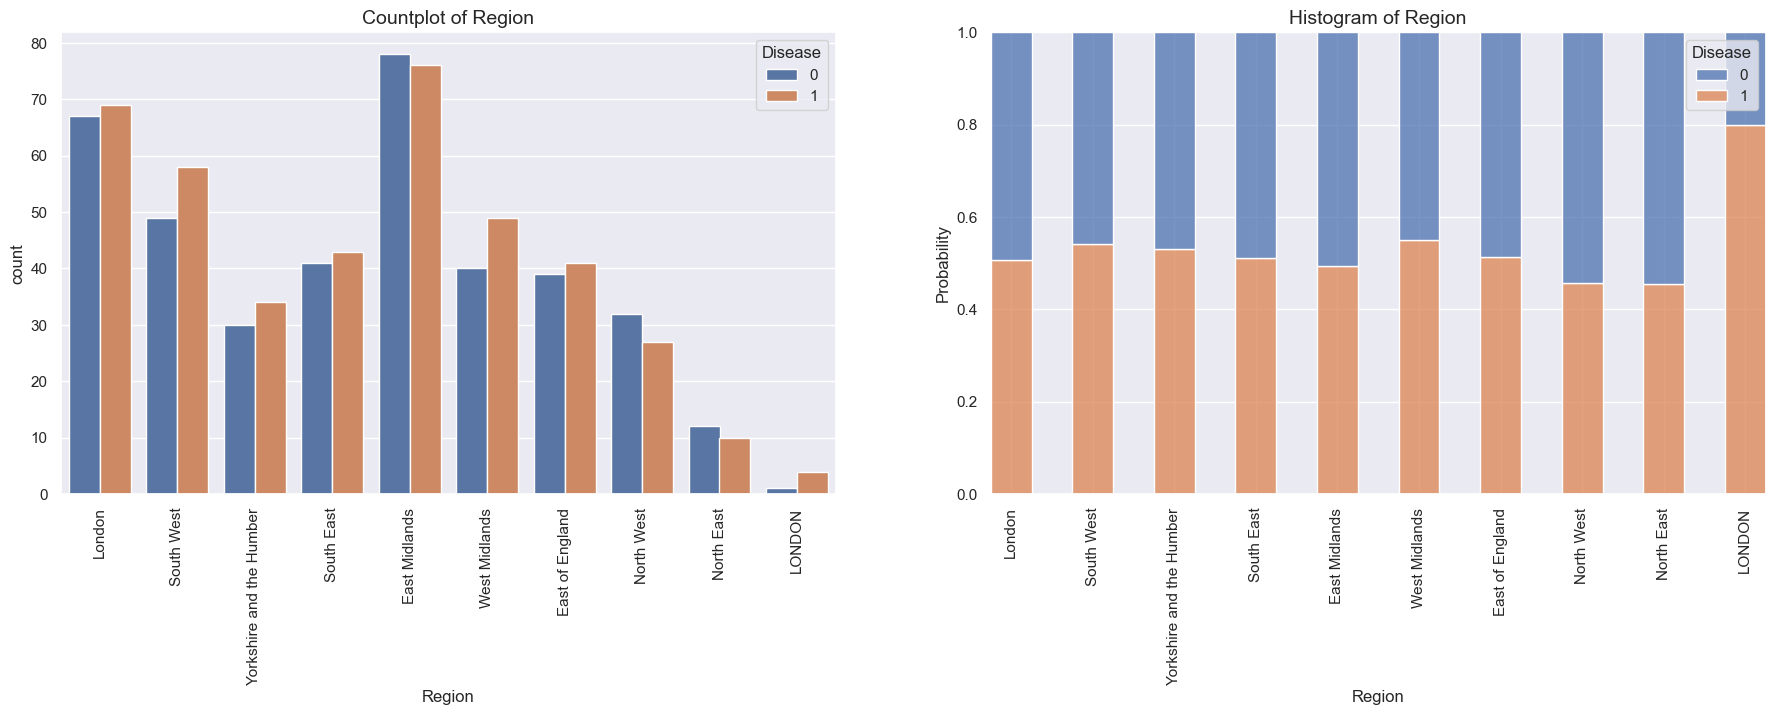

In [51]:
# Region
# Here, the even distribution of the dependent variable with respect to the region is visualized.
visualize_categorical(train_df_categorical.Region, train_df_categorical.Disease)

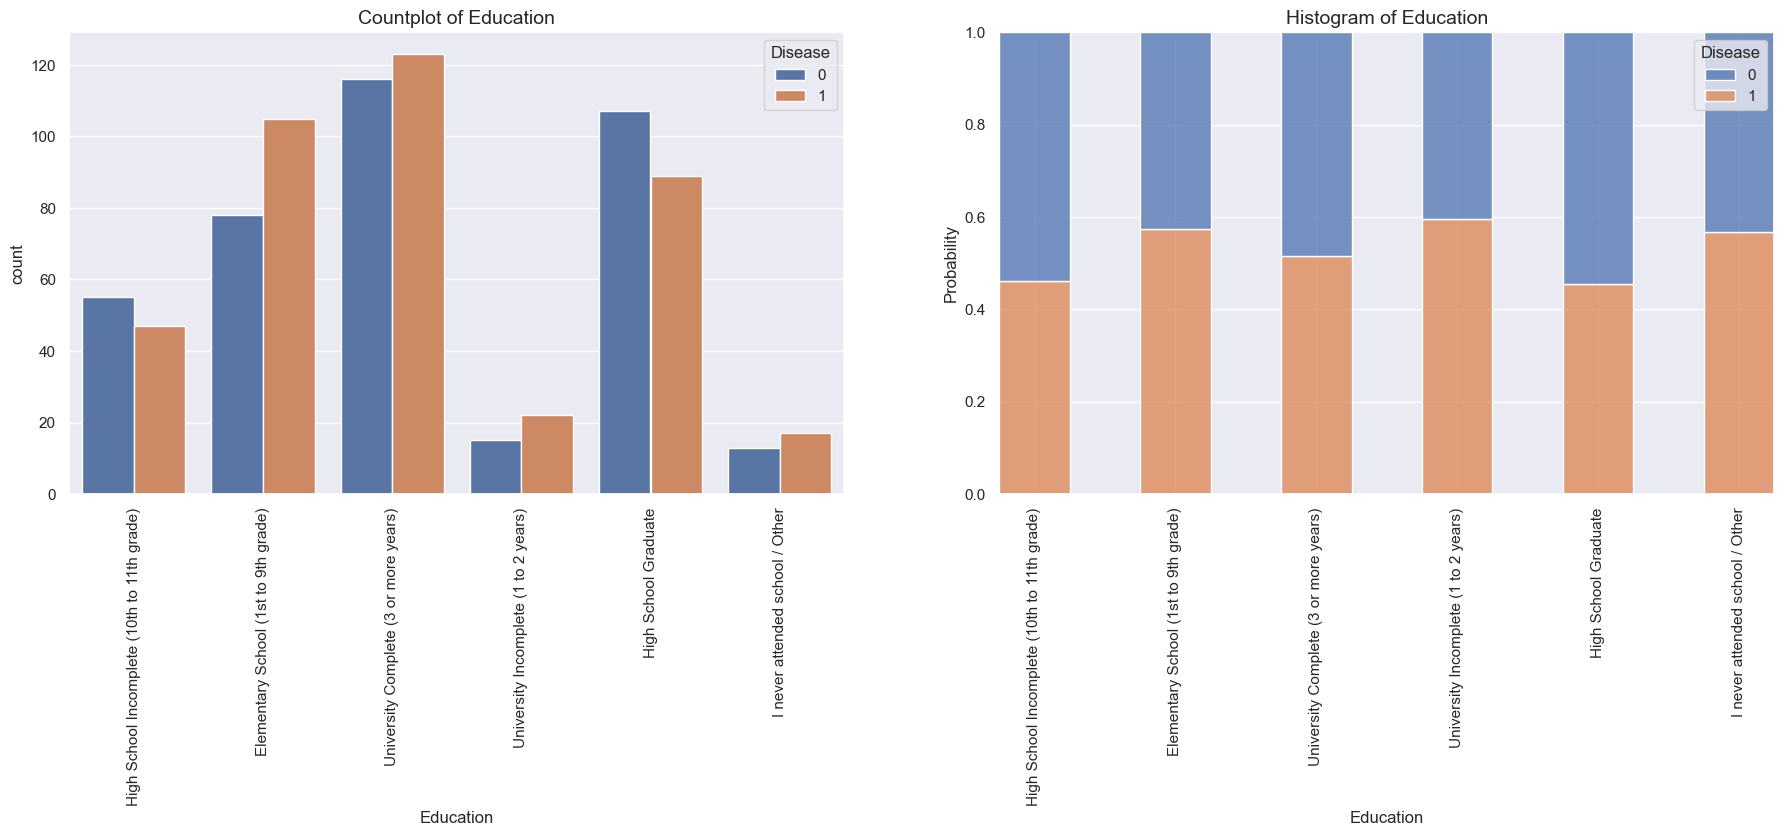

In [52]:
# Education
# There is no strong trend to be detected in the variable Education.
visualize_categorical(train_df_categorical.Education, train_df_categorical.Disease)

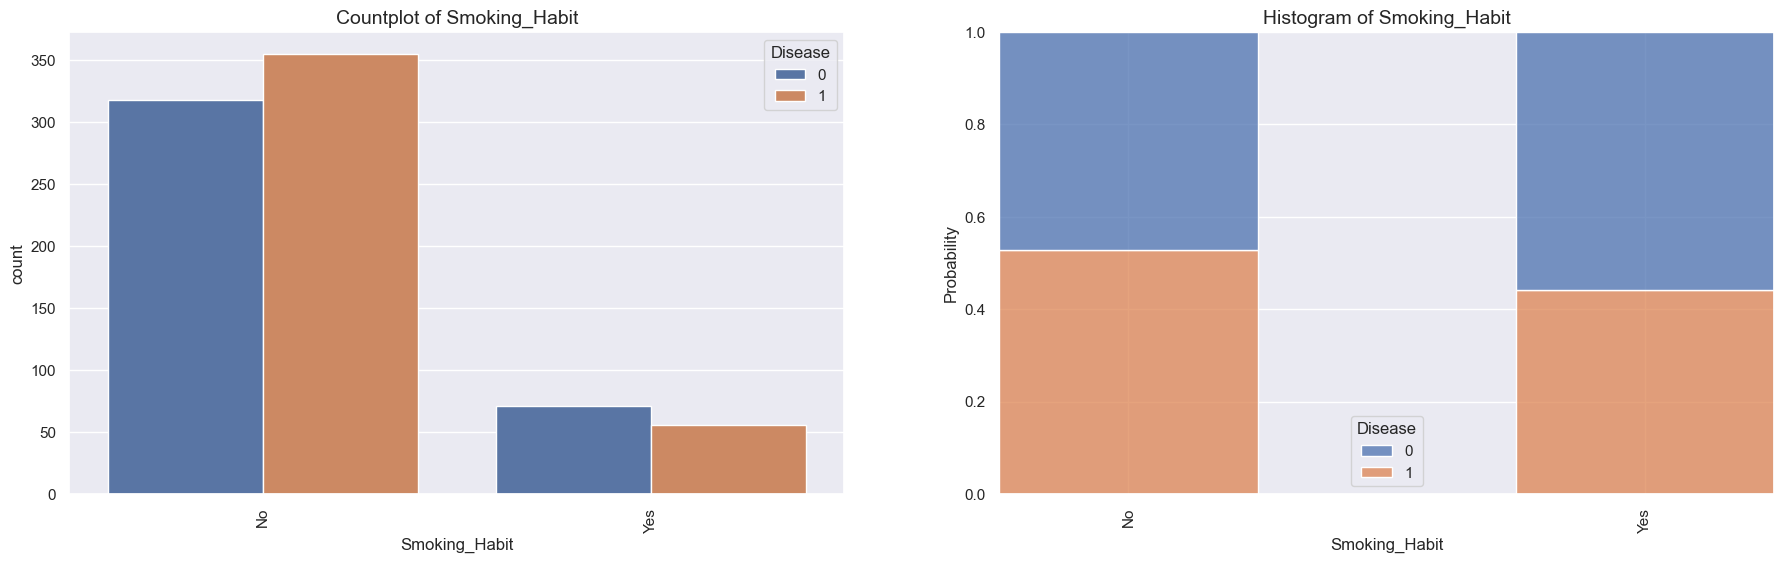

In [53]:
# Smoking_Habit
# The majority of the observed patients do not smoke.
# Percentagewise we have an even distribution of the dependent variable.
visualize_categorical(train_df_categorical.Smoking_Habit, train_df_categorical.Disease)

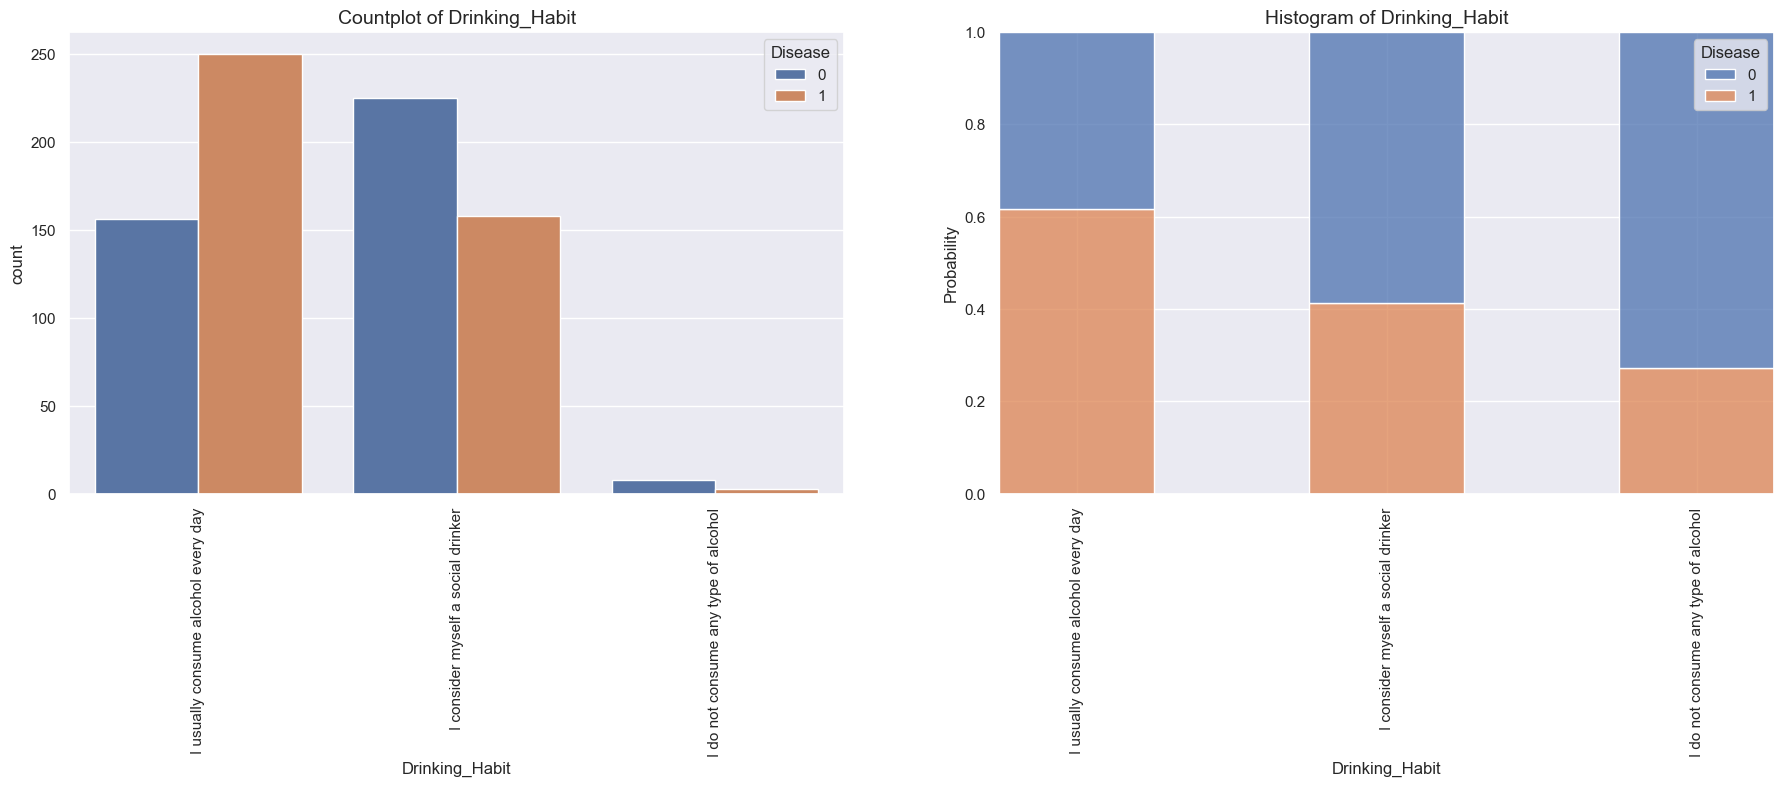

In [54]:
# Drinking_Habit
# The majority of patients observed consider themselves regular drinkers. 
# Patients with the disease drink more than patients without the disease. 
visualize_categorical(train_df_categorical.Drinking_Habit, train_df_categorical.Disease)

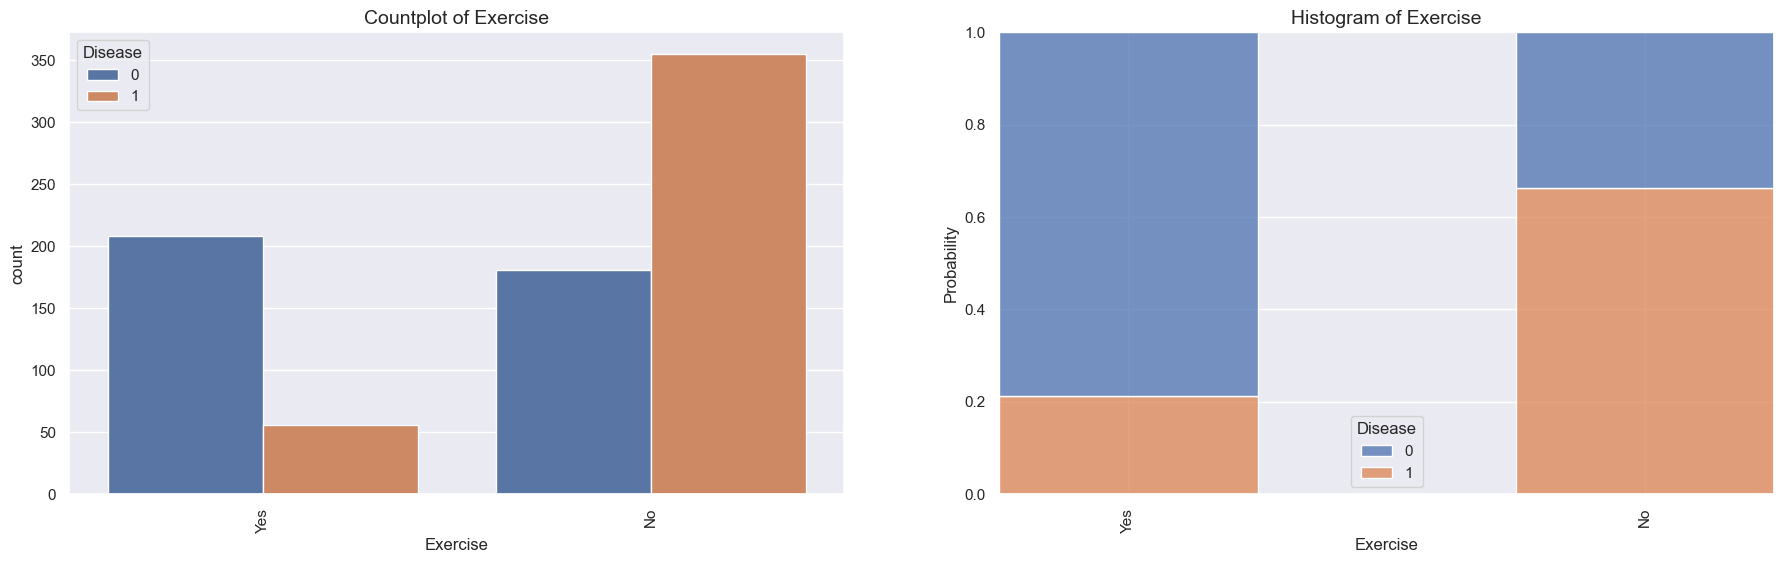

In [55]:
# Exercise
# In line with the higher BMI, a trend can be derived with regard to the variable Exercise. 
# Patients with the disease exercise overall less than patients without the disease.
visualize_categorical(train_df_categorical.Exercise, train_df_categorical.Disease)

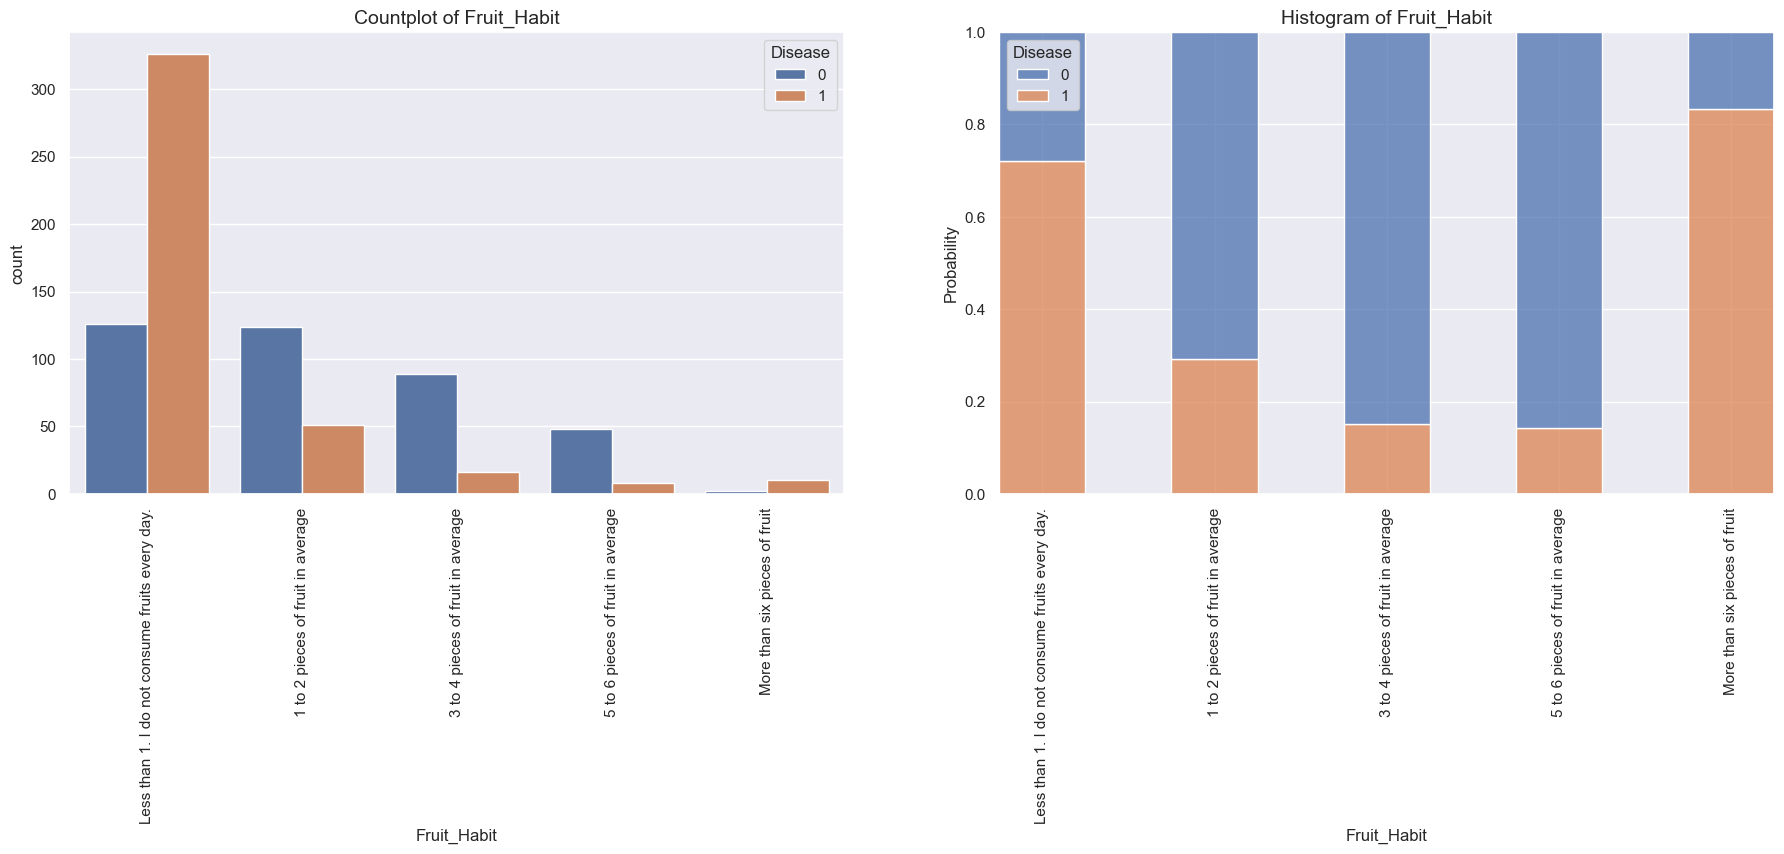

In [56]:
# Fruit_Habit
# Patients with the disease were largely composed of the categories "More than six pieces of fruit" and
# "Less than one piece of fruit a day". The feature does not indicate distinct correlation with the dependent variable.
visualize_categorical(train_df_categorical.Fruit_Habit, train_df_categorical.Disease)

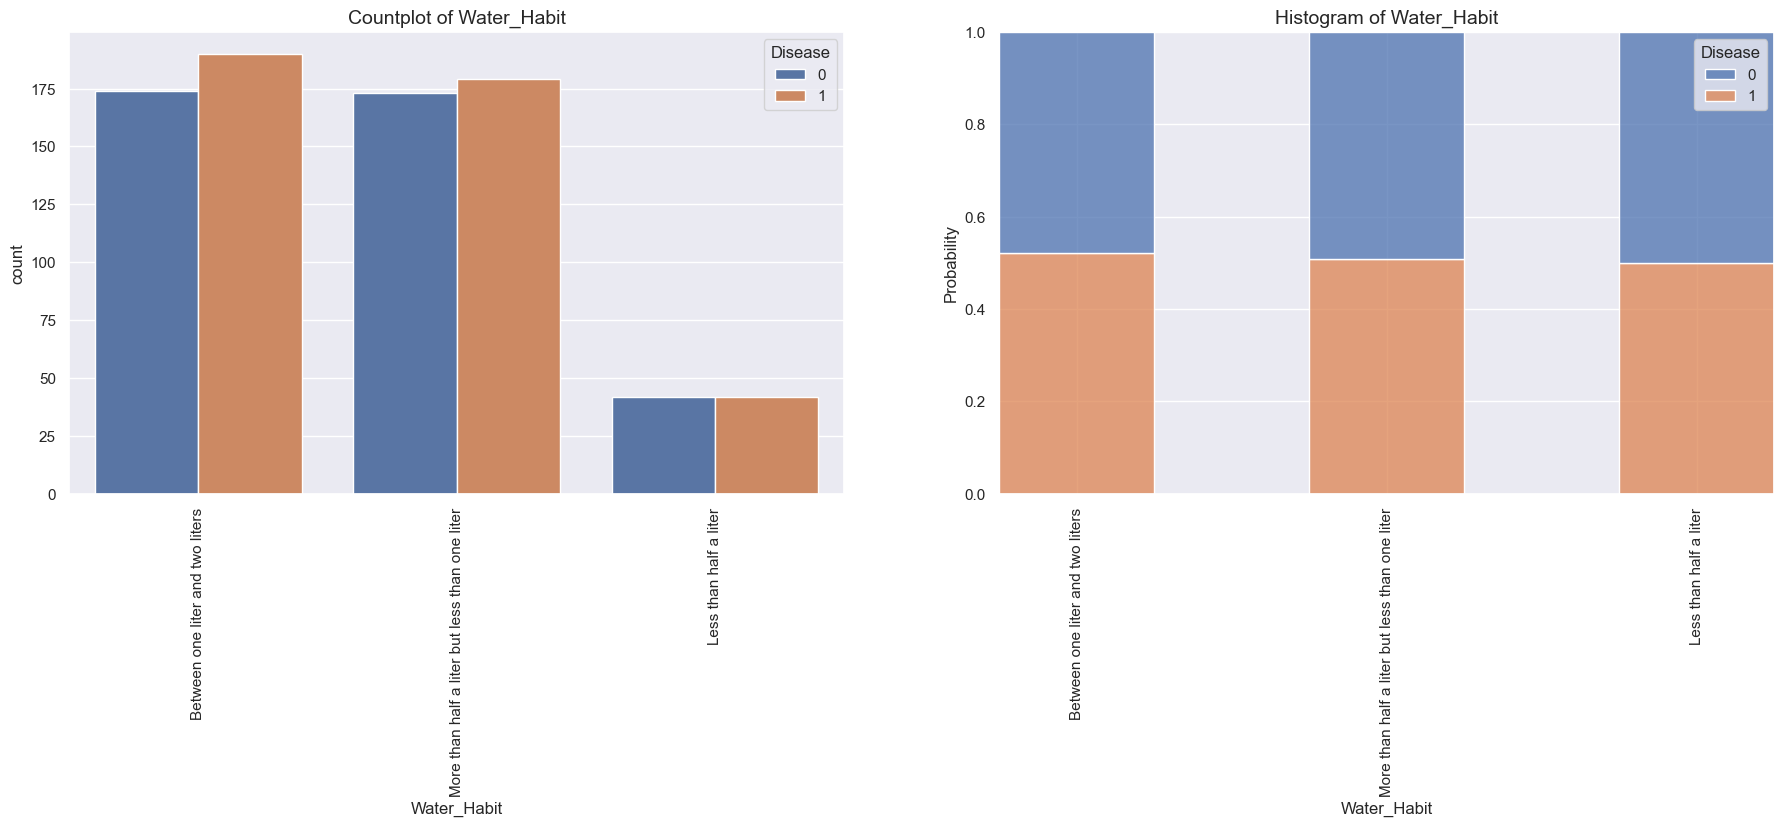

In [57]:
# Water_Habit
# Percentagewise we have an even distribution of the dependent variable.
# Generally, both groups of patients drink between half a liter and two liters a day.
visualize_categorical(train_df_categorical.Water_Habit, train_df_categorical.Disease)

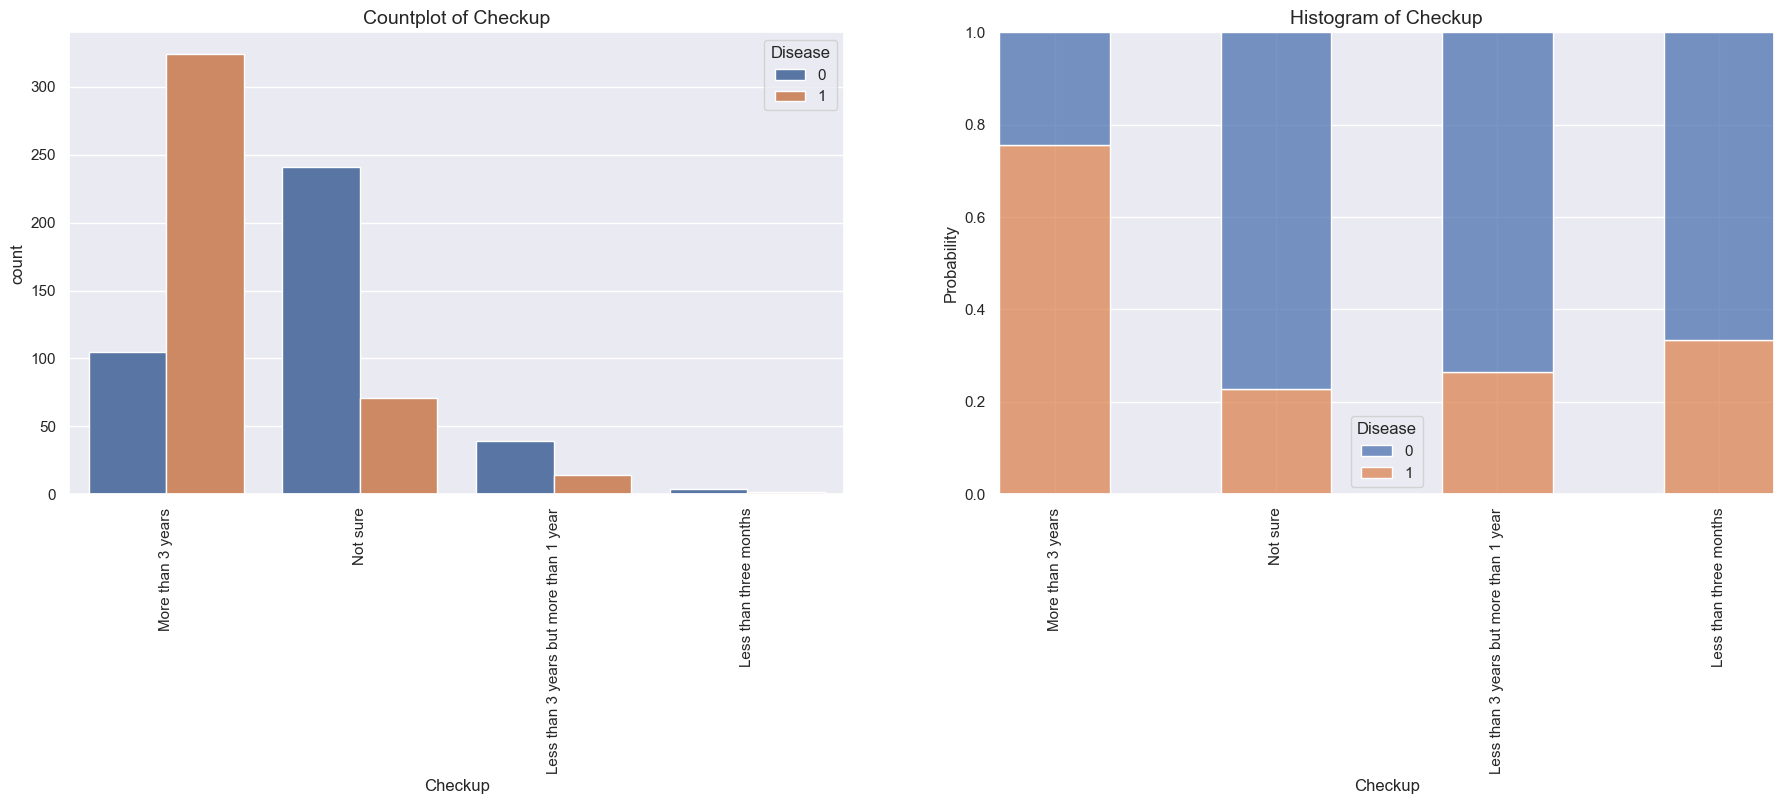

In [58]:
# Checkup
# The largest distribution of patients with the disease sees a doctor less than every 3 years. 
visualize_categorical(train_df_categorical.Checkup, train_df_categorical.Disease)

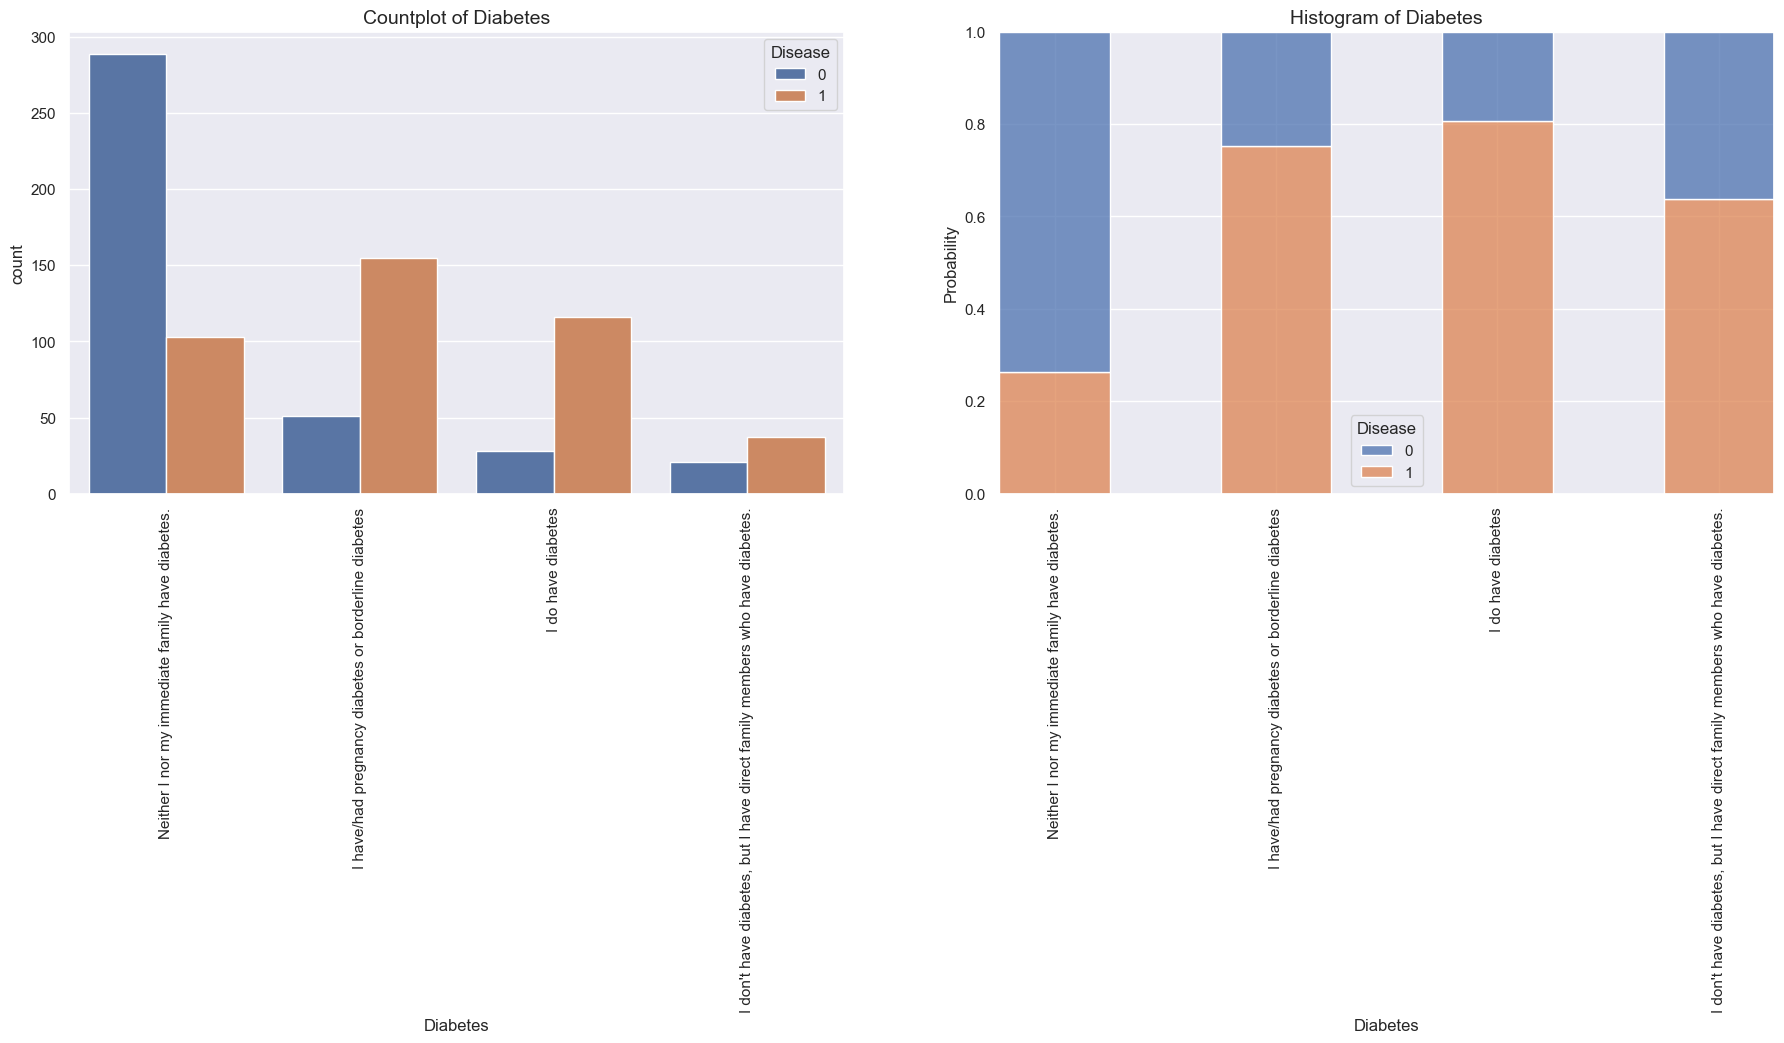

In [59]:
# Diabetes
# People with the disease are more likely to have diabetes or relatives with diabetes.
visualize_categorical(train_df_categorical.Diabetes, train_df_categorical.Disease)

#### Conclusion on categorical features

As conclusion we can make the following observations:
- Most of the features do not indicate statistical correlation with the dependend variable.
- Trends show that patients with the disease have a higher likelihood to have/get diabetes, they overall exercise less and drink more alcohol than the other group of patients.
- To be added, the largest distribution of patients with the disease sees the doctor only less than every 3 years.
- The two binary variables Smoking_Habit and Excercise can be easily changed for later training in values 0 and 1. 
- However we identify in six features an ordinal sorting, we must see how well a Ordinal Scaling can fit to the features.


<a class="anchor" id="NumericalFeatures">

### 4.1.3. Numerical Features

</a>

Following we will anaylse the numerical features one by one and try to identify correlations between them.

In [60]:
# Save a copy of the train exploration dataset.

train_df_numerical = train_df_explo[numerical_features]

In [61]:
# Checking the numerical features.

train_df_numerical.head()

Birth_Year  Disease  Height  Weight  High_Cholesterol  \
PatientID                                                          
1167             1965        1     155      67               358   
1805             1969        1     173      88               230   
1557             1974        1     162      68               226   
1658             1958        0     180      66               313   
1544             1968        1     180      58               277   

           Blood_Pressure  Mental_Health  Physical_Health  
PatientID                                                  
1167                  120             21                2  
1805                  142              9                0  
1557                  122             26                0  
1658                  125             13                8  
1544                  125             18                2

#### Plotting numerical features

#### Boxplot and Histogram per feature

Number of outliers: 12


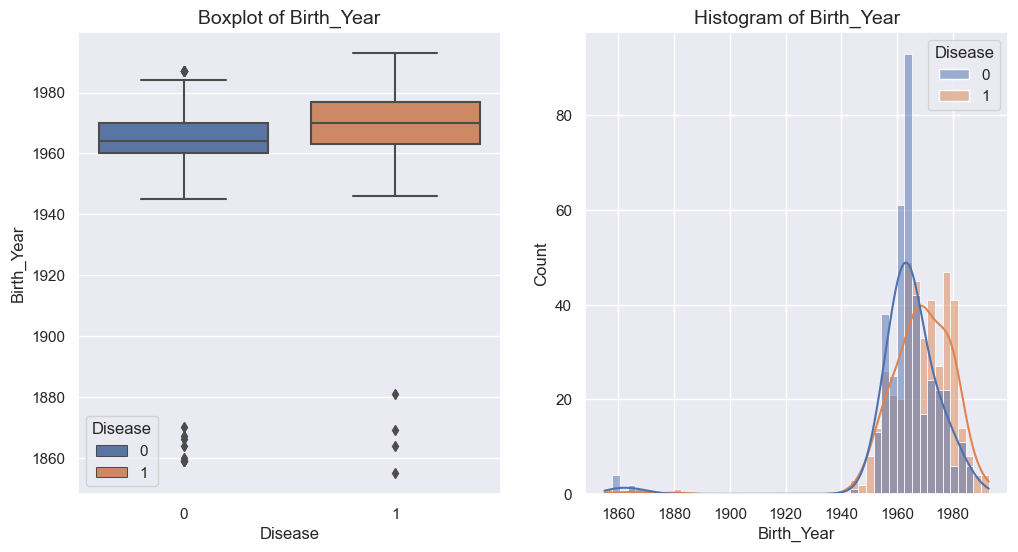

In [62]:
# Birth_Year
# Clearly shows 12 outliers, the people born before the year 1900 died already.
# The majortiy of patients with no disease are in average older as the patients with disease. 
# Both distributions of the histograms are normal distributed. 

selection = train_df[train_df["Birth_Year"] < 1900].shape[0]

print(f"Number of outliers: {selection}")

visualize_numerical(train_df_numerical.Birth_Year, train_df_numerical.Disease)

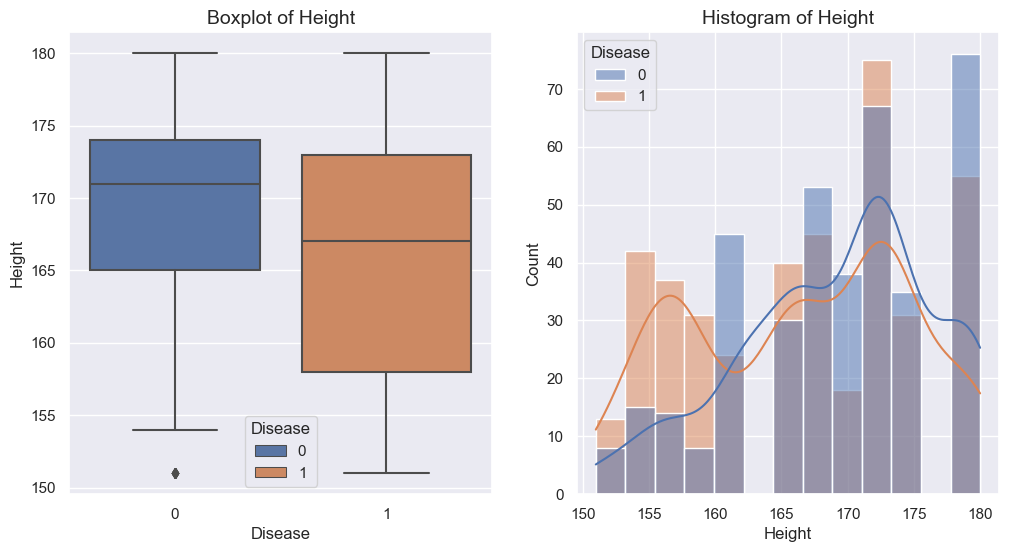

In [63]:
# Height
# There is one outlier in Height with disease 0.
# The histogram does not show a clear distribution of the disease by the height.
# Overall, patients with the disease seem to be smaller.
visualize_numerical(train_df_numerical.Height, train_df_numerical.Disease)

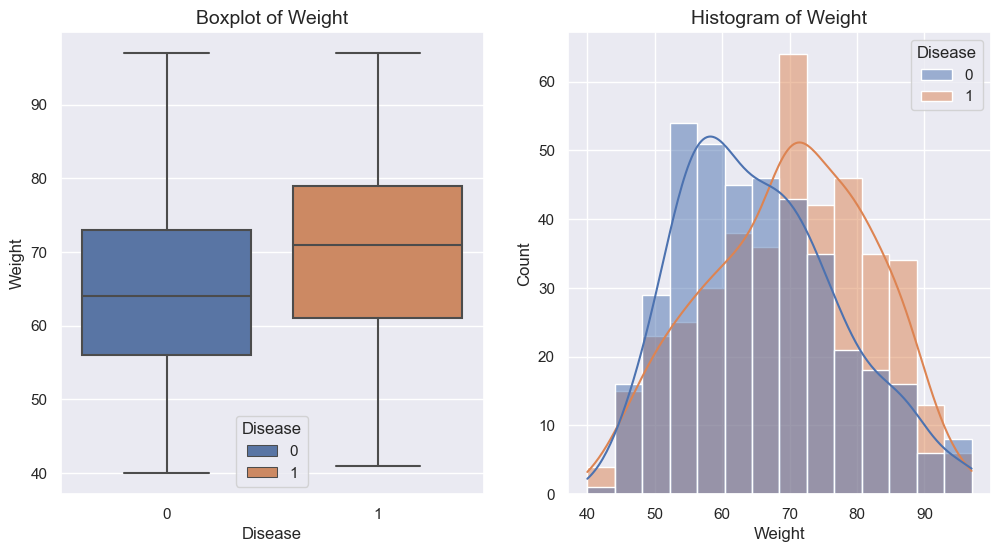

In [64]:
# Weight
# No outliers
# Both distributions are normal distributed.
# The patients with higher weight tend to have more often the disease
# as patients with lower weight.

visualize_numerical(train_df_numerical.Weight, train_df_numerical.Disease)

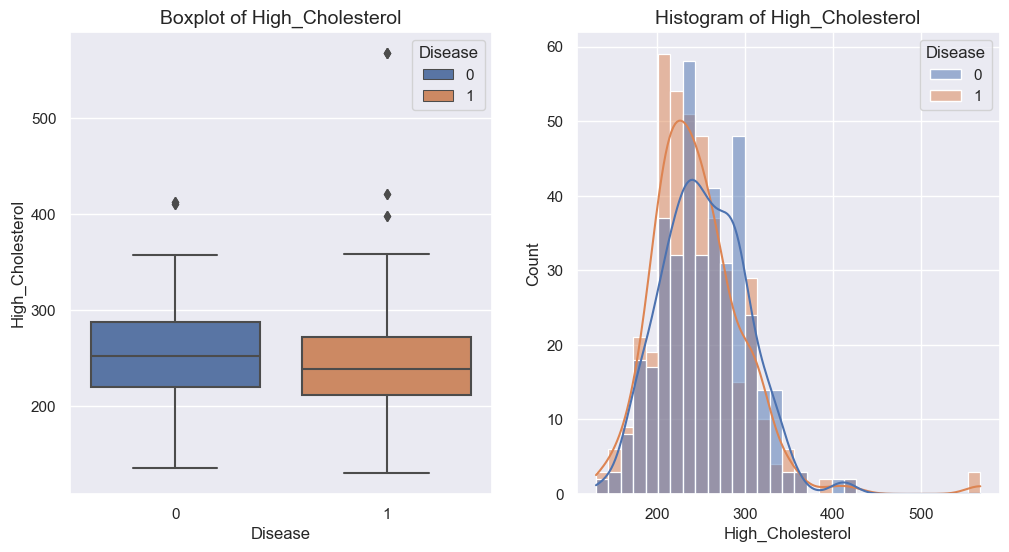

In [65]:
# High_Cholesterol
# 4 outliers
# Both distributions are normal distributed. Patients
# with lower cholesterol value seem to be more likely to have the disease.

visualize_numerical(train_df_numerical.High_Cholesterol, train_df_numerical.Disease)

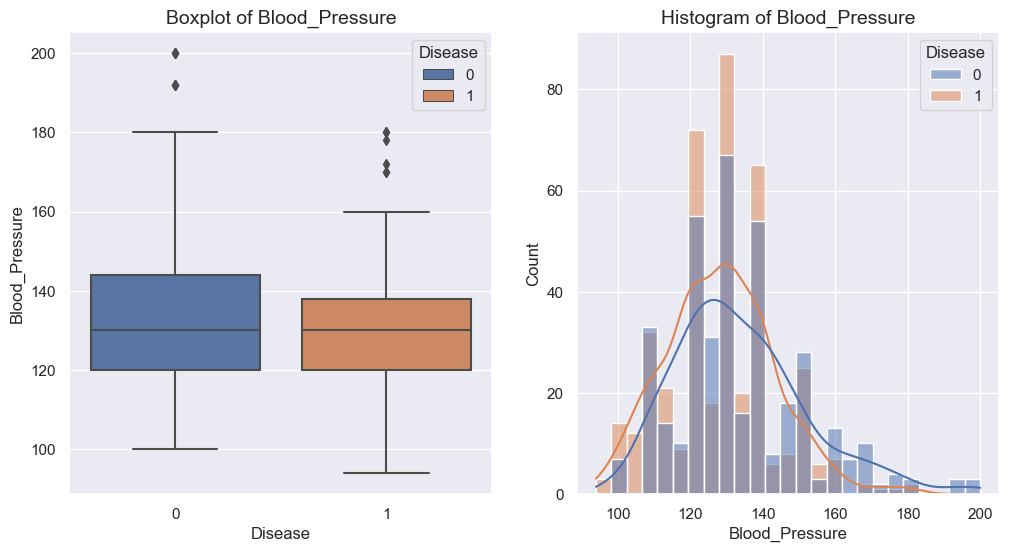

In [66]:
# Blood_Pressure
# 6 outliers
# Both distributions are normal distributed. 
# Overall, patients without the disease have higher blood pressure. 

visualize_numerical(train_df_numerical.Blood_Pressure, train_df_numerical.Disease)

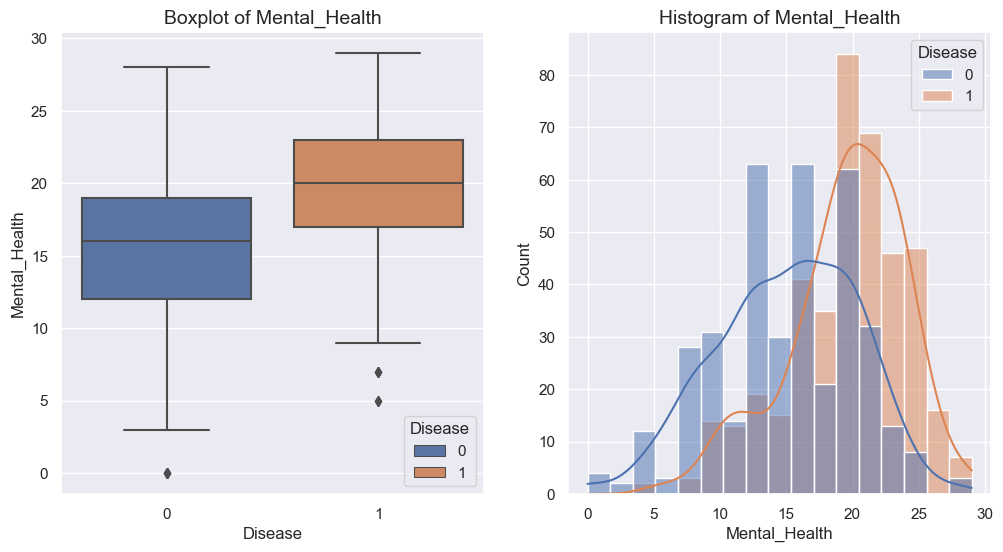

In [67]:
# Mental_Health
# 3 outliers
# A high value indicates poor mental health.
# Patients with this disease rate themselves as less mentally healthy.

visualize_numerical(train_df_numerical.Mental_Health, train_df_numerical.Disease)

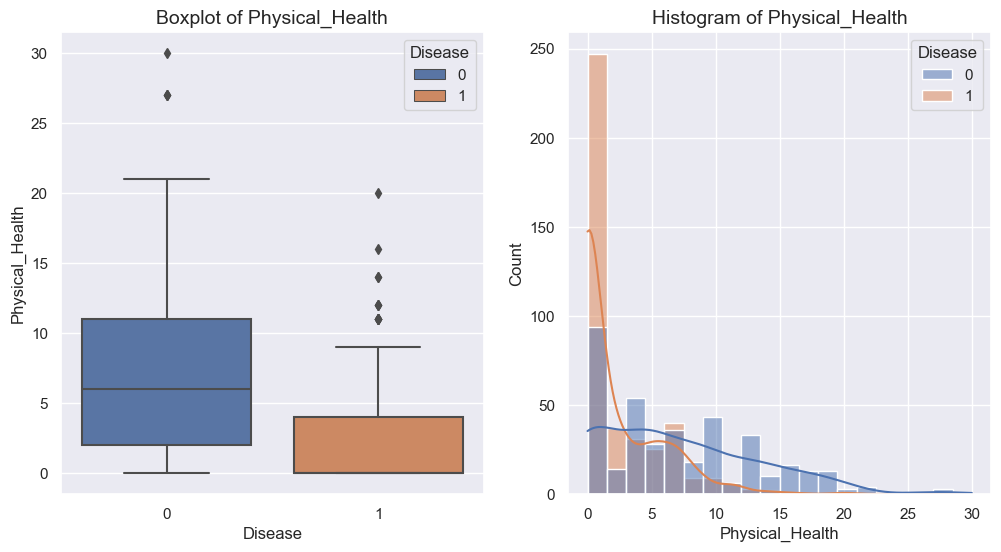

In [68]:
# Physical_Health
# 7 outliers
# A high value indicates a poor physical health.
# Patients with the disease seem to have less limitations on their physical health.

visualize_numerical(train_df_numerical.Physical_Health, train_df_numerical.Disease)

#### Pairplot for all numerical features

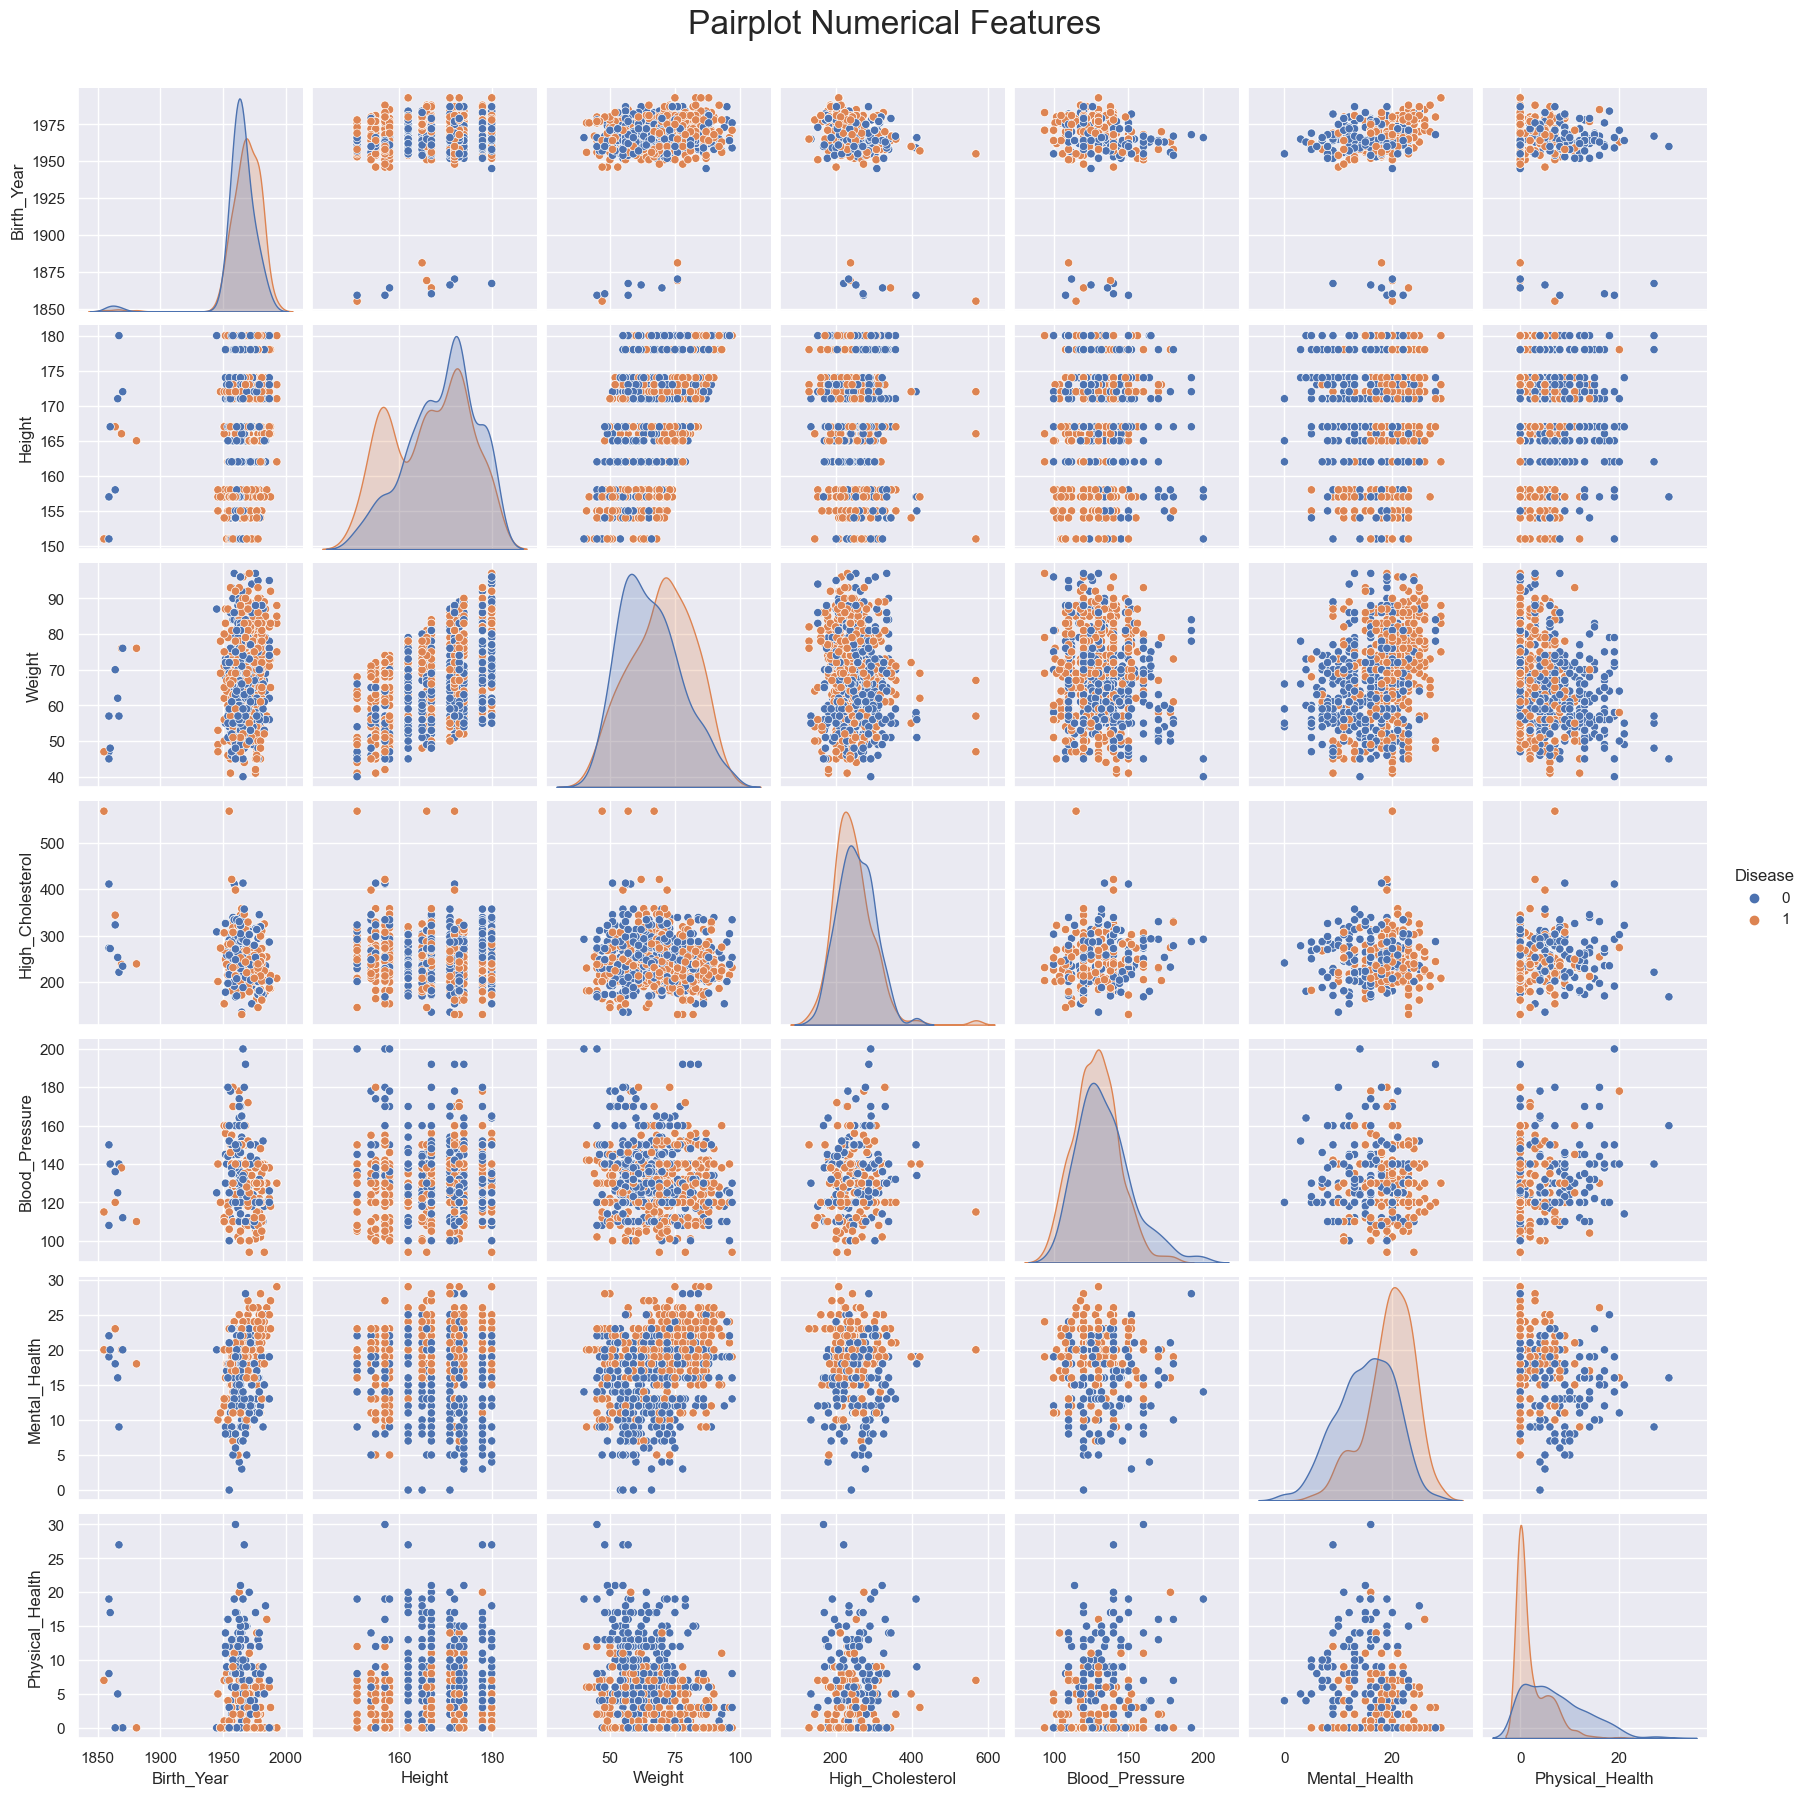

In [69]:
# Pairplot for all numerical features
# @Ricardo could you write a conclusion here, please.
pplot = sns.pairplot(data=train_df_numerical, hue="Disease")
pplot.fig.suptitle("Pairplot Numerical Features", y=1.03, size=24)
plt.show()

#### Check correlation between numerical features

In [70]:
# The strongest correlation can be detected between Height and Weight, 0.51 (not very strong).

train_df_numerical.corr()

Birth_Year   Disease    Height    Weight  High_Cholesterol  \
Birth_Year          1.000000  0.159028  0.097544  0.160576         -0.232736   
Disease             0.159028  1.000000 -0.170779  0.175166         -0.075345   
Height              0.097544 -0.170779  1.000000  0.512673         -0.091066   
Weight              0.160576  0.175166  0.512673  1.000000         -0.051133   
High_Cholesterol   -0.232736 -0.075345 -0.091066 -0.051133          1.000000   
Blood_Pressure     -0.122117 -0.166723 -0.018564 -0.094461          0.117339   
Mental_Health       0.199528  0.417867 -0.042378  0.301311          0.002479   
Physical_Health    -0.159870 -0.441631  0.059302 -0.387060          0.044540   

                  Blood_Pressure  Mental_Health  Physical_Health  
Birth_Year             -0.122117       0.199528        -0.159870  
Disease                -0.166723       0.417867        -0.441631  
Height                 -0.018564      -0.042378         0.059302  
Weight                 -0.094461       0.301311        -0.387060  
High_Cholesterol        0.117339       0.002479         0.044540  
Blood_Pressure          1.000000      -0.025034         0.158393  
Mental_Health          -0.025034       1.000000        -0.333152  
Physical_Health         0.158393      -0.333152         1.000000

<AxesSubplot:>

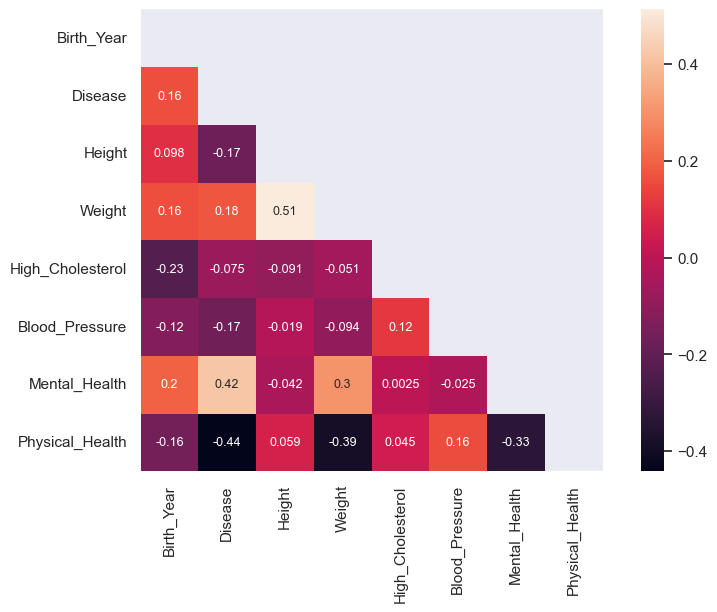

In [71]:
# Create a heatmap to check correlation between numerical features.
# The correlation among the features is very low. 

corr_matrix = train_df_numerical.corr()

# Generate a mask for the upper triangle.
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask.
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, annot_kws={"size": 9})

#### Conclusion on numerical features

As conclusion we can make the following observations:
- Generally, no distinct correlation between the features can be detected, but trends.
- Of interest is that the patients with the disease weigh comparatively more and are generally smaller. Nevertheless, their physical health and medical values are more pronounced than in patients who are not affected by the disease. According to data, mental health is significantly lower for patients having the disease. 

<a class="anchor" id="DataPre-Processing">

# 5. Data Pre-Processing

</a>

<a class="anchor" id="Missingiandnconsistentvalues">

## 5.1. Missing and inconsistent values

</a>

In [72]:
# Correcting in column Region the value LONDON to consistent value London.

train_df_categorical.loc[train_df_categorical["Region"] == "LONDON", "Region"] = "London"

In [73]:
# Handling NaN values in Education with imputing the values.
# We decide to use the mode of Education to replace the NaN values,
# because we don't want to lose other feature information given by
# the 13 rows.

train_df_categorical.loc[train_df_categorical["Education"].isna(), "Education"] = train_df_categorical["Education"].mode()[0]

<a class="anchor" id="FeatureEngineering">

## 5.2. Feature Engineering

</a>

#### Numerical features

In [74]:
# Add the age of the patient as numerical feature, because age can be easier
# interpretated than birth year.
# For calculation we take as assumption the current year minus the birth year.
# Drop in the end Birth_Year, to avoid having two features with the same information.

train_df_numerical = train_df_numerical.assign(Age= lambda x: 2022 - x["Birth_Year"])

train_df_numerical = train_df_numerical.drop("Birth_Year", axis=1)

"**Body mass index (BMI)** is a simple index of weight-for-height that is commonly used to classify overweight and obesity in adults. It is defined as a person's weight in kilograms divided by the square of his height in meters (kg/m2)."  

Source: https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight

In [75]:
# Add the BMI, to combine weight and height in one feature.
# We don't drop features weight and height, because we want to see the results of
# the feature selection first. 

train_df_numerical = train_df_numerical.assign(BMI= lambda x: x["Weight"] / (x["Height"]/100)**2)

train_df_numerical["BMI"] = train_df_numerical["BMI"].round(1)

#### Data Exploration of new features

- Boxplot and Histogram of new features
- Pairplot with other numerical features
- Correlation Heatmap with other numerical features

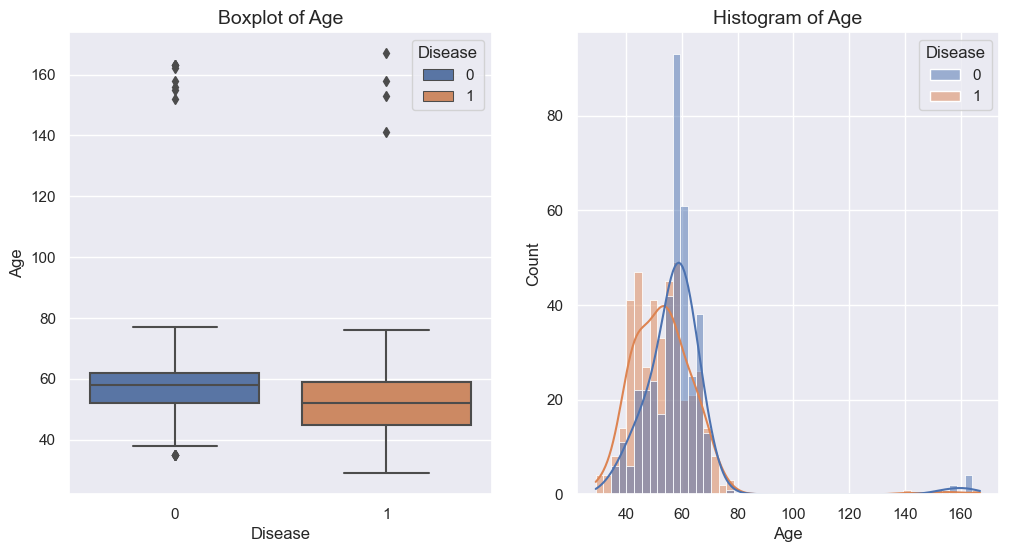

In [76]:
# Age
# The observations are the same as done for Birth_Year, because we just 
# changed the scaling of the feature:

# 12 outliers (like in Birth_Year feature)
# The majortiy of patients with no disease are in average older as the patients with disease. 
# Both distributions of the histograms are normal distributed. 

visualize_numerical(train_df_numerical.Age, train_df_numerical.Disease)

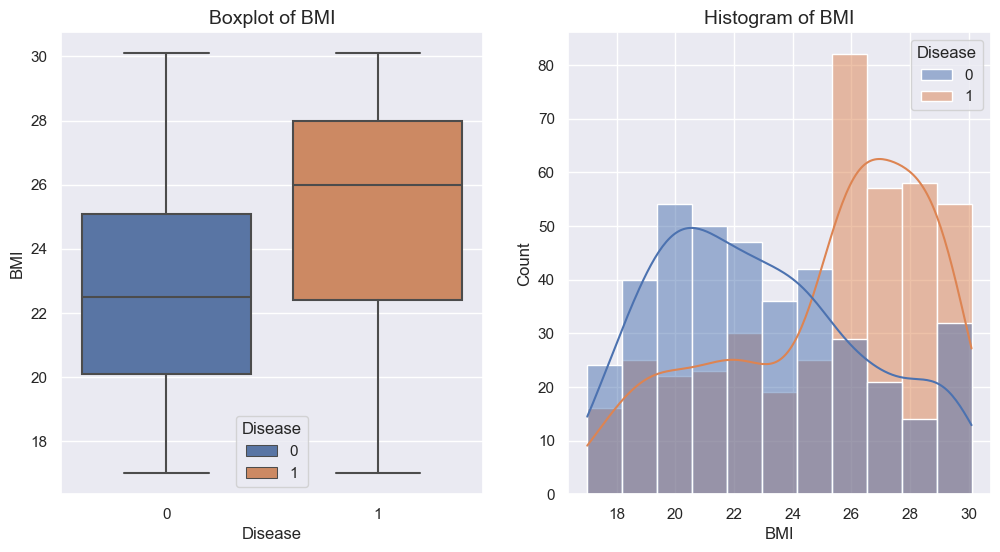

In [77]:
# BMI
# No outliers
# Patients with higher BMI are more likely to have the disesae,
# instead of patients with lower BMI.
# Which stands in line with the assumption, that patients with the disease weigh comparatively more and are generally smaller.
visualize_numerical(train_df_numerical.BMI, train_df_numerical.Disease)

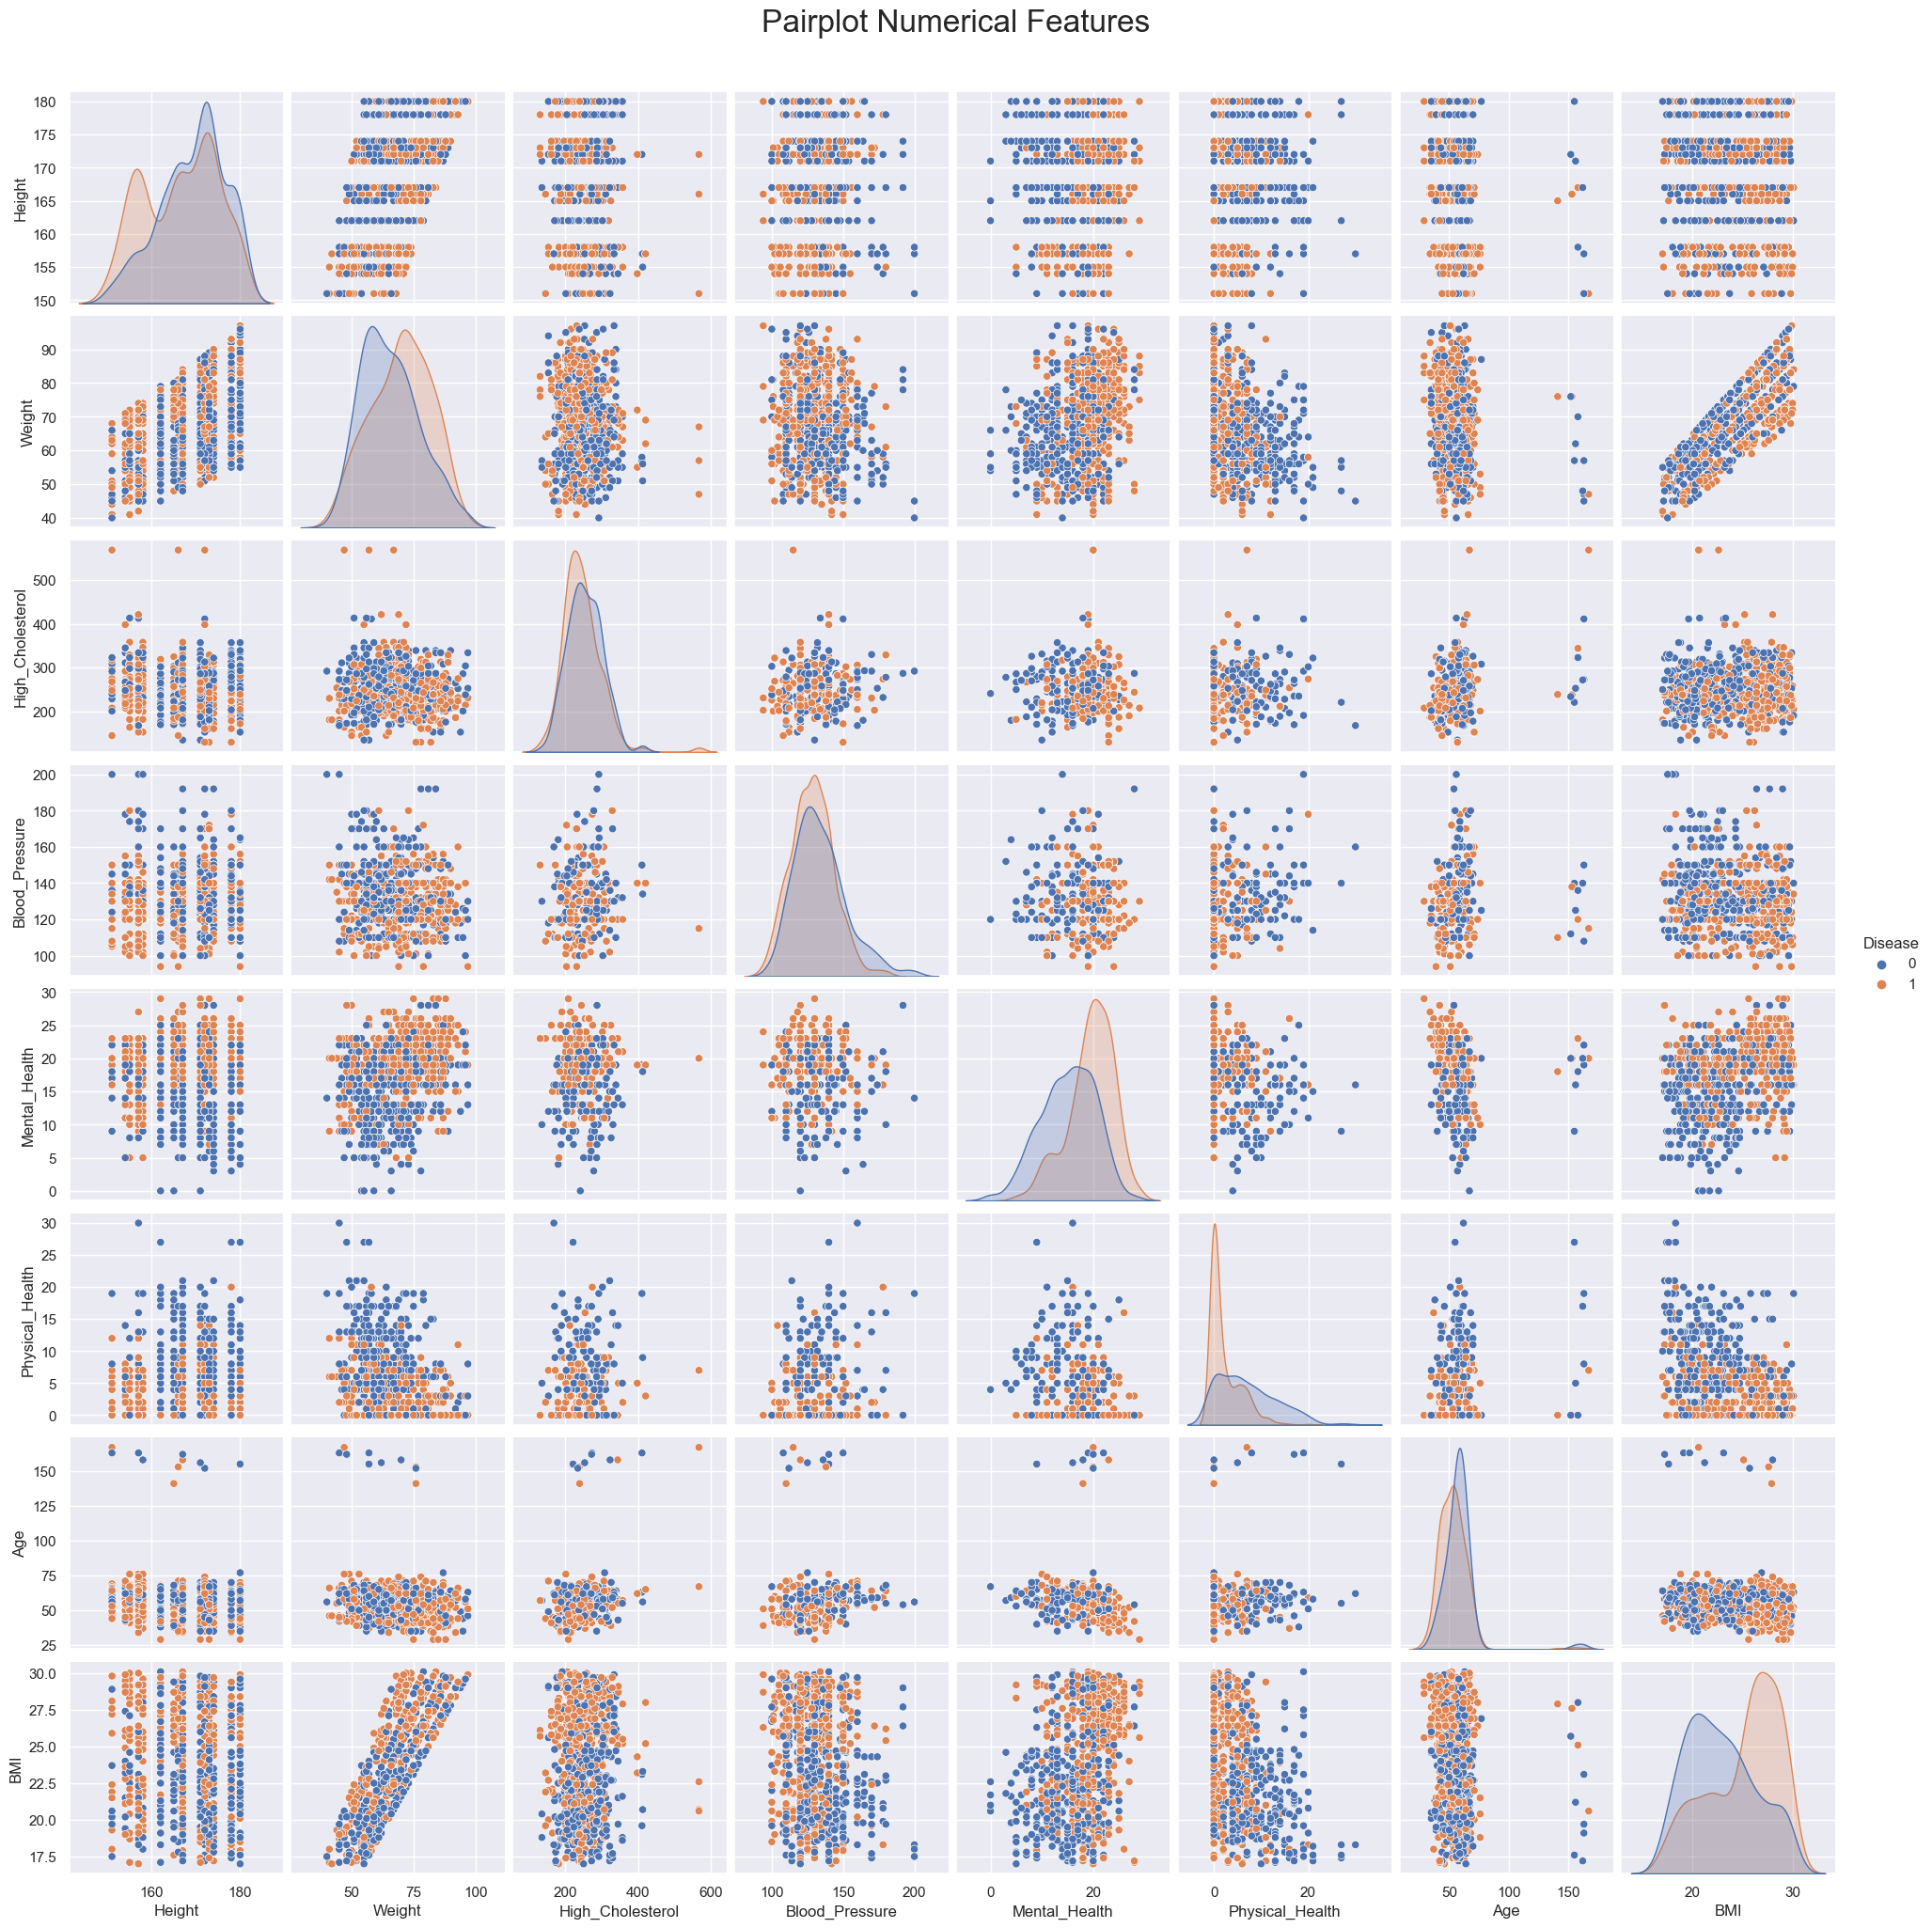

In [78]:
# Pairplot for all numerical features
# @Ricardo could you write a conclusion here, please.

pplot = sns.pairplot(data=train_df_numerical, hue="Disease")
pplot.fig.suptitle("Pairplot Numerical Features", y=1.03, size=24)
plt.show()

<AxesSubplot:>

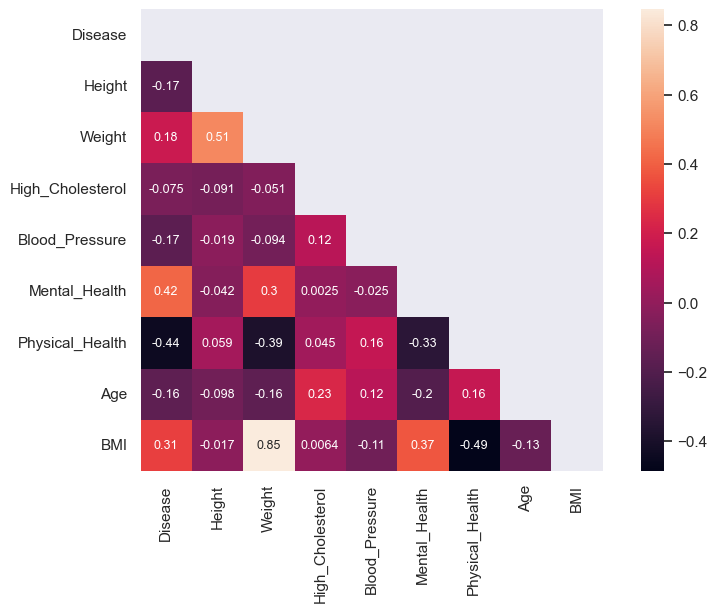

In [79]:
# Create a heatmap to check correlation with new numerical features.
corr_matrix = train_df_numerical.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, annot_kws={"size": 9})

#### Conclusion on new numercial features
As conclusion we can make the following observations:
- Feature engineering did not reveal any features with stronger correlations. Since the body mass index (BMI) is a person's weight in kilograms divided by the square of height in meters, a correlation with weight od 0.85 can be seen here.
- Also, there is a negative correlation of -0.49 detectable between pyhsical health and the BMI.
- Age has the same correlations as Birth_Year listed earlier.

#### Categorical features

In [80]:
# Create column Gender to identify if disease is different for female or male
# 1 = male, 0 = female

train_df_categorical["Gender"] = [1 if i.split(' ')[0] == 'Mr.' else 0 for i in train_df_categorical.Name]

#train_df_categorical.loc[train_df_categorical["Name"].str.contains("Mrs."), ["Gender"]] = 0

C:\Users\jlutt\AppData\Local\Temp\ipykernel_3844\423096397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_categorical["Gender"] = [1 if i.split(' ')[0] == 'Mr.' else 0 for i in train_df_categorical.Name]


In [81]:
# Drop the name of the patient, because we extracted all
# necessary information from the column.

train_df_categorical = train_df_categorical.drop("Name", axis=1)

**Age classification** according World Health Organization (WHO)

Source: https://cdn.who.int/media/docs/default-source/gho-documents/global-health-estimates/gpe_discussion_paper_series_paper31_2001_age_standardization_rates.pdf

In [82]:
# Adding the Age_class feature, to further explore, if we
# see age clusters, where the disease occurs more frequently.

age_labels = [
            "Age_0_4", 
            "Age_5_14", 
            "Age_15_29",
            "Age_30_44",
            "Age_45_59",
            "Age_60_69",
            "Age_70_79",
            "Age_80+"
            ]


# Adding column Age temporarly
train_df_categorical["Age"] = train_df_numerical["Age"]

train_df_categorical["Age_class"] = pd.cut(
                                x = train_df_categorical["Age"],
                                bins = [0, 5, 15, 30, 45, 60, 70, 80, np.Infinity],
                                labels = age_labels                             
                                )

# Remove column Age from dataset
train_df_categorical.drop("Age", axis=1, inplace=True)

#### Data Exploration of new features

- Barplot of each feature

In [83]:
# Gender
# Total male patients = 564
# Total female patients = 236
# We have more male patients as female patients. The proportion
# of male patients who have the disease is higher, as for females.
# Gender could be an interesting feature for training model later on.

train_df_categorical.groupby("Gender", axis=0)["Disease"].value_counts()

Gender  Disease
0       1          174
        0           62
1       0          327
        1          237
Name: Disease, dtype: int64

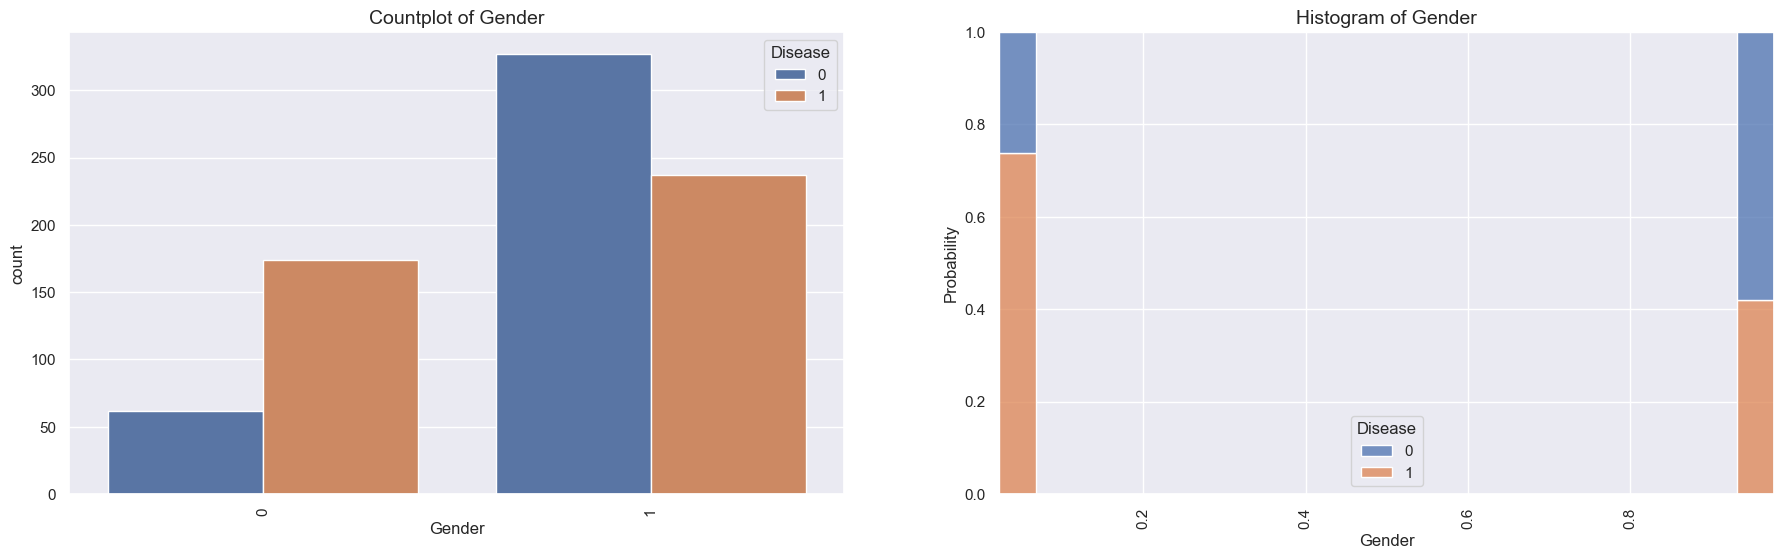

In [84]:
# Plot the Gender with disease
# Visualizing the unbalanced dataset in terms of the independent variable Gender.
# Percentagewise, more women are affected by the disease.
visualize_categorical(train_df_categorical.Gender, train_df_categorical.Disease)

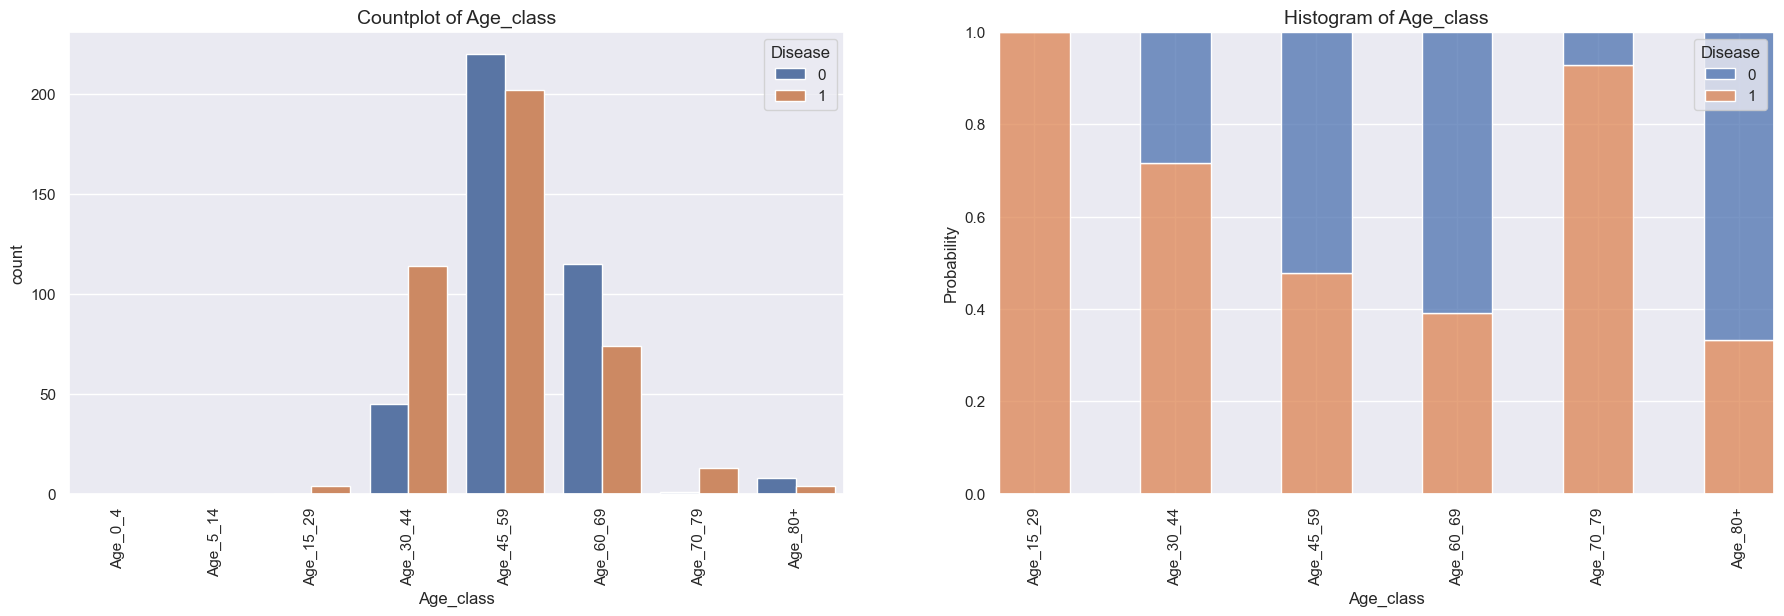

In [85]:
# Plot Age_class with disease
# The histogram shows that patients between 15 and 29 years are the most affected by the disease. 
# The second most affected age class are patients between 70 and 79 years. 
# Patients between 60 and 69 years are the least affected.
visualize_categorical(train_df_categorical.Age_class, train_df_categorical.Disease)

#### Conclusion on new categorical features
As conclusion we can make the following observations:
- Detecting an unbalanced dataset, which is dominated by 564 male patients compared to 236 female patients. Among the patients, percentagewise more women are affected by the disease.
- Our assumption is confirmed that the disease affects young people. In the percentage representation, however, one can see that almost as many 70-79 year olds are affected by the disease. Thus, a large distribution of old and young people are affected.

#### Combining categorical and numerical dataset

In [86]:
# Combining the numerical and categorical dataset after feature engineering for further 
# processing.

train_df_preprocess = train_df_numerical.merge(train_df_categorical.drop("Disease", axis=1), 
                                                how="right", 
                                                left_index=True, 
                                                right_index=True).copy()

In [87]:
# Change the dtype of column Gender and Disease to category

train_df_preprocess.astype({"Gender":'category'}).dtypes

Disease                int64
Height                 int64
Weight                 int64
High_Cholesterol       int64
Blood_Pressure         int64
Mental_Health          int64
Physical_Health        int64
Age                    int64
BMI                  float64
Region                object
Education             object
Smoking_Habit         object
Drinking_Habit        object
Exercise              object
Fruit_Habit           object
Water_Habit           object
Checkup               object
Diabetes              object
Gender              category
Age_class           category
dtype: object

In [88]:
# Saving categorical and numerical feature names for later preprocessing.

categorical_features = list(train_df_preprocess.select_dtypes(exclude=np.number).columns)

numerical_features = list(train_df_preprocess.select_dtypes(include=np.number).columns)

# Drop Disease, because target variable.
numerical_features.remove("Disease")

<a class="anchor" id="Handlingoutliers">

## 5.3. Handling outliers

</a>

To compare later on scores of our models with different training data, we create two datasets:
- one without outlier handling
- one with outlier handling

In [89]:
# By trimming the outliers we will remove 74 rows, which results in 9.25% of the data.
# This is not desirable, because other features may contain useful information for training
# our future model.
# Therefore we will not use outlier trimming.

train_df_trimmed_outliers = outlier_trimming(train_df_preprocess, numerical_features)

Removed 74 rows, which equals 9.25 % of the original dataset.


In [90]:
# Capping the outliers

outlier_features = ["Age", "Mental_Health", "Physical_Health", "High_Cholesterol", "Blood_Pressure", "Height"]

train_df_capped_outliers = outlier_capping(train_df_preprocess, outlier_features)

<a class="anchor" id="One-Hot-Encoding">

## 5.4. One-Hot-Encoding

</a>

We will use the One-Hot-Encoding of categorical features from sklearn library.

In [91]:
# Splitting the dataset in train features and target variable for further
# preprocessing.

target = train_df_capped_outliers["Disease"]
train_df_capped_outliers = train_df_capped_outliers.drop("Disease", axis = 1)

In [92]:
# One-hot-encoded dataset
train_df_enc = one_hot_encoding(train_df_capped_outliers, categorical_features=categorical_features)

<a class="anchor" id="FeatureScaling">

## 5.5. Feature Scaling

</a>

In the next step, we will scale the train dataset with 4 different scalers.
- Standardscaler
- MinMaxScaler (Feature range = (0,1))
- MinMaxScaler (Feature range = (-1,1))
- Robustscaler

Before, we split the one-hot-encoded dataframe with the Hold-out method (90% train data, 10% validation data)  
for later testing our trained model against the validation data.


In [93]:
# Split dataset into train(90%) and validation(10%) by using the method train_test_split().
# Shuffle is by default True.
# Implementing stratification to force the distribution of the target 
# variable y among the different splits to be the same. 

data = train_df_enc.copy()

X_train, X_val, y_train, y_val = train_test_split(data, 
                                                  target, 
                                                  test_size = 0.1, 
                                                  random_state = 42,
                                                  stratify = target)

In [94]:
# Save from X_train dictionary each dataset scaled with different Scaler in a variable
# for further processing.

X_train_enc_scaled_dict = return_scale_datasets(X_train, numerical_features)

X_train_enc_scale_standard = X_train_enc_scaled_dict["standard"][0]

X_train_enc_scale_minmax = X_train_enc_scaled_dict["minmax"][0]

X_train_enc_scale_minmax_minus = X_train_enc_scaled_dict["minmaxminus"][0]

X_train_enc_scale_robust = X_train_enc_scaled_dict["robust"][0]

In [95]:
X_train_enc_scale_standard.shape

(720, 53)

In [96]:
# Capping the outliers

outlier_features = ["Age", "Mental_Health", "Physical_Health", "High_Cholesterol", "Blood_Pressure", "Height"]

train_df_capped_outliers = outlier_capping(train_df_preprocess, outlier_features)

<a class="anchor" id="FeatureSelection">

# 6. Feature Selection

</a>

We selected the following methods to perform Feature Selection:

Filter Methods: 

Due to the fact that our dataframe contains numerical and categorical data we can use the following method:
- ANOVA (data should be encoded and scaled)
- ((Peasons correlation (only continous data) (no need to scaling)))
- What is with Kendalls's??


Wrapper Methods:
- RFE (in combination with the logistic regression algorithm) (data should be encoded and scaled)

Embedded Methods: (Use of rfe crossvalidation to show the most important features)
- Lasso (data should be encoded and scaled)
- Ridge (data should be encoded and scaled)
- Decicion Trees (no need for scaling, but for encoding) (with two different importance metrics_ gini and entropy)
- Random Forest (no need for scaling, but for encoding) (with two different importance metrics_ gini and entropy)

In [97]:
# # Create a encoded and scaled dataset to continue the the feature selection 
# # Why robust here?
# train_df_enc_dict = return_scale_datasets(train_df_enc, numerical_features)
# train_df_enc_robust = train_df_enc_dict["robust"][0]

<a class="anchor" id="FilterMethods">

## 6.1. Filter Methods

</a>

<a class="anchor" id="PearsonCorrelation">

### 6.1.1 Pearson correlation

</a>

In [98]:
#Let's delete pearson?

<AxesSubplot:>

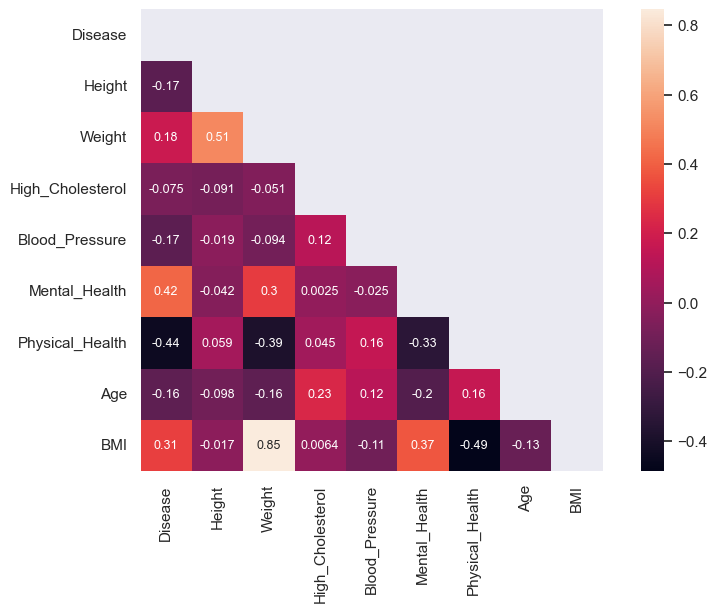

In [99]:
# The pearson correlation 
corr_matrix = train_df_numerical.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, mask=mask, square=True, annot=True, annot_kws={"size": 9})

In [100]:
# with a treshold of 0.90 of correlation there is no feature that can be deleted based on the pearson correlation

In [101]:

# calculate the pearson correlation coefficient for each pair of features
#corr_matrix = train_df_numerical.corr(method='pearson')
#
## select a threshold for the pearson correlation coefficient
#threshold = 0.9
#
## create a list of features to drop
#to_drop = []
#
## iterate over the columns of the correlation matrix
#for col1 in corr_matrix.columns:
#    for col2 in corr_matrix.columns:
#        if col1 != col2:
#            # calculate the pearson correlation coefficient
#            corr = pearsonr(data[col1], data[col2])[0]
#            if corr >= threshold:
#                # add the feature to the list of features to drop
#                to_drop.append(col2)
#
## drop the features from the dataset
#data = data.drop(to_drop, axis=1)
#
## return a list of features that only have a correlation of lower than 0.90 and show how many features got deleted
#pearson_features = data.columns.values.tolist()
#print('deleted features:')
#print(len(train_df_numerical.columns)-len(pearson_features))

<a class="anchor" id="ANOVAmethod">

### 6.1.2 ANOVA method

</a>

In the ANOVA feature selection the p-value is a useful measure for determining the statistical significance of the relationship between each feature and the target variable. By selecting only the features with a low p-value, we can identify the features that have the greatest impact on the response variable and improve the performance of your model.

Do to the fact, that we dont know what scaler is the best, we perform the selection with all 4 and hopefully get some insights:

In [102]:
# Anova method with Robustscaler.
# split the dataset into X and y
X = X_train_enc_scale_robust
y = y_train

# perform ANOVA feature selection
f_value, p_value = f_classif(X, y)

# Create a list with the features with the lowest p-value and show how many features got deleted
anova_features_robust = X.columns[p_value < 0.05].tolist()
print('Deleted features:', len(X_train_enc_scale_robust.columns)-len(anova_features_robust))

Deleted features: 24


In [103]:
# Anova method with MinMaxScaler.
X = X_train_enc_scale_minmax
y = y_train

f_value, p_value = f_classif(X, y)

anova_features_minmax = X.columns[p_value < 0.05].tolist()
print('Deleted features:', len(X_train_enc_scale_minmax.columns)-len(anova_features_minmax))

Deleted features: 24


In [104]:
# Anova method with Standardscaler.
X = X_train_enc_scale_standard
y = y_train

f_value, p_value = f_classif(X, y)

anova_features_standard = X.columns[p_value < 0.05].tolist()
print('Deleted features:', len(X_train_enc_scale_standard.columns)-len(anova_features_standard))

Deleted features: 24


In [105]:
# Anova method with MinMaxMinusScaler.
X = X_train_enc_scale_minmax_minus
y = y_train

f_value, p_value = f_classif(X, y)

anova_features_minmax_minus = X.columns[p_value < 0.05].tolist()
print('Deleted features:', len(X_train_enc_scale_minmax_minus.columns)-len(anova_features_minmax_minus))

Deleted features: 24


In [106]:
# Combining all ANOVA features.
anova_combined_list = anova_features_robust + anova_features_minmax + anova_features_standard + anova_features_minmax_minus

In [107]:
# Initialize a dictionary to store unique string elements and their counts.
str_counts = {}

#lLoop over the elements in the list
for elem in anova_combined_list:
  # check if the element is a string
  if isinstance(elem, str):
    # if the element is a string, increment its count in the dictionary
    # if the element is not in the dictionary, set its count to 1
    str_counts[elem] = str_counts.get(elem, 0) + 1

# Print the final counts
# All counts ended up being 4 for all features
# Thus, every scaler chooses the same features.
print(str_counts) 

{'Height': 4, 'Weight': 4, 'High_Cholesterol': 4, 'Blood_Pressure': 4, 'Mental_Health': 4, 'Physical_Health': 4, 'Age': 4, 'BMI': 4, 'Gender': 4, 'Education_Elementary School (1st to 9th grade)': 4, 'Drinking_Habit_I consider myself a social drinker': 4, 'Drinking_Habit_I usually consume alcohol every day': 4, 'Exercise_No': 4, 'Exercise_Yes': 4, 'Fruit_Habit_1 to 2 pieces of fruit in average': 4, 'Fruit_Habit_3 to 4 pieces of fruit in average': 4, 'Fruit_Habit_5 to 6 pieces of fruit in average': 4, 'Fruit_Habit_Less than 1. I do not consume fruits every day.': 4, 'Fruit_Habit_More than six pieces of fruit': 4, 'Checkup_Less than 3 years but more than 1 year': 4, 'Checkup_More than 3 years': 4, 'Checkup_Not sure': 4, 'Diabetes_I do have diabetes': 4, "Diabetes_I don't have diabetes, but I have direct family members who have diabetes.": 4, 'Diabetes_I have/had pregnancy diabetes or borderline diabetes': 4, 'Diabetes_Neither I nor my immediate family have diabetes.': 4, 'Age_class_Age_30

In [108]:
# The shape of the encoded dataframe has 53 rows. 
# If 24 are deleted, 29 features remain to be in the dataframe
X_train_enc_scale_standard.shape

(720, 53)

In [109]:
# All scalers have the same number of 24 deletions for the same features.
# Consequently, the number of features must be the remaining 29 here.
anova_features_four_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [4]:
        anova_features_four_out_of_four_scalers.append(key)
print(len(anova_features_four_out_of_four_scalers), "features")

29 features


In [110]:
# The same number of features would remain introducing three scalers.
anova_features_three_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [3,4]:
        anova_features_three_out_of_four_scalers.append(key)
print(len(anova_features_three_out_of_four_scalers), "features")

29 features


Result: We can see that the scaler makes no difference for the Anova features.

<a class="anchor" id="WrapperMethods">

## 6.2. Wrapper Methods

</a>

<a class="anchor" id="RecursiveFeatureElimination">

### 6.2.1 Recursive Feature Elimination

</a>

We use the logistic regression to filter the features that have the most significance fot the model. We then use a wrapper (the RFE method) in order to find the overall best features. The wrapper method trains the predictive model on a different subset of features, and evaluates its performance using a metric. By repeating this process for different subsets of features, the wrapper method can identify the optimal set of features for the predictive model.

In [111]:
# Introducing with Robustscaler.
rfe = RFE(LogisticRegression())

# split the dataset into X and y
X = X_train_enc_scale_robust
y = y_train

# fit the RFE object to the data
rfe.fit(X, y)

# get the indices of the selected features
selected_features_indices = rfe.support_

# get the names of the selected features
rfe_features_robust = X.columns[selected_features_indices].to_list()
print('Deleted features:', len(X_train_enc_scale_robust.columns)-len(rfe_features_robust))

Deleted features: 27


In [112]:
# Introducing the MinMaxScaler.
rfe = RFE(LogisticRegression())

# split the dataset into X and y
X = X_train_enc_scale_minmax
y = y_train

# fit the RFE object to the data
rfe.fit(X, y)

# get the indices of the selected features
selected_features_indices = rfe.support_

# get the names of the selected features
rfe_features_minmax = X.columns[selected_features_indices].to_list()
print('Deleted features:', len(X_train_enc_scale_minmax.columns)-len(rfe_features_minmax))

Deleted features: 27


In [113]:
# Introducing with Standardscaler.
rfe = RFE(LogisticRegression())

# split the dataset into X and y
X = X_train_enc_scale_standard
y = y_train

# fit the RFE object to the data
rfe.fit(X, y)

# get the indices of the selected features
selected_features_indices = rfe.support_

# get the names of the selected features
rfe_features_standard = X.columns[selected_features_indices].to_list()
print('Deleted features:', len(X_train_enc_scale_standard.columns)-len(rfe_features_standard))

Deleted features: 27


In [114]:
# Introducing the MinMaxMinusScaler.
rfe = RFE(LogisticRegression())

# split the dataset into X and y
X = X_train_enc_scale_minmax_minus
y = y_train

# fit the RFE object to the data
rfe.fit(X, y)

# get the indices of the selected features
selected_features_indices = rfe.support_

# get the names of the selected features
rfe_features_minmax_minus = X.columns[selected_features_indices].to_list()
print('Deleted features:', len(X_train_enc_scale_minmax_minus.columns)-len(rfe_features_minmax_minus))

Deleted features: 27


In [115]:
# Combining the RFE features in a list.
rfe_combined_list = rfe_features_robust + rfe_features_minmax + rfe_features_standard + rfe_features_minmax_minus

In [116]:
# Initialize a dictionary to store unique string elements and their counts.
str_counts = {}

# loop over the elements in the list
for elem in rfe_combined_list:
  # check if the element is a string
  if isinstance(elem, str):
    # if the element is a string, increment its count in the dictionary
    # if the element is not in the dictionary, set its count to 1
    str_counts[elem] = str_counts.get(elem, 0) + 1

# Print the final counts
# The number of counts varies between the features.
print(str_counts) 

{'Height': 3, 'Blood_Pressure': 4, 'Mental_Health': 4, 'Physical_Health': 4, 'BMI': 3, 'Gender': 4, 'Region_East of England': 3, 'Region_North West': 2, 'Region_West Midlands': 4, 'Smoking_Habit_No': 3, 'Drinking_Habit_I usually consume alcohol every day': 4, 'Exercise_No': 4, 'Fruit_Habit_1 to 2 pieces of fruit in average': 4, 'Fruit_Habit_3 to 4 pieces of fruit in average': 4, 'Fruit_Habit_5 to 6 pieces of fruit in average': 4, 'Fruit_Habit_Less than 1. I do not consume fruits every day.': 4, 'Fruit_Habit_More than six pieces of fruit': 4, 'Checkup_Less than 3 years but more than 1 year': 3, 'Checkup_Less than three months': 4, 'Checkup_More than 3 years': 4, 'Checkup_Not sure': 4, "Diabetes_I don't have diabetes, but I have direct family members who have diabetes.": 4, 'Diabetes_I have/had pregnancy diabetes or borderline diabetes': 4, 'Diabetes_Neither I nor my immediate family have diabetes.': 4, 'Age_class_Age_70_79': 4, 'Age_class_Age_80+': 4, 'Weight': 1, 'High_Cholesterol': 2,

In [117]:
# Printing the number of features for four out of four scalers.
rfe_features_four_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [4]:
        rfe_features_four_out_of_four_scalers.append(key)
print(len(rfe_features_four_out_of_four_scalers), "features")

20 features


In [118]:
# Printing the number of features for three out of four scalers.
# The scaler influences the number of features selected.
rfe_features_three_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [3,4]:
        rfe_features_three_out_of_four_scalers.append(key)
print(len(rfe_features_three_out_of_four_scalers), "features")

25 features


Result: The scaler seems to make a difference in the features that get selected.

<a class="anchor" id="EmbeddedMethods">

## 6.3. Embedded Methods

</a>

<a class="anchor" id="LassoMethod">

### 6.3.1. Lasso Method

</a>

The lasso regularization pushes the coefficients of the less important features towards zero, while allowing the coefficients of the more important features to remain non-zero.

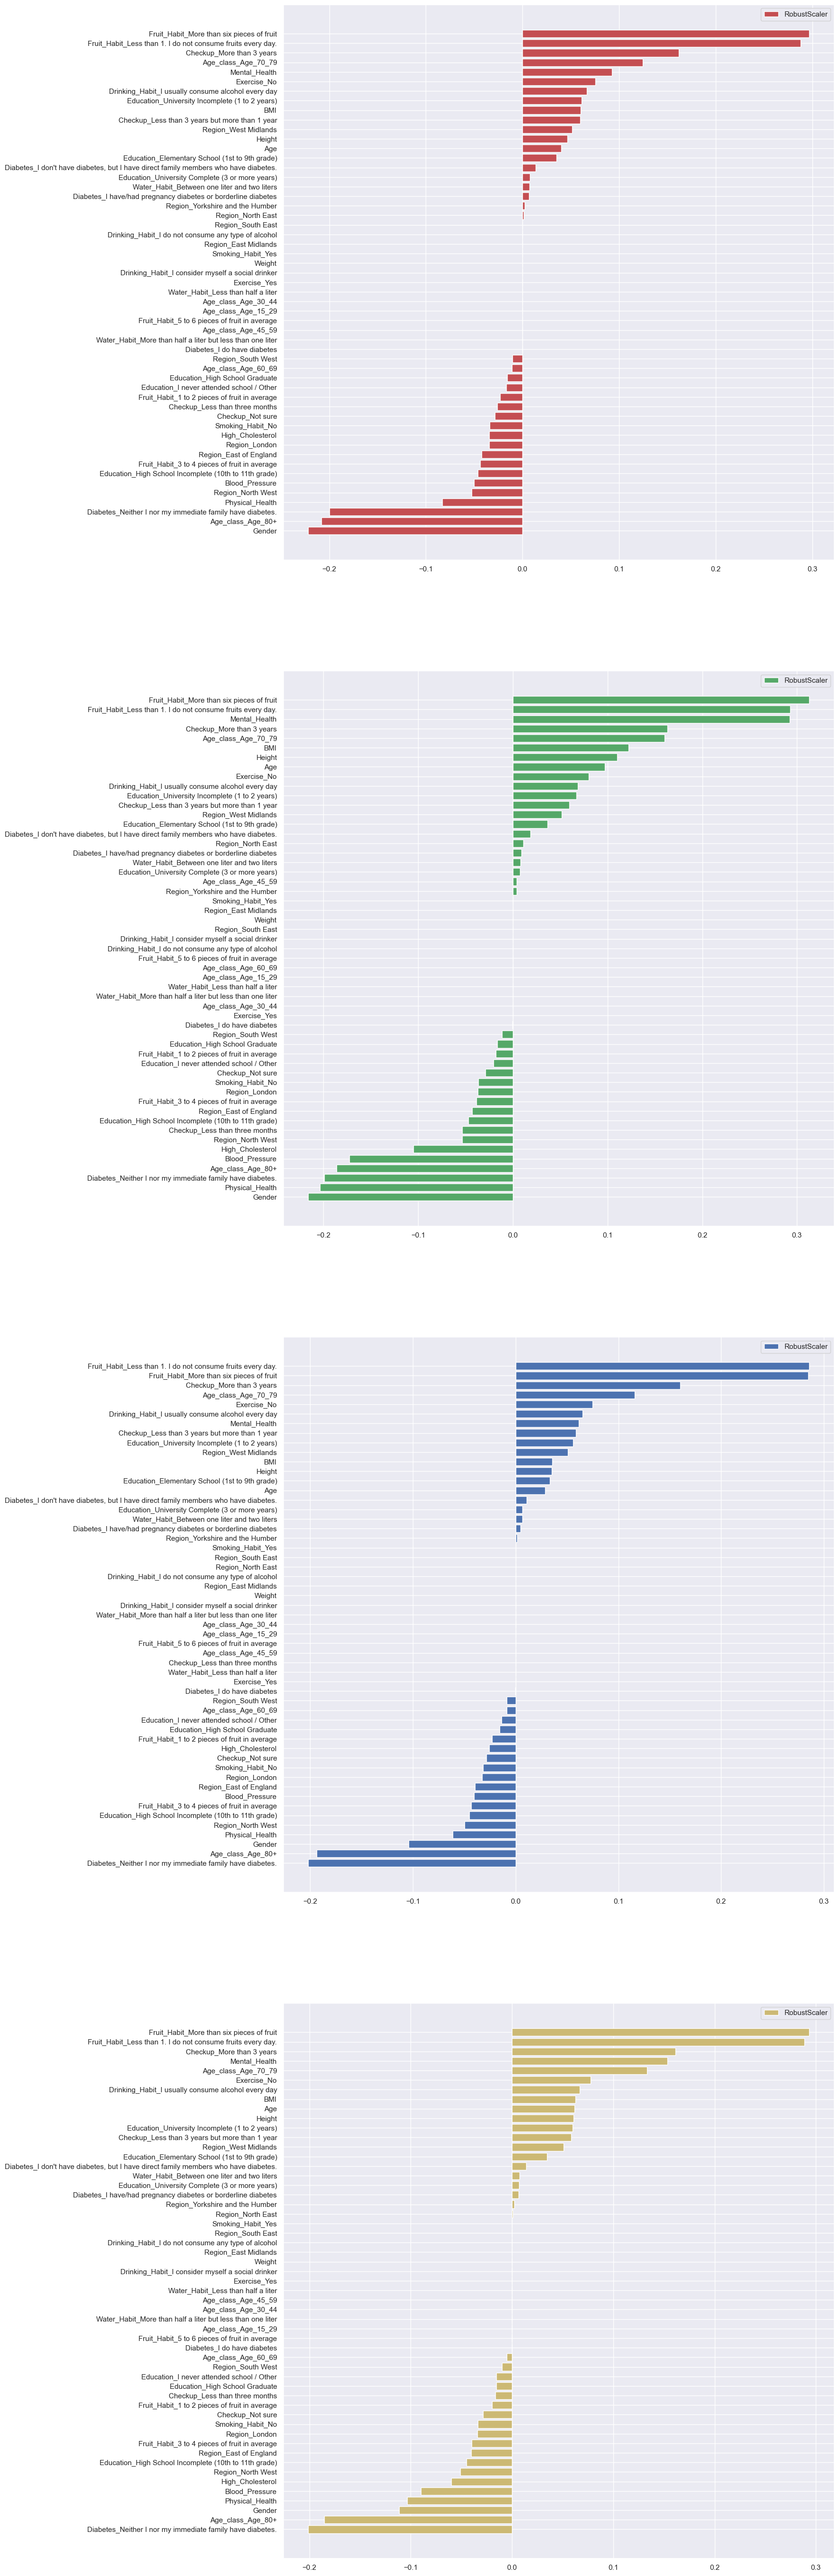

In [119]:
# We plot the feature importance of the Lasso method
scaler_importances(LassoCV())

In [121]:
# We create a list of the most important fetures using rfe cross validation ontop of the lasso method.
# Robustscaler.
lasso_features_robust = feature_list(LassoCV(),X_train_enc_scale_robust,y_train)
print('Deleted features:', len(X_train_enc_scale_robust.columns)-len(lasso_features_robust))

Deleted features: 25


In [122]:
# We create a list of the most important fetures using rfe cross validation ontop of the lasso method.
# MinMaxScaler.
lasso_features_minmax = feature_list(LassoCV(),X_train_enc_scale_minmax,y_train)
print('Deleted features:', len(X_train_enc_scale_minmax.columns)-len(lasso_features_minmax))

Deleted features: 8


In [123]:
# We create a list of the most important fetures using rfe cross validation ontop of the lasso method.
# Standardscaler.
lasso_features_standard = feature_list(LassoCV(),X_train_enc_scale_standard,y_train)
print('Deleted features:', len(X_train_enc_scale_standard.columns)-len(lasso_features_standard))

Deleted features: 15


In [124]:
# We create a list of the most important fetures using rfe cross validation ontop of the lasso method.
# MinMaxMinusScaler.
lasso_features_minmax_minus = feature_list(LassoCV(),X_train_enc_scale_minmax_minus,y_train)
print('Deleted features:', len(X_train_enc_scale_minmax_minus.columns)-len(lasso_features_minmax_minus))

Deleted features: 27


In [125]:
# Combining the lasso features.
lasso_combined_list = lasso_features_robust + lasso_features_minmax + lasso_features_standard + lasso_features_minmax_minus

In [126]:
# initialize a dictionary to store unique string elements and their counts
str_counts = {}

# loop over the elements in the list
for elem in lasso_combined_list:
  # check if the element is a string
  if isinstance(elem, str):
    # if the element is a string, increment its count in the dictionary
    # if the element is not in the dictionary, set its count to 1
    str_counts[elem] = str_counts.get(elem, 0) + 1

# print the final counts
print(str_counts) 

{'Height': 4, 'Weight': 4, 'Blood_Pressure': 4, 'Mental_Health': 4, 'Physical_Health': 4, 'Age': 4, 'BMI': 4, 'Gender': 4, 'Region_East Midlands': 4, 'Region_North West': 3, 'Region_West Midlands': 4, 'Region_Yorkshire and the Humber': 4, 'Education_Elementary School (1st to 9th grade)': 3, 'Education_I never attended school / Other': 4, 'Education_University Incomplete (1 to 2 years)': 4, 'Drinking_Habit_I do not consume any type of alcohol': 3, 'Drinking_Habit_I usually consume alcohol every day': 4, 'Exercise_No': 4, 'Fruit_Habit_1 to 2 pieces of fruit in average': 4, 'Fruit_Habit_3 to 4 pieces of fruit in average': 4, 'Fruit_Habit_Less than 1. I do not consume fruits every day.': 4, 'Fruit_Habit_More than six pieces of fruit': 4, 'Checkup_Less than 3 years but more than 1 year': 4, 'Checkup_More than 3 years': 4, 'Diabetes_Neither I nor my immediate family have diabetes.': 4, 'Age_class_Age_45_59': 3, 'Age_class_Age_70_79': 4, 'Age_class_Age_80+': 4, 'High_Cholesterol': 3, 'Region_

In [127]:
lasso_features_four_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [4]:
        lasso_features_four_out_of_four_scalers.append(key)
print(len(lasso_features_four_out_of_four_scalers), "features")

24 features


In [128]:
lasso_features_three_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [3,4]:
        lasso_features_three_out_of_four_scalers.append(key)
print(len(lasso_features_three_out_of_four_scalers), "features")

29 features


Result: The scaler seems to make a difference in the features that get selected.

<a class="anchor" id="Ridge">

### 6.3.2. Ridge Method

</a> 

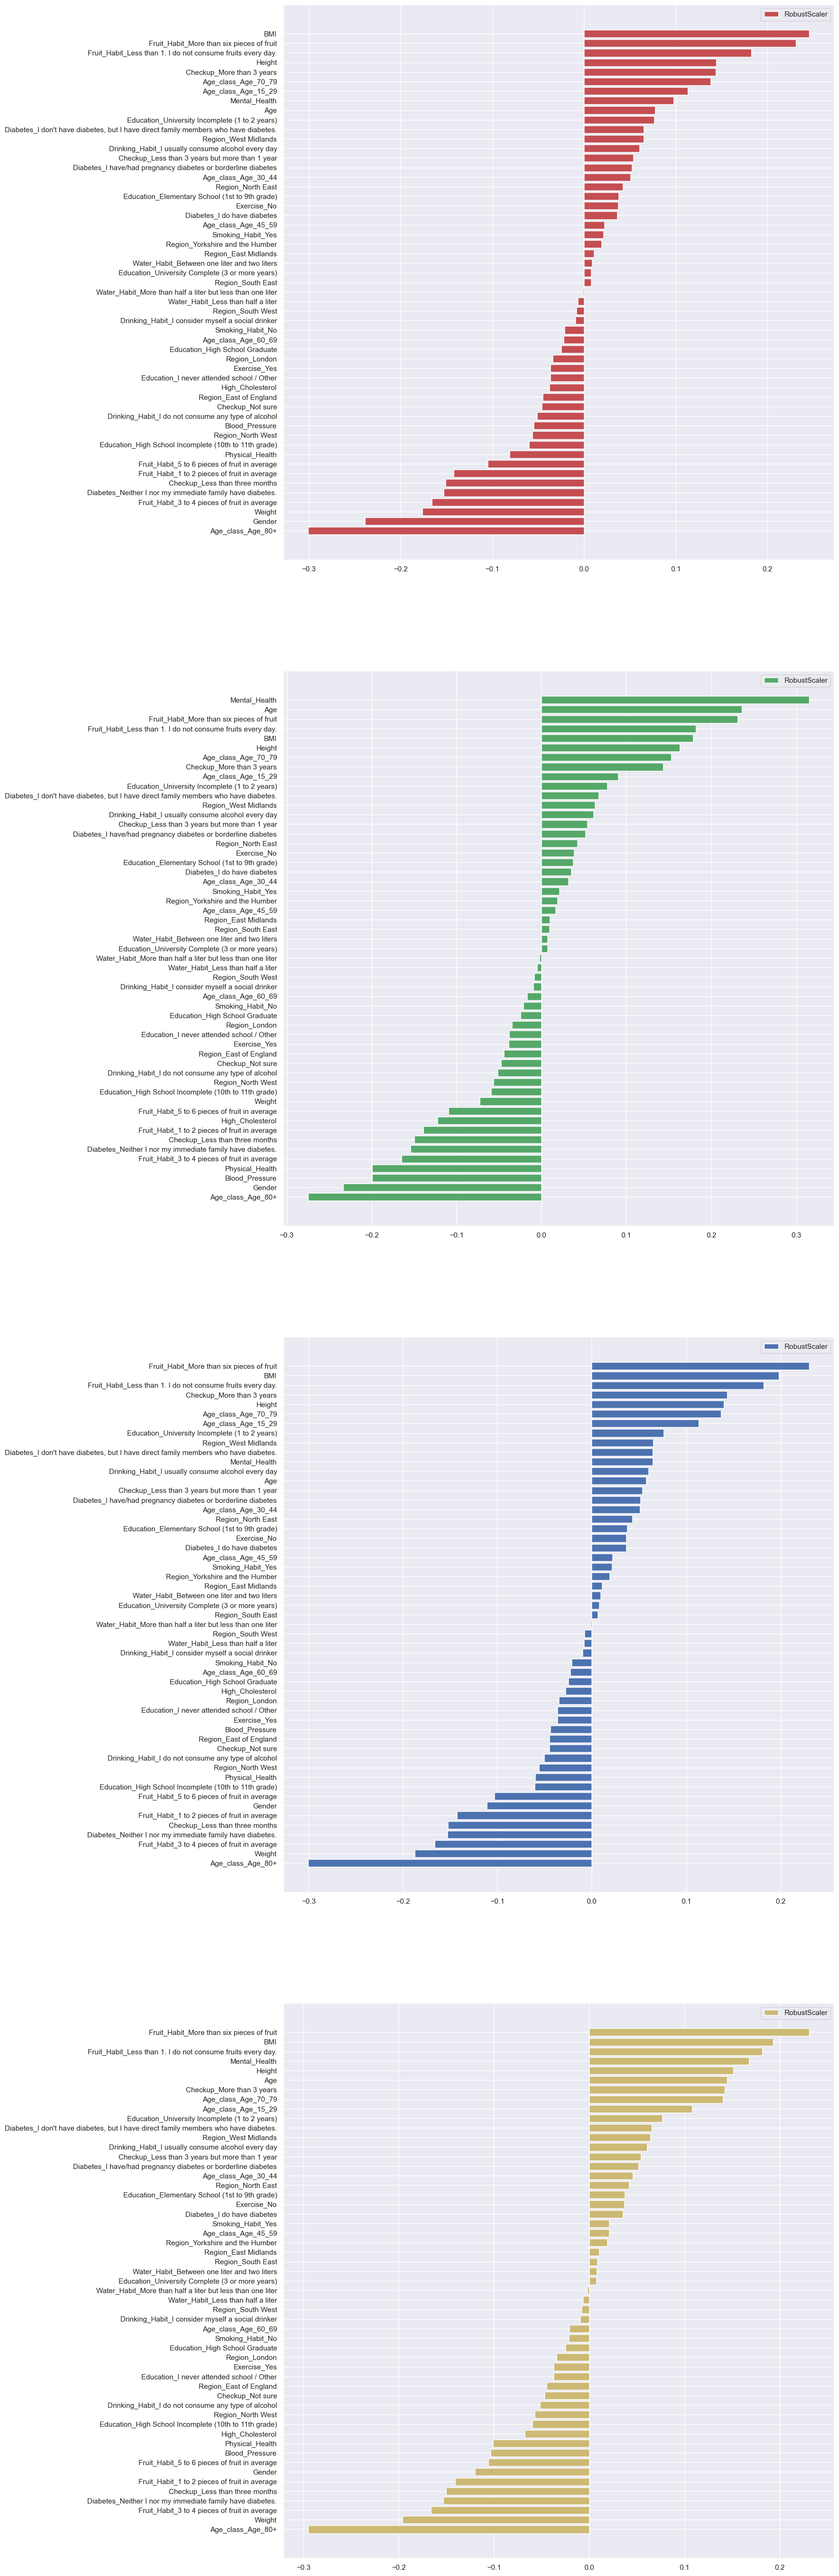

In [129]:
# We plot the feature importance of the ridge method.
scaler_importances(Ridge(alpha=1.0))

In [130]:
# We create a list of the most important fetures using rfe cross validation on top of the ridge method. 
# Robustscaler.
ridge_features_robust = feature_list(Ridge(alpha=1.0),X_train_enc_scale_robust,y_train)
ridge_features_robust
print('Deleted features:', len(X_train_enc_scale_robust.columns)-len(ridge_features_robust))

Deleted features: 5


In [131]:
# We create a list of the most important fetures using rfe cross validation on top of the ridge method.
# MinMaxScaler.
ridge_features_minmax = feature_list(Ridge(alpha=1.0),X_train_enc_scale_minmax,y_train)
ridge_features_minmax
print('Deleted features:', len(X_train_enc_scale_minmax.columns)-len(ridge_features_minmax))

Deleted features: 25


In [132]:
# We create a list of the most important fetures using rfe cross validation on top of the ridge method.
# Standardscaler.
ridge_features_standard = feature_list(Ridge(alpha=1.0),X_train_enc_scale_standard,y_train)
ridge_features_standard
print('Deleted features:', len(X_train_enc_scale_standard.columns)-len(ridge_features_standard))

Deleted features: 5


In [133]:
# We create a list of the most important fetures using rfe cross validation on top of the ridge method.
# MinMaxMinusScaler.
ridge_features_minmax_minus = feature_list(Ridge(alpha=1.0),X_train_enc_scale_minmax_minus,y_train)
ridge_features_minmax_minus
print('Deleted features:', len(X_train_enc_scale_minmax_minus.columns)-len(ridge_features_minmax_minus))

Deleted features: 21


In [134]:
# Combining the features.
ridge_combined_list = ridge_features_robust + ridge_features_minmax + ridge_features_standard + ridge_features_minmax_minus

In [135]:
# initialize a dictionary to store unique string elements and their counts
str_counts = {}

# loop over the elements in the list
for elem in ridge_combined_list:
  # check if the element is a string
  if isinstance(elem, str):
    # if the element is a string, increment its count in the dictionary
    # if the element is not in the dictionary, set its count to 1
    str_counts[elem] = str_counts.get(elem, 0) + 1

# print the final counts
print(str_counts) 

{'Height': 4, 'Weight': 4, 'High_Cholesterol': 4, 'Blood_Pressure': 4, 'Mental_Health': 4, 'Physical_Health': 4, 'Age': 4, 'BMI': 4, 'Gender': 4, 'Region_East Midlands': 2, 'Region_East of England': 3, 'Region_London': 2, 'Region_North West': 3, 'Region_South West': 2, 'Region_West Midlands': 4, 'Region_Yorkshire and the Humber': 2, 'Education_Elementary School (1st to 9th grade)': 2, 'Education_High School Graduate': 2, 'Education_High School Incomplete (10th to 11th grade)': 2, 'Education_I never attended school / Other': 4, 'Education_University Complete (3 or more years)': 2, 'Education_University Incomplete (1 to 2 years)': 3, 'Smoking_Habit_No': 2, 'Smoking_Habit_Yes': 2, 'Drinking_Habit_I consider myself a social drinker': 2, 'Drinking_Habit_I do not consume any type of alcohol': 4, 'Drinking_Habit_I usually consume alcohol every day': 4, 'Exercise_No': 4, 'Exercise_Yes': 3, 'Fruit_Habit_1 to 2 pieces of fruit in average': 4, 'Fruit_Habit_3 to 4 pieces of fruit in average': 4, '

In [136]:
ridge_features_four_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [4]:
        ridge_features_four_out_of_four_scalers.append(key)
print(len(ridge_features_four_out_of_four_scalers),"features")

27 features


In [137]:
ridge_features_three_out_of_four_scalers = []

for key, value in str_counts.items():
    if value in [3,4]:
        ridge_features_three_out_of_four_scalers.append(key)
print(len(ridge_features_three_out_of_four_scalers), "features")

33 features


Results: The scaler seems to make a difference in the features that get selected.

<a class="anchor" id="RandomForest">

### 6.3.3. Random Forest

</a> 

A feature with a high gini or entropy importance has a large impact on the predictions made by the decision tree, and is therefore considered to be an important feature.

The gini importance uses the gini impurity measure, which is calculated as the probability of a random sample being classified incorrectly, based on the probabilities of each class in the node. The entropy importance uses the entropy measure, which is calculated as the sum of the probabilities of each class, multiplied by the log of the probabilities.

In general, the gini importance and entropy importance will give similar results, but the entropy importance is more sensitive to changes in the probabilities of the classes. This means that the entropy importance is more sensitive to the structure of the data, and may be more accurate for some datasets.

<AxesSubplot:>

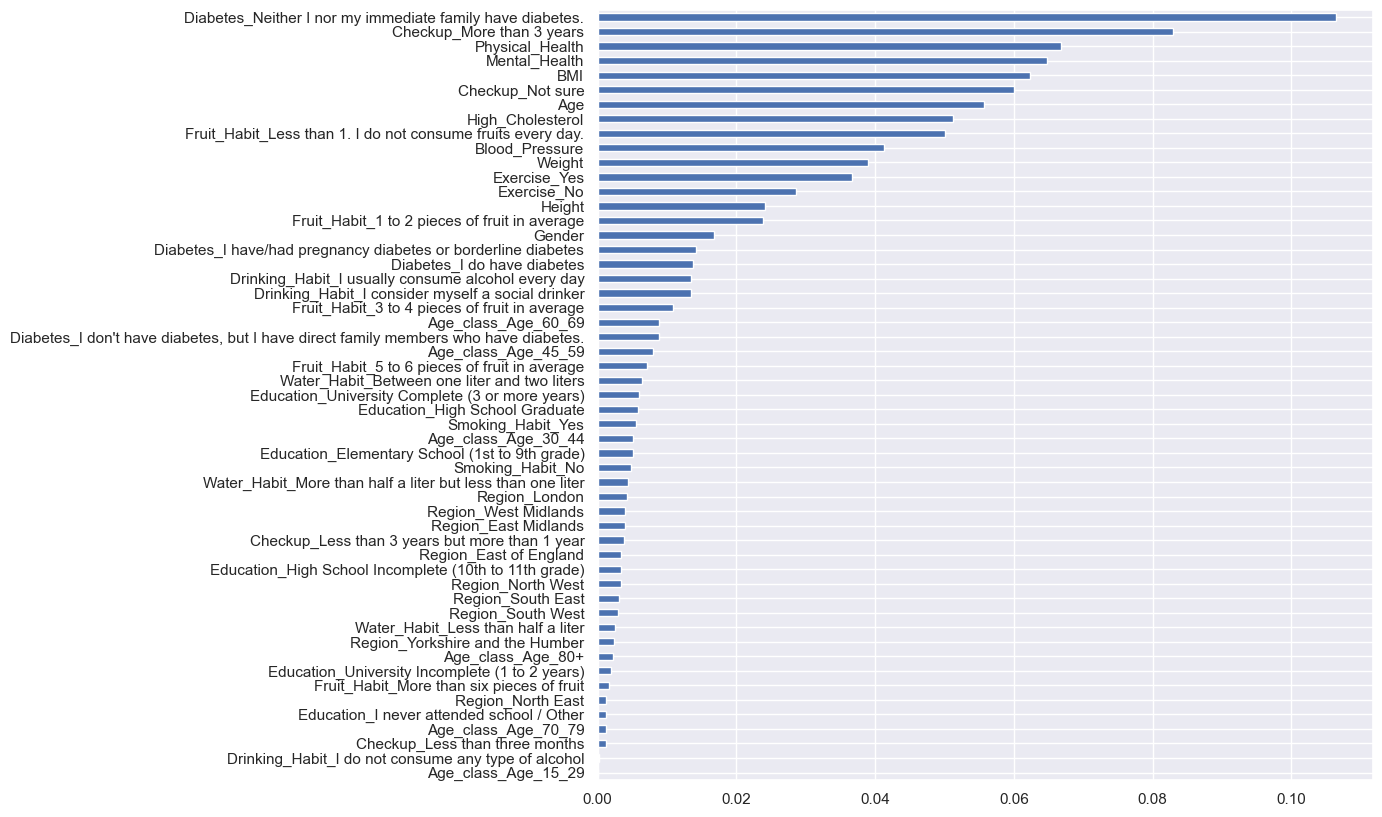

In [138]:
# Plot the random forest gini importances of the different features.
# No scaler used.
plot_tree_importance(RandomForestClassifier(criterion="gini",random_state=42),X_train,y_train)

In [139]:
# Create a list of most important features of gini importance of the random forest using the RFE cross validation.
# See how much features where deleted with that method.

rf_gini_features = feature_list(RandomForestClassifier(criterion="gini",random_state=42),X_train,y_train)
print('Deleted features:', len(X_train.columns)-len(rf_gini_features))

Deleted features: 34


<AxesSubplot:>

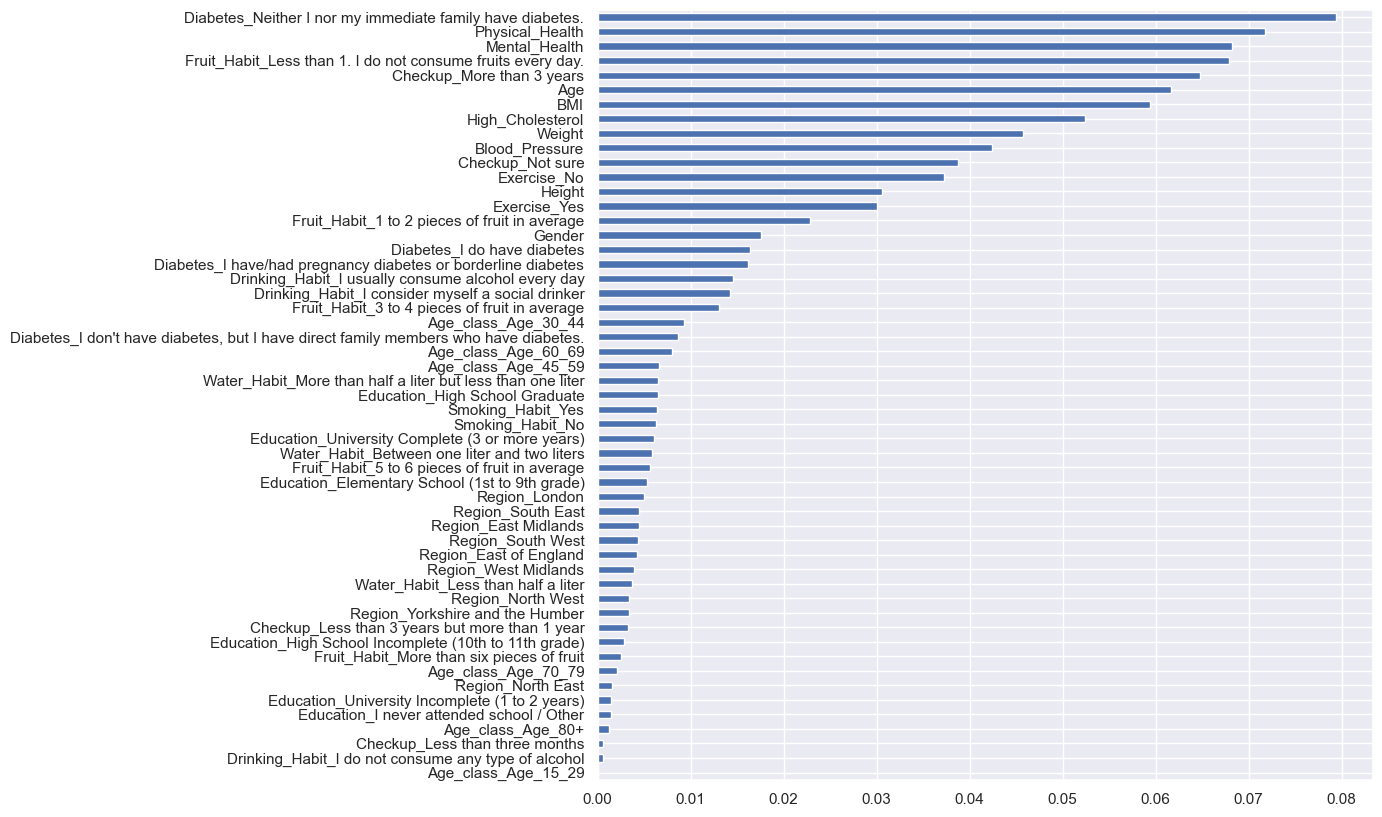

In [140]:
# Plot the random forest entropy importances of the different features.
# No scaler used.
plot_tree_importance(RandomForestClassifier(criterion="entropy"),X_train,y_train)

In [141]:
# Create a list of most important features of entropy importance.

rf_entropy_features = feature_list(RandomForestClassifier(criterion="entropy",random_state=42),X_train,y_train)
print('Deleted features:', len(X_train.columns)-len(rf_entropy_features))

Deleted features: 34


In [142]:
# Combine the features of gini importance and entropy importance of random forest to get a merged list of 
# the features of both importances.

rf_features = rf_gini_features + rf_entropy_features
rf_features_final = []
[rf_features_final.append(x) for x in rf_features if x not in rf_features_final] 
# remove duplicates that were in both importances
print('Deleted features:', len(X_train.columns)-len(rf_features_final))

Deleted features: 34


<a class="anchor" id="DecisionTree">

### 6.3.4. Decision Tree

</a> 

<AxesSubplot:>

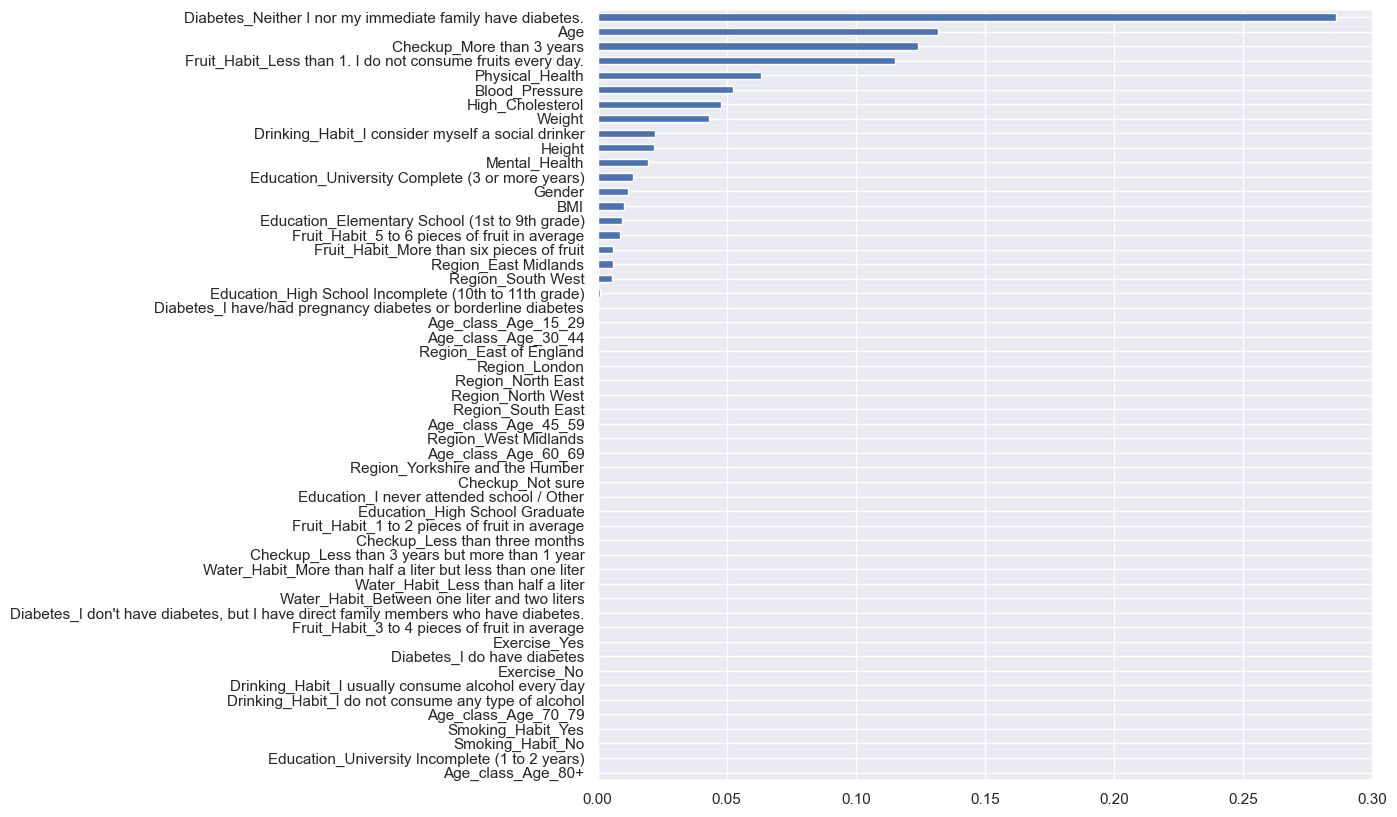

In [143]:
# Plot the decision tree gini importances for each feature.
# No scaler used.
plot_tree_importance(DecisionTreeClassifier(criterion="gini",random_state=42),X_train,y_train)

In [144]:
# Create a list of most important features decision tree gini importances.
# See how much festures got deleted by that process.

dt_gini_features = feature_list(DecisionTreeClassifier(criterion="gini",random_state=42),X_train,y_train)
print('Deleted features:', len(X_train.columns)-len(dt_gini_features))

Deleted features: 46


<AxesSubplot:>

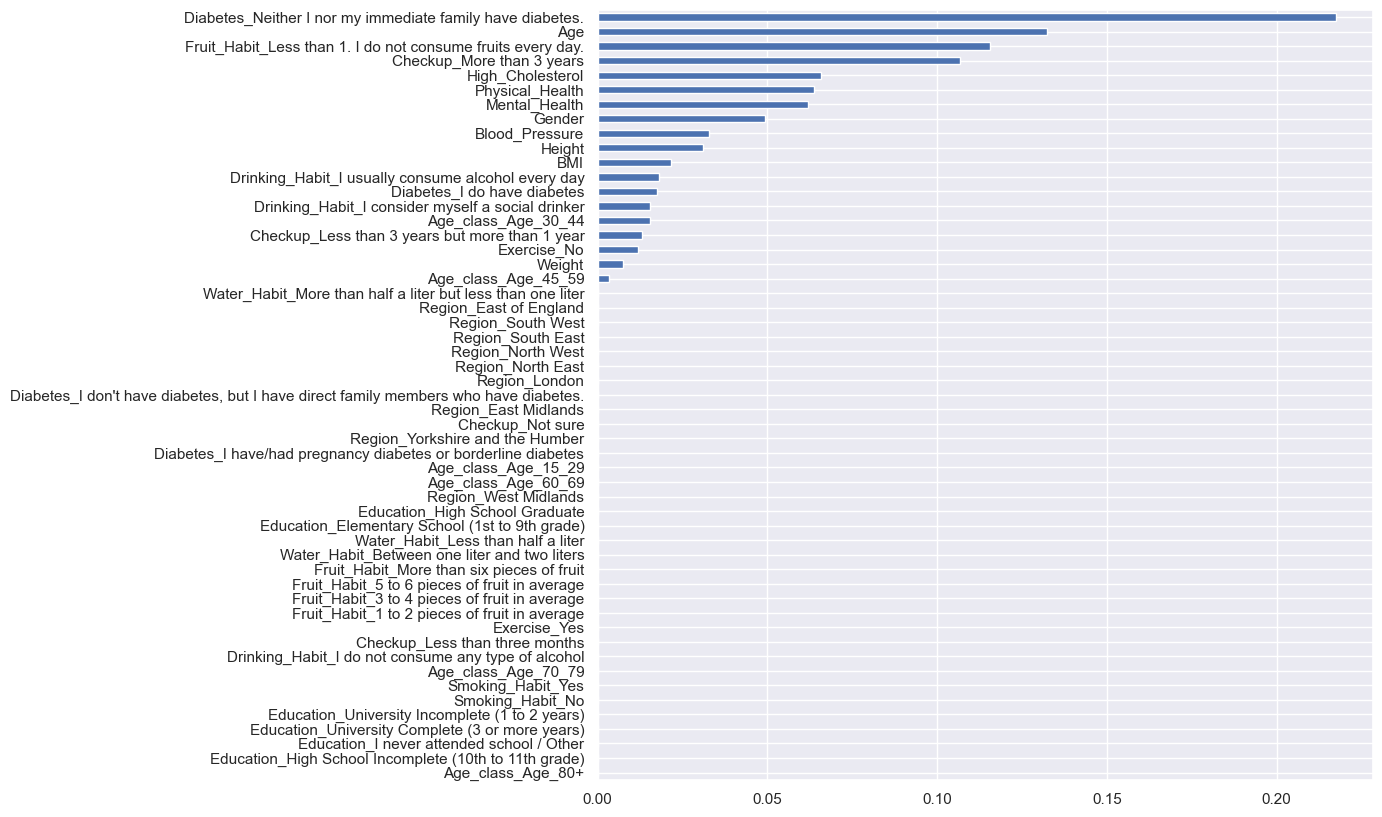

In [145]:
# Plot the decision tree entropy importances of the different features.
# No scaler used.
plot_tree_importance(DecisionTreeClassifier(criterion="entropy",random_state=42),X_train,y_train)

In [146]:
# Create a List of most important features of the decision tree entropy importance.
# See how many features got deleted by that process.

dt_entropy_features = feature_list(DecisionTreeClassifier(criterion="entropy",random_state=42),X_train,y_train)
dt_gini_features
print('Deleted features:', len(X_train.columns)-len(dt_entropy_features))

Deleted features: 49


In [147]:
# Combine the features of gini importance and entropy importance of decision tree to have a merged liet of the
# most important features of both gini and entropy importance.

dt_features = dt_gini_features + dt_entropy_features
dt_features_final = []
[dt_features_final.append(x) for x in dt_features if x not in dt_features_final]
print('Deleted features:', len(X_train.columns)-len(dt_features_final))

Deleted features: 46


In [148]:
# Potential merge of the Decision Tree and Random Forest featres if we decide to use that.


##combine the features of gini importance of random forest and decision tree
#gini_features = rf_gini_list + dt_gini_list
#gini_features_final = []
#[gini_features_final.append(x) for x in gini_features if x not in gini_features_final]
#
##combine the features of entropy importance of random forest and decision tree
#entropy_features = rf_entropy_list + dt_entropy_list
#entropy_features_final = []
#[entropy_features_final.append(x) for x in entropy_features if x not in entropy_features_final]
#
##combine the features of all importances random forest and decision tree
#combined_features = gini_features_final + entropy_features_final
#combined_features_final = []
#[combined_features_final.append(x) for x in combined_features if x not in combined_features_final]
#combined_features_final

<a class="anchor" id="Summary">

## 6.4. Summary

</a> 

We created different datasets with different kind of feature selection methods. Now we have to decide which updates datasets we should use on the models.

Filter methods:

- The ANOVA method deleted 24 features for each scaler and is worth considering to test on the models.

This is the list of the remaining features:

In [149]:
#anova_features_three_out_of_four_scalers
#anova_features_four_out_of_four_scalers

Wrapper Method:
- The RFE Method for the logistic regression deleted 27 features for every scaler and could be promising to test in the following.

This is the lists of the remaining features after using different scaler:

In [150]:
#rfe_features_three_out_of_four_scalers
#rfe_features_four_out_of_four_scalers

Embedded Method: 

- The Ridge Method deleted different amount of features for each scaler and could improve our models.
- The Lasso Method deleted different amount of features and is interesting to perform later.

This is the lists of the remaining features:

In [151]:
#ridge_features_three_out_of_four_scalers
#ridge_features_four_out_of_four_scalers

#lasso_features_three_out_of_four_scalers
#lasso_features_four_out_of_four_scalers

- The decision tree deleted 46 features and therefore the most festures, it will be interesting to see the impact that has on the models.

This is the list of the remaining features:

In [152]:
#dt_features_final

- The random forest deleted 34 features, it will be interesting to see the impact that has on the models.

This is the list of the remaining features:

In [153]:
#rf_features_final

The final list of datasets we can use to test our models are:

Filter Method:
- anova_features

Wrapper Method:
- rfe_features

Embedded Method:
- lasso_features
- rifge_features
- dt_features_final
- rf_features_final

We can decide if we want to combine some of these datasets in order to possibly achieve a better performance.

In [154]:
# Check which features appeared the most times with the features selected from three out of four scalers.
# Therefore, combining the datasets.
combined_features_three_out_four_scalers = anova_features_three_out_of_four_scalers + rfe_features_three_out_of_four_scalers\
        + lasso_features_three_out_of_four_scalers + ridge_features_three_out_of_four_scalers\
        + dt_features_final +rf_features_final

In [155]:
# Now counting the number of selected features from the above subsets.

# initialize a dictionary to store unique string elements and their counts
str_counts = {}

# loop over the elements in the list
for elem in combined_features_three_out_four_scalers:
  # check if the element is a string
  if isinstance(elem, str):
    # if the element is a string, increment its count in the dictionary
    # if the element is not in the dictionary, set its count to 1
    str_counts[elem] = str_counts.get(elem, 0) + 1

# print the final counts
print(str_counts) 

{'Height': 5, 'Weight': 5, 'High_Cholesterol': 5, 'Blood_Pressure': 5, 'Mental_Health': 5, 'Physical_Health': 6, 'Age': 5, 'BMI': 5, 'Gender': 5, 'Education_Elementary School (1st to 9th grade)': 2, 'Drinking_Habit_I consider myself a social drinker': 2, 'Drinking_Habit_I usually consume alcohol every day': 5, 'Exercise_No': 5, 'Exercise_Yes': 3, 'Fruit_Habit_1 to 2 pieces of fruit in average': 5, 'Fruit_Habit_3 to 4 pieces of fruit in average': 4, 'Fruit_Habit_5 to 6 pieces of fruit in average': 3, 'Fruit_Habit_Less than 1. I do not consume fruits every day.': 6, 'Fruit_Habit_More than six pieces of fruit': 4, 'Checkup_Less than 3 years but more than 1 year': 4, 'Checkup_More than 3 years': 6, 'Checkup_Not sure': 4, 'Diabetes_I do have diabetes': 1, "Diabetes_I don't have diabetes, but I have direct family members who have diabetes.": 3, 'Diabetes_I have/had pregnancy diabetes or borderline diabetes': 3, 'Diabetes_Neither I nor my immediate family have diabetes.': 6, 'Age_class_Age_30

In [156]:
# These are the features that got selected from three out of four scalers and six out of six feature selection models.

# What is the reason behind this?
#-> more options of subsets to try to improve the model score, but we have to see if its even beneficial.
six_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [6]:
        six_out_of_six_methods.append(key)
len(six_out_of_six_methods)

4

In [157]:
# These are the features that got selected from three out of four scalers and five out of six feature selection models.
five_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [5, 6]:
        five_out_of_six_methods.append(key)
len(five_out_of_six_methods)

15

In [158]:
# These are the features that got selected from three out of four scalers and four out of six feature selection models.
four_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [4, 5, 6]:
        four_out_of_six_methods.append(key)
len(four_out_of_six_methods)

20

In [159]:
# These are the features that got selected from three out of four scalers and three out of six feature selection models.
three_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [3, 4, 5, 6]:
        three_out_of_six_methods.append(key)
len(three_out_of_six_methods)

26

In [199]:
# Check which features appeared most often with the features selected from four out of four scalers.
# Therefore, combining the datasets.
combined_features_four_out_four_scalers = anova_features_four_out_of_four_scalers + rfe_features_four_out_of_four_scalers\
        + lasso_features_four_out_of_four_scalers + ridge_features_four_out_of_four_scalers + dt_features_final +rf_features_final

In [161]:
# Now counting the number of selected features from the above subsets.

# initialize a dictionary to store unique string elements and their counts
str_counts = {}

# loop over the elements in the list
for elem in combined_features_four_out_four_scalers:
  # check if the element is a string
  if isinstance(elem, str):
    # if the element is a string, increment its count in the dictionary
    # if the element is not in the dictionary, set its count to 1
    str_counts[elem] = str_counts.get(elem, 0) + 1

# print the final counts
print(str_counts) 

{'Height': 4, 'Weight': 5, 'High_Cholesterol': 4, 'Blood_Pressure': 5, 'Mental_Health': 5, 'Physical_Health': 6, 'Age': 5, 'BMI': 4, 'Gender': 5, 'Education_Elementary School (1st to 9th grade)': 1, 'Drinking_Habit_I consider myself a social drinker': 2, 'Drinking_Habit_I usually consume alcohol every day': 5, 'Exercise_No': 5, 'Exercise_Yes': 2, 'Fruit_Habit_1 to 2 pieces of fruit in average': 5, 'Fruit_Habit_3 to 4 pieces of fruit in average': 4, 'Fruit_Habit_5 to 6 pieces of fruit in average': 3, 'Fruit_Habit_Less than 1. I do not consume fruits every day.': 6, 'Fruit_Habit_More than six pieces of fruit': 4, 'Checkup_Less than 3 years but more than 1 year': 3, 'Checkup_More than 3 years': 6, 'Checkup_Not sure': 4, 'Diabetes_I do have diabetes': 1, "Diabetes_I don't have diabetes, but I have direct family members who have diabetes.": 3, 'Diabetes_I have/had pregnancy diabetes or borderline diabetes': 3, 'Diabetes_Neither I nor my immediate family have diabetes.': 6, 'Age_class_Age_30

In [162]:
# These are the features that got selected from all the scalers and six out of six feature selection models.
all_scalers_six_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [6]:
        all_scalers_six_out_of_six_methods.append(key)
len(all_scalers_six_out_of_six_methods)

4

In [163]:
# These are the features that got selected from all the scalers and five out of six feature selection models.
all_scalers_five_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [5, 6]:
        all_scalers_five_out_of_six_methods.append(key)
len(all_scalers_five_out_of_six_methods)

12

In [164]:
# These are the features that got selected from all the scalers and four out of six feature selection models.
all_scalers_four_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [4, 5, 6]:
        all_scalers_four_out_of_six_methods.append(key)
len(all_scalers_four_out_of_six_methods)

19

In [165]:
# These are the features that got selected from all the scalers and three out of six feature selection models.
all_scalers_three_out_of_six_methods = []

for key, value in str_counts.items():
    if value in [3, 4, 5, 6]:
        all_scalers_three_out_of_six_methods.append(key)
len(all_scalers_three_out_of_six_methods)

25

Lists available to testing the models:

In [166]:
#These are the selected features from three out of four scaler methods, with the corresponding 
#number of models in which the features appeard:

#six_out_of_six_methods
#five_out_of_six_methods
#four_out_of_six_methods
#three_out_of_six_methods


#These are the selected features from four out of four scaler methods, with the corresponding 
#number of models in which the features appeard:

#all_scalers_six_out_of_six_methods
#all_scalers_five_out_of_six_methods
#all_scalers_four_out_of_six_methods
#all_scalers_three_out_of_six_methods

In [167]:
#What is happening down here? Everything was more or less clear until now. The above I do not get.

In [168]:
# from now on this part is from ricardo, we have to decide if we can somehoe implement it or drop it from the 
# notebook

<a class="anchor" id="Continuous-Continuousvariables">

### 6.1.1. Continuous-Continuous variables

</a>

In [169]:
# Create a minmax scaled dataset of the whole train_df dataset.
train_enc_scaled_dict = return_scale_datasets(train_df_enc, numerical_features)
train_enc_scale_minmax = train_enc_scaled_dict["minmax"][0]
train_enc_scale_minmax

Height    Weight  High_Cholesterol  Blood_Pressure  \
PatientID                                                         
1167       0.137931  0.473684          0.914286        0.342105   
1805       0.758621  0.842105          0.401003        0.631579   
1557       0.379310  0.491228          0.384962        0.368421   
1658       1.000000  0.456140          0.733835        0.407895   
1544       1.000000  0.315789          0.589474        0.407895   
...             ...       ...               ...             ...   
1909       0.931034  0.368421          0.296742        0.657895   
1386       0.206897  0.368421          0.332832        0.342105   
1088       0.551724  0.140351          0.569424        0.605263   
1662       0.482759  0.614035          0.312782        0.236842   
1117       0.758621  0.526316          0.204511        0.342105   

           Mental_Health  Physical_Health       Age       BMI  Gender  \
PatientID                                                               
1167            0.714286         0.114286  0.543689  0.832061     0.0   
1805            0.285714         0.000000  0.466019  0.946565     1.0   
1557            0.892857         0.000000  0.368932  0.679389     1.0   
1658            0.428571         0.457143  0.679612  0.259542     1.0   
1544            0.607143         0.114286  0.485437  0.068702     1.0   
...                  ...              ...       ...       ...     ...   
1909            0.392857         0.228571  0.407767  0.175573     1.0   
1386            0.785714         0.000000  0.252427  0.587786     0.0   
1088            0.678571         0.971429  1.000000  0.015267     0.0   
1662            0.535714         0.000000  0.349515  0.801527     1.0   
1117            0.357143         0.685714  0.271845  0.488550     1.0   

           Region_East Midlands  ...  Diabetes_I do have diabetes  \
PatientID                        ...                                
1167                        0.0  ...                          0.0   
1805                        0.0  ...                          0.0   
1557                        0.0  ...                          0.0   
1658                        0.0  ...                          0.0   
1544                        0.0  ...                          0.0   
...                         ...  ...                          ...   
1909                        1.0  ...                          0.0   
1386                        0.0  ...                          0.0   
1088                        1.0  ...                          0.0   
1662                        0.0  ...                          0.0   
1117                        0.0  ...                          0.0   

           Diabetes_I don't have diabetes, but I have direct family members who have diabetes.  \
PatientID                                                                                        
1167                                                     0.0                                     
1805                                                     0.0                                     
1557                                                     0.0                                     
1658                                                     0.0                                     
1544                                                     0.0                                     
...                                                      ...                                     
1909                                                     0.0                                     
1386                                                     0.0                                     
1088                                                     0.0                                     
1662                                                     0.0                                     
1117                                                     0.0                                     

           Diabete

In [170]:
# With outliers capped and econded.

train_enc_scale_minmax[numerical_features].corr()

# Gender and height have almost high correlation

Height    Weight  High_Cholesterol  Blood_Pressure  \
Height            1.000000  0.512673         -0.083155       -0.007006   
Weight            0.512673  1.000000         -0.037964       -0.086173   
High_Cholesterol -0.083155 -0.037964          1.000000        0.130935   
Blood_Pressure   -0.007006 -0.086173          0.130935        1.000000   
Mental_Health    -0.042830  0.301473         -0.006537       -0.034084   
Physical_Health   0.062986 -0.387447          0.038943        0.148029   
Age              -0.086529 -0.183397          0.225204        0.246288   
BMI              -0.017484  0.845532          0.018880       -0.101520   
Gender            0.688440  0.363237         -0.177299       -0.064674   

                  Mental_Health  Physical_Health       Age       BMI    Gender  
Height                -0.042830         0.062986 -0.086529 -0.017484  0.688440  
Weight                 0.301473        -0.387447 -0.183397  0.845532  0.363237  
High_Cholesterol      -0.006537         0.038943  0.225204  0.018880 -0.177299  
Blood_Pressure        -0.034084         0.148029  0.246288 -0.101520 -0.064674  
Mental_Health          1.000000        -0.338815 -0.362383  0.374273 -0.040046  
Physical_Health       -0.338815         1.000000  0.186252 -0.489445  0.090770  
Age                   -0.362383         0.186252  1.000000 -0.158136 -0.147118  
BMI                    0.374273        -0.489445 -0.158136  1.000000  0.004346  
Gender                -0.040046         0.090770 -0.147118  0.004346  1.000000

<a class="anchor" id="Binary-Continuousvariables">

### 6.1.2. Binary-Continuous Variables

</a>

#### Point biserial Corr

In [171]:
# A type of correlation that is good to analyse a binary variable witha continuous one.
# Professor Carina said it is a plausible option to use

for i in numerical_features:
    print('The corr of Disease and {} is:'.format(i), stats.pointbiserialr(train_df['Disease'], train_enc_scale_minmax[i].astype(float)))

The corr of Disease and Height is: PointbiserialrResult(correlation=-0.17077942989699954, pvalue=1.1824592485940374e-06)
The corr of Disease and Weight is: PointbiserialrResult(correlation=0.17516634427100441, pvalue=6.186613467427203e-07)
The corr of Disease and High_Cholesterol is: PointbiserialrResult(correlation=-0.09602157423471795, pvalue=0.006569051731469119)
The corr of Disease and Blood_Pressure is: PointbiserialrResult(correlation=-0.16072930594980425, pvalue=4.906684226221799e-06)
The corr of Disease and Mental_Health is: PointbiserialrResult(correlation=0.4181294993509529, pvalue=3.3675685328799847e-35)
The corr of Disease and Physical_Health is: PointbiserialrResult(correlation=-0.44925600754717454, pvalue=5.39565174755005e-41)
The corr of Disease and Age is: PointbiserialrResult(correlation=-0.2117864745757081, pvalue=1.4519435376373733e-09)
The corr of Disease and BMI is: PointbiserialrResult(correlation=0.31035015176100533, pvalue=2.5373799083492953e-19)
The corr of Dis

In [172]:
numerical_features

['Height',
 'Weight',
 'High_Cholesterol',
 'Blood_Pressure',
 'Mental_Health',
 'Physical_Health',
 'Age',
 'BMI',
 'Gender']

#### Anova

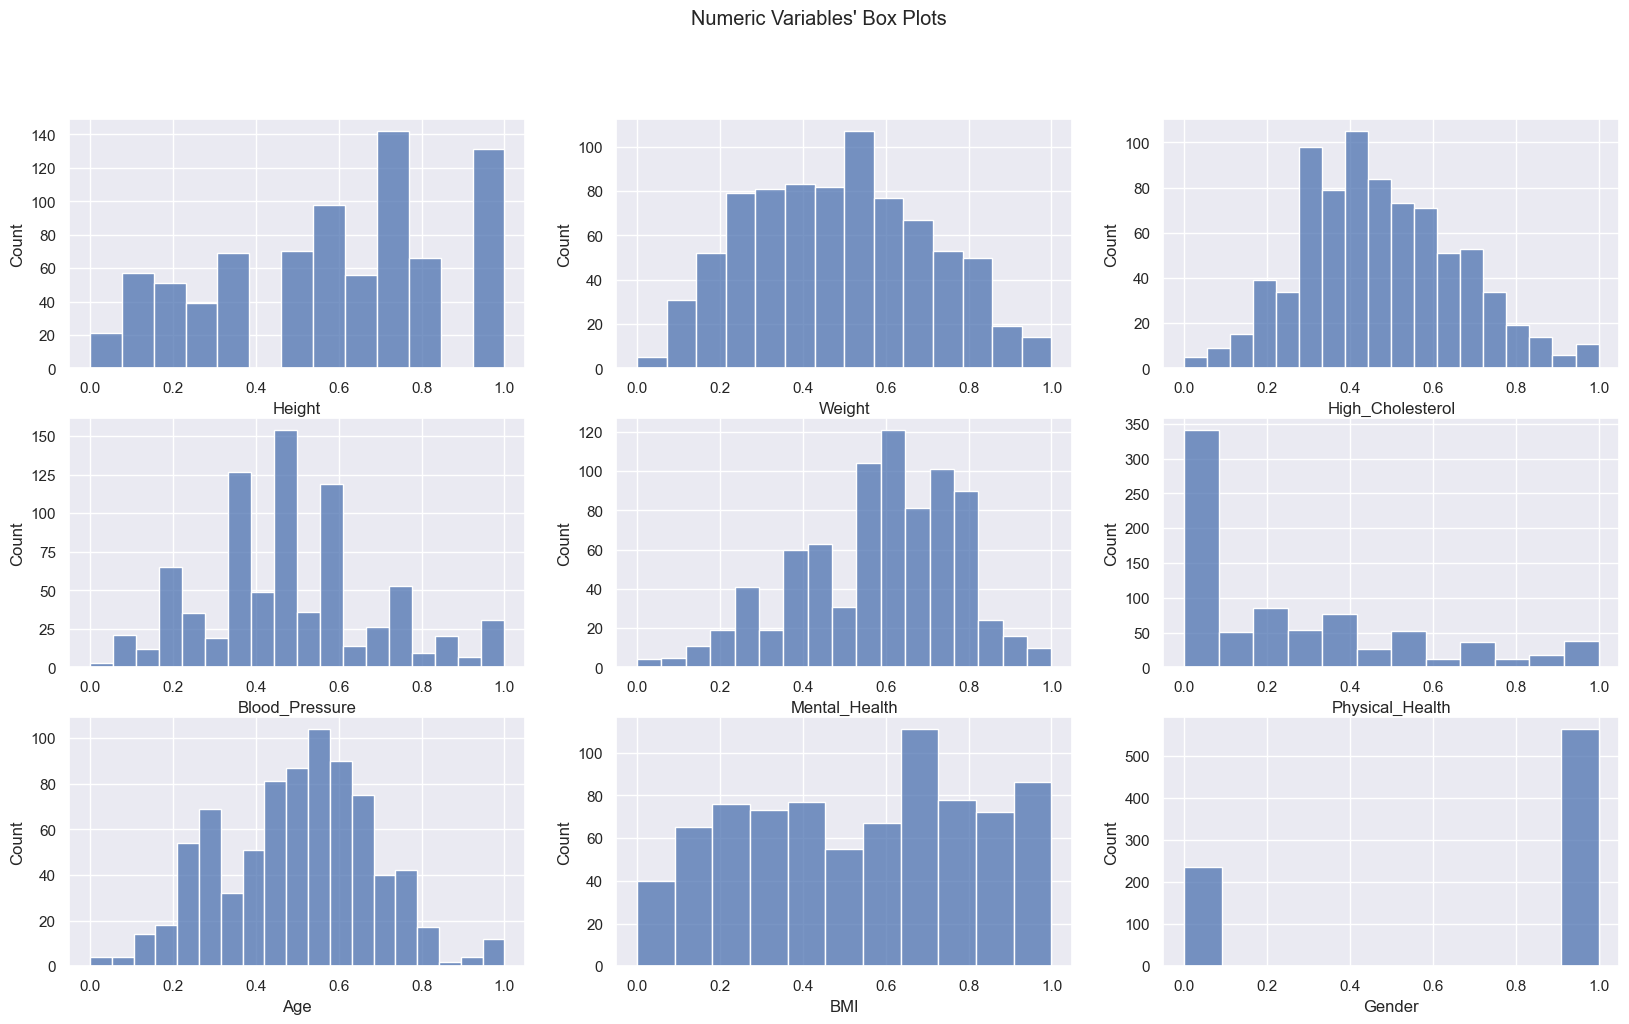

In [173]:
# We could do an Anova test however it is only possible to do ANOVA if the data follows these assumptions:
# The population from which samples are drawn should be normally distributed.
# Independence of cases: the sample cases should be independent of each other.
# Homogeneity of variance: Homogeneity means that the variance among the groups should be approximately equal.

sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(numerical_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numerical_features): # Notice the zip() function and flatten() method
    sns.histplot(x=train_enc_scale_minmax[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)


plt.show()

In [174]:
# Follow normal distribution: weight, high_cholesterol (with no outliers), blood pressure (with different bining),
# mental health, age (with no outliers)
# assumed the var is similar, but it is better to calculate

f1_df = train_enc_scale_minmax
f_oneway(f1_df['Weight'],f1_df['High_Cholesterol'],f1_df['Blood_Pressure'],f1_df['Mental_Health'],f1_df['Age'])

# Since the p-value is less than 0.05 hence we would reject the null hypothesis. This means the group means are not in the same population

F_onewayResult(statistic=40.271024569069496, pvalue=4.0018527781095405e-33)

<a class="anchor" id="Categorical-Categoricalvariables">

### 6.1.3. Categorical-Categorical Variables

</a>

In [175]:
# In feature selection, we aim to select the features which are highly dependent on the response.
# The higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.
cat_feat = ['Region', 'Education','Smoking_Habit','Drinking_Habit', 'Exercise', 'Fruit_Habit', 'Water_Habit','Checkup', 'Diabetes']


for cat in cat_feat:
    chi_square_test(train_df_capped_outliers[cat],target, cat)
    

#@Ricardo, I changed the name of the function here as above. Is that correct?

Drinking_Habit is a good predictor
Exercise is a good predictor
Fruit_Habit is a good predictor
Checkup is a good predictor
Diabetes is a good predictor


<a class="anchor" id="ModelSelection">

# 7. Model Selection

</a>

<a class="anchor" id="DataPartition">

## 7.1. Data Partition

</a>

In [176]:
# # Split dataset into train(70%) and validation(30%) by using the method train_test_split().
# # Shuffle is by default True.
# # Implementing stratification to force the distribution of the target variable y among the different splits to be the same. 

# X_train, X_val, y_train, y_val = train_test_split(data, 
#                                                   target, 
#                                                   test_size = 0.3, 
#                                                   random_state=42,
#                                                   stratify = target)

<a class="anchor" id="Predictive Modelling">

## 7.2. Predictive Modelling

</a>

The data show that we have a supervised classification problem. Below we present a selection of Machine Learning algorithms that we have chosen to solve the classification problem.

Next steps:

1. Run models without Scaler and Feature Selection
3. Run models with Scalers
4. Run models with Scalers and Feature Selection
5. Decide on one approach with best scores
6. Plot the ROC curve
7. Decide on 3 models for further improvement
8. Hyperparameter Tuning
9. Decide final model

In [177]:
# Turn off warnings.

import warnings
warnings.filterwarnings("ignore")

<a class="anchor" id="RunmodelswithoutScalerandFeatureSelection">

### 7.2.1. Run models without Scaler and Feature Selection

</a>

First of all, we run or models with the Machine Learning algoirthms we selected to solve the underlaying classification problem. In the first attempt we let the models run with default values to make a first selection of algorithms. In the following steps we will further maximize the performance of chosen algorithms by implementing different scalers, Feature Selection and hyperparameter tuning.

In [178]:
# List of classifiers to test with the training data

n = -1

classifier = [
            SVC(random_state=42),
            GaussianNB(),
            KNeighborsClassifier(),
            DecisionTreeClassifier(random_state=42),
            LogisticRegression(random_state=42),
            MLPClassifier(random_state=42),
            ExtraTreesClassifier(n_jobs=n, random_state=42),
            HistGradientBoostingClassifier(random_state=42),
            PassiveAggressiveClassifier(random_state=42),
            BaggingClassifier(n_jobs=n, random_state=42),
            RandomForestClassifier(n_jobs=n, random_state=42),
            ]


In [ ]:
# Ensemble learning is a machine learning paradigm where multiple models (often called “weak learners”)
# are trained to solve the same problem and combined to get better results.
# The main hypothesis is that when weak models are correctly combined we can obtain more accurate and/or robust models.
# Bagging, that often considers homogeneous weak learners, learns them independently from each other in parallel and
# combines them following some kind of deterministic averaging process.
# Bagging ensemble e.g. of KNeighborsClassifier estimators, each built on random subsets of a certain amount
# of the samples and the other amount of the features.
# Boosting, that often considers homogeneous weak learners, learns them sequentially in a very
# adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy.
# Overall, bagging will mainly focus at getting an ensemble model with less variance than its components 
# whereas boosting will mainly try to produce strong models less biased than their components (even if variance can also be reduced).
# Source: https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

# Ensemble methods is a machine learning technique that combines several base models in order to produce one optimal predictive model.
# Bagging combines Bootstrapping and Aggregation to form one ensemble model.
# Their main characteristic is producing an ensemble model that is more robust than the individual models.
# Source: https://towardsdatascience.com/ensemble-methods-in-machine-learning-what-are-they-and-why-use-them-68ec3f9fef5f

# A random forest is a collection of decision trees whose results are aggregated into one final result.
# Thus, a random forest is more robust to overfitting and they are outstanding models in terms of 
# minimizing both, error due to bias and due to variance.
# Decision trees perform well on large datasets and can handle numerical as well as categorical data, 
# but they also have disadvantages as they are prone to overfitting.
# Source: https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991

# The k-nearest neighbors (KNN) algorithm is a supervised machine learning algorithm
# that can be used to solve both classification and regression problems.
# It is often referred to as instance-based learning and is therefore very sensitive to outliers.
# Considered as lazy learners as they start classification process
# hwen classification is conducted. They have a comparative small training time.

# Naive Bayes: 
# The overall goal is to have independence among predictors.
# Naive Bayes is not distance based and therefore not sentitive to outliers.
# Characteristics of eager learners. Eager learners construct a classification model 
# based on the given training data before receiving data for classification.
# Source: https://towardsdatascience.com/machine-learning-classifiers-a5cc4e1b0623

# Passive Aggressive:
# Passive: If the prediction is correct, keep the model and do not make any changes.
# i.e., the data in the example is not enough to cause any changes in the model. 
# Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.
# https://www.geeksforgeeks.org/passive-aggressive-classifiers/

In [179]:
return_f1_score(X_train, y_train, classifier)
# Wollen wir das hier vielleicht sortieren?

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.7297         0.7203
1                       GaussianNB          0.7860         0.7669
2             KNeighborsClassifier          0.8769         0.7544
3           DecisionTreeClassifier          1.0000         0.9250
4               LogisticRegression          0.8633         0.8483
5                    MLPClassifier          0.8941         0.8576
6             ExtraTreesClassifier          1.0000         0.9537
7   HistGradientBoostingClassifier          1.0000         0.9743
8      PassiveAggressiveClassifier          0.6461         0.6410
9                BaggingClassifier          0.9981         0.9367
10          RandomForestClassifier          1.0000         0.9534

<a class="anchor" id="RunmodelswithScaler">

### 7.2.2 Run models with Scaler

</a>

In this section the models are performed with the selected scalers we defined beforehand. Scaling the input variables with an appropiate scaler is as essencial as selecting the right machine learning algorithm. Each of the scalers in Scikit-Learn has its own (dis-)advantages and characteristics in terms of outliers.

In [180]:
# Run with the Standardscaler.
return_f1_score(X_train_enc_scale_standard, y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.9455         0.8972
1                       GaussianNB          0.6763         0.6536
2             KNeighborsClassifier          0.9399         0.8732
3           DecisionTreeClassifier          1.0000         0.9246
4               LogisticRegression          0.8950         0.8765
5                    MLPClassifier          0.9981         0.8998
6             ExtraTreesClassifier          1.0000         0.9537
7   HistGradientBoostingClassifier          1.0000         0.9743
8      PassiveAggressiveClassifier          0.8511         0.8395
9                BaggingClassifier          0.9981         0.9371
10          RandomForestClassifier          1.0000         0.9530

In [181]:
# Run with the MinmaxScaler.
return_f1_score(X_train_enc_scale_minmax, y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.9428         0.8748
1                       GaussianNB          0.6511         0.6235
2             KNeighborsClassifier          0.9293         0.8673
3           DecisionTreeClassifier          1.0000         0.9251
4               LogisticRegression          0.8846         0.8642
5                    MLPClassifier          0.9888         0.8809
6             ExtraTreesClassifier          1.0000         0.9537
7   HistGradientBoostingClassifier          1.0000         0.9743
8      PassiveAggressiveClassifier          0.8171         0.7901
9                BaggingClassifier          0.9981         0.9371
10          RandomForestClassifier          1.0000         0.9534

In [182]:
# Run with the MinMaxMinusScaler.
return_f1_score(X_train_enc_scale_minmax_minus, y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.9470         0.8911
1                       GaussianNB          0.6733         0.6478
2             KNeighborsClassifier          0.9407         0.8738
3           DecisionTreeClassifier          1.0000         0.9250
4               LogisticRegression          0.8910         0.8713
5                    MLPClassifier          0.9949         0.8943
6             ExtraTreesClassifier          1.0000         0.9537
7   HistGradientBoostingClassifier          1.0000         0.9743
8      PassiveAggressiveClassifier          0.8353         0.8145
9                BaggingClassifier          0.9981         0.9367
10          RandomForestClassifier          1.0000         0.9530

In [183]:
# Run with the Robustscaler.
return_f1_score(X_train_enc_scale_robust, y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.9474         0.8974
1                       GaussianNB          0.6685         0.6399
2             KNeighborsClassifier          0.9449         0.8732
3           DecisionTreeClassifier          1.0000         0.9241
4               LogisticRegression          0.8947         0.8789
5                    MLPClassifier          0.9964         0.8973
6             ExtraTreesClassifier          1.0000         0.9537
7   HistGradientBoostingClassifier          1.0000         0.9743
8      PassiveAggressiveClassifier          0.8569         0.8410
9                BaggingClassifier          0.9981         0.9367
10          RandomForestClassifier          1.0000         0.9534

<hr>

### Scaler comparison based on Test Score


| Classifier |   Best Scaler | 
| --- | --- | 
| SVC |  Robust|
| GaussianNB |   Without | 
| KNeighborsClassifier |  MinMaxMinus | 
| DecisionTreeClassifier |  MinMax |
| LogisticRegression |   Robust | 
| MLPClassifier |   Standard | 
| ExtraTreesClassifier| No Difference | 
| HistGradientBoostingClassifier | No Difference | 
| PassiveAggressiveClassifier | Robust | 
| BaggingClassifier | MinMax/MinMaxMinus | 
| RandomForestClassifier | Without | 

In [184]:
# in this case we have to update the scalers of the next step for the best ones of each model and share with 

<a class="anchor" id="RunmodelswithScalerandFeatureSelection">

### 7.2.3. Run models with Scaler and Feature Selection

</a>

In order to find the best model we first introduce Feature Selection to check if there is an positive effect on our scores.

In [185]:
#Run the model with the robust scaler and the different feature sets
#all_scalers_six_out_of_six_methods
return_f1_score(X_train[all_scalers_six_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.8389         0.8334
1                       GaussianNB          0.8508         0.8497
2             KNeighborsClassifier          0.8863         0.8513
3           DecisionTreeClassifier          0.9009         0.8587
4               LogisticRegression          0.8460         0.8470
5                    MLPClassifier          0.8595         0.8521
6             ExtraTreesClassifier          0.9009         0.8603
7   HistGradientBoostingClassifier          0.8969         0.8641
8      PassiveAggressiveClassifier          0.7098         0.7107
9                BaggingClassifier          0.9008         0.8633
10          RandomForestClassifier          0.9023         0.8628

In [186]:
#all_scalers_five_out_of_six_methods
return_f1_score(X_train[all_scalers_five_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.7452         0.7375
1                       GaussianNB          0.8544         0.8530
2             KNeighborsClassifier          0.8414         0.7602
3           DecisionTreeClassifier          1.0000         0.9389
4               LogisticRegression          0.8748         0.8698
5                    MLPClassifier          0.8787         0.8798
6             ExtraTreesClassifier          1.0000         0.9855
7   HistGradientBoostingClassifier          1.0000         0.9698
8      PassiveAggressiveClassifier          0.6056         0.5897
9                BaggingClassifier          0.9979         0.9487
10          RandomForestClassifier          1.0000         0.9774

In [187]:
#all_scalers_four_out_of_six_methods
return_f1_score(X_train[all_scalers_four_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.7343         0.7257
1                       GaussianNB          0.8265         0.8134
2             KNeighborsClassifier          0.8742         0.7526
3           DecisionTreeClassifier          1.0000         0.9393
4               LogisticRegression          0.8565         0.8476
5                    MLPClassifier          0.8733         0.8671
6             ExtraTreesClassifier          1.0000         0.9842
7   HistGradientBoostingClassifier          1.0000         0.9812
8      PassiveAggressiveClassifier          0.6450         0.6378
9                BaggingClassifier          0.9981         0.9474
10          RandomForestClassifier          1.0000         0.9647

In [188]:
#all_scalers_three_out_of_six_methods
return_f1_score(X_train[all_scalers_three_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.7326         0.7266
1                       GaussianNB          0.8471         0.8420
2             KNeighborsClassifier          0.8746         0.7530
3           DecisionTreeClassifier          1.0000         0.9377
4               LogisticRegression          0.8614         0.8558
5                    MLPClassifier          0.8905         0.8765
6             ExtraTreesClassifier          1.0000         0.9800
7   HistGradientBoostingClassifier          1.0000         0.9761
8      PassiveAggressiveClassifier          0.6451         0.6391
9                BaggingClassifier          0.9981         0.9520
10          RandomForestClassifier          1.0000         0.9641

In [189]:
#three scalers six_out_of_six_methods
return_f1_score(X_train[six_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.8389         0.8334
1                       GaussianNB          0.8508         0.8497
2             KNeighborsClassifier          0.8863         0.8513
3           DecisionTreeClassifier          0.9009         0.8587
4               LogisticRegression          0.8460         0.8470
5                    MLPClassifier          0.8595         0.8521
6             ExtraTreesClassifier          0.9009         0.8603
7   HistGradientBoostingClassifier          0.8969         0.8641
8      PassiveAggressiveClassifier          0.7098         0.7107
9                BaggingClassifier          0.9008         0.8633
10          RandomForestClassifier          0.9023         0.8628

In [190]:
#three scalers five_out_of_six_methods
return_f1_score(X_train_enc_scale_robust[five_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.9282         0.8989
1                       GaussianNB          0.8517         0.8436
2             KNeighborsClassifier          0.9345         0.8658
3           DecisionTreeClassifier          1.0000         0.9384
4               LogisticRegression          0.8743         0.8646
5                    MLPClassifier          0.9471         0.9048
6             ExtraTreesClassifier          1.0000         0.9789
7   HistGradientBoostingClassifier          1.0000         0.9781
8      PassiveAggressiveClassifier          0.7958         0.7845
9                BaggingClassifier          0.9979         0.9468
10          RandomForestClassifier          1.0000         0.9626

In [191]:
#three scalers four_out_of_six_methods
return_f1_score(X_train_enc_scale_robust[four_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.9320         0.9009
1                       GaussianNB          0.8056         0.8006
2             KNeighborsClassifier          0.9336         0.8565
3           DecisionTreeClassifier          1.0000         0.9384
4               LogisticRegression          0.8832         0.8730
5                    MLPClassifier          0.9577         0.9023
6             ExtraTreesClassifier          1.0000         0.9852
7   HistGradientBoostingClassifier          1.0000         0.9789
8      PassiveAggressiveClassifier          0.8079         0.8039
9                BaggingClassifier          0.9980         0.9471
10          RandomForestClassifier          1.0000         0.9626

In [192]:
#three scalers three_out_of_six_methods
return_f1_score(X_train_enc_scale_robust[three_out_of_six_methods], y_train, classifier)

Classifiers  Train_F1_Score  Test_F1_Score
0                              SVC          0.9430         0.9083
1                       GaussianNB          0.8226         0.8149
2             KNeighborsClassifier          0.9430         0.8700
3           DecisionTreeClassifier          1.0000         0.9401
4               LogisticRegression          0.8932         0.8777
5                    MLPClassifier          0.9753         0.9189
6             ExtraTreesClassifier          1.0000         0.9796
7   HistGradientBoostingClassifier          1.0000         0.9761
8      PassiveAggressiveClassifier          0.8283         0.8124
9                BaggingClassifier          0.9981         0.9485
10          RandomForestClassifier          1.0000         0.9644

<hr>

### Scaler/Feature Selection Summary


| Classifier |   Best Scaler | Feature Selection  | Best Test Score  |   |
| --- | --- | --- |--- | --- |
| SVC |  Robust|  |  |  |
| GaussianNB |   Without |  |  | ||
| KNeighborsClassifier |  MinMaxMinus |  || ||
| DecisionTreeClassifier |  MinMax |  | | ||
| LogisticRegression |  Robust  | | 	 | ||
| MLPClassifier |   Standard |  | 	|   ||
| ExtraTreesClassifier| No Difference | Scaler 4/4, Models 5/6|0.9855|
| HistGradientBoostingClassifier | No Difference | Scaler 4/4, Models 4/6|0.9812|
| PassiveAggressiveClassifier | Robust | |||
| BaggingClassifier | MinMax/MinMaxMinus | |||
| RandomForestClassifier | Without | |||

<a class="anchor" id="ROCCurve">

### 7.2.4. ROC Curve

</a>

The ROC Curve shows the performance of our models. In general, it represents the trade-off between sensitivity and specificity. A classifier that draws a curve closer to the top-left corner indicates a better performance. 

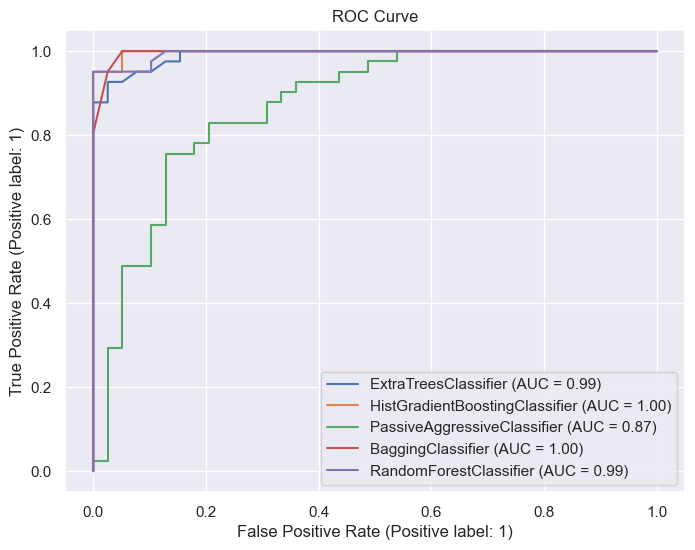

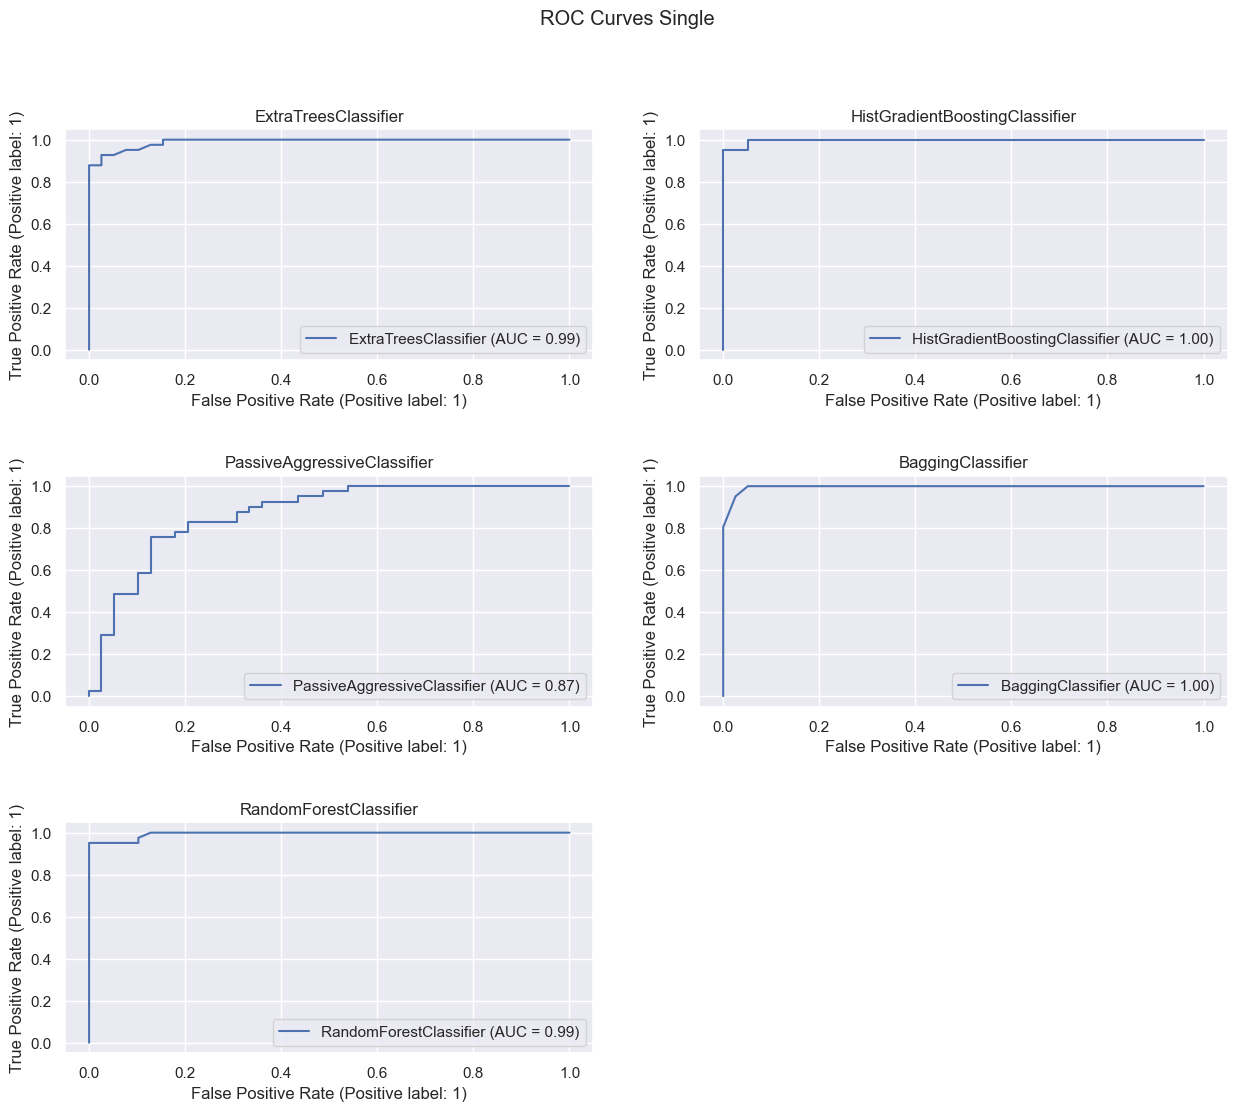

In [193]:
selected_classifier = [
                        ExtraTreesClassifier(n_jobs=n, random_state=42),
                        HistGradientBoostingClassifier(random_state=42),
                        PassiveAggressiveClassifier(random_state=42),
                        BaggingClassifier(n_jobs=n, random_state=42),
                        RandomForestClassifier(n_jobs=n, random_state=42),
                        ]


plot_roc_curves(selected_classifier, X_train, X_val, y_train, y_val)

<a class="anchor" id="Hyperparametertuning">

### 7.2.5. Hyperparameter tuning

</a>

We maximize the performance of our selected models by implementing hyperparameter tuning, that determines the right combination of hyperparameter values.

In [194]:
# # List of classifiers to test with the training data

# n = -1

# classifier = {
#             "SVC": SVC(random_state=42),
#             "GaussianNB": GaussianNB(),
#             "KNeighborsClassifier": KNeighborsClassifier(),
#             "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
#             "LogisticRegression": LogisticRegression(random_state=42),
#             "MLPClassifier": MLPClassifier(random_state=42),
#             "ExtraTreesClassifier": ExtraTreesClassifier(n_jobs=n, random_state=42),
#             "HistGradientBoostingClassifier": HistGradientBoostingClassifier(random_state=42),
#             "PassiveAggressiveClassifier": PassiveAggressiveClassifier(random_state=42),
#             "BaggingClassifier": BaggingClassifier(n_jobs=n, random_state=42),
#             "RandomForestClassifier": RandomForestClassifier(n_jobs=n, random_state=42),
#              }

In [195]:
# Saving the selected models in dictionary classifier, for 
# easier handling and calling of predefined functions.

classifier = {
            # "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
            "GaussianNB": GaussianNB(),
        #     "KNeighborsClassifier": KNeighborsClassifier(),
            "DecisionTreeClassifier": DecisionTreeClassifier(),
            # "LogisticRegression": LogisticRegression(),
            # "MLPClassifier": MLPClassifier()
             }

# Defining the hyperparameters for all models and save them in a
# dictionary.
# Parameters will be used for GridSearchCV() class from sklearn.

hyperparameters = {
            # "SVC":  {"kernel": ["linear", "poly", "rbf", "sigmoid"],
            #         "C": [1.4, 1.0, 0.1, 0.001] 
            #         },
            "DecisionTreeClassifier": {'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 4, 6, 8, 10, 12],
                                        'max_features': [None, 2, 0, 5, 'auto', 'log2'],
                                        'min_impurity_decrease': [None, 0.02],
                                        'splitter': ['best', 'random']},
            "RandomForestClassifier": {'criterion' : ['gini', 'entropy'],
                                        'n_estimators' :[30,40,50,60],
                                        'max_depth' : [3,4,5],
                                        'min_samples_split' :  [2,5],
                                        'min_samples_leaf' : [2,5],
                                        'max_features' : [None, 'sqrt', 'log2']},
        #     "KNeighborsClassifier": {"metric": ["euclidean", "manhattan", "minkowski"],
        #                             "n_neighbors": [7,8,9],
        #                             "weights": ["uniform", "distance"] 
        #                             },
            "GaussianNB": {"var_smoothing": np.logspace(0,-9, num=100)
                            },
            # "LogisticRegression": {"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"] 
            #                         },
        # #     "MLPClassifier": 
            }

In [196]:
return_f1_score(X_train_enc_scale_robust, y_train, classifier)

AttributeError: 'str' object has no attribute 'fit'

##### Decision Tree

In [ ]:
# https://www.davidsbatista.net/blog/2018/02/23/model_optimization/


# Run Gridsearch for DecisionTree

# Saving the selected models in dictionary classifier, for 
# easier handling and calling of predefined functions.

classifier = {
            "DecisionTreeClassifier": DecisionTreeClassifier(),
             }

# Defining the hyperparameters for all models and save them in a
# dictionary.
# Parameters will be used for GridSearchCV() class from sklearn.

hyperparameters = {
            "DecisionTreeClassifier": {'criterion': ['gini', "entropy"],
                                        'max_depth': [2, 4, 6, 7],
                                        # 'max_features': [None, 2, 0, 5, 'auto', 'log2'],
                                        # 'min_impurity_decrease': [None, 0.02],
                                        'splitter': ['best', 'random']
                                        },
            }

decision_table, decision_dict = run_gridsearch(
                                        data= X_train_enc_scale_robust,
                                        target= y_train,
                                        classifier= classifier,
                                        classifier_parameters= hyperparameters
                                        )


In [ ]:
display(decision_table)

decision_dict["DecisionTreeClassifier"].best_params_

In [ ]:
display(decision_table)

print(f"Best Parameters: {decision_table['Parameters'][0]} ")

feature_importance = pd.Series(decision_dict["DecisionTreeClassifier"].best_estimator_.feature_importances_, decision_dict["DecisionTreeClassifier"].best_estimator_.feature_names_in_)

feature_importance.sort_values(ascending=False)

In [ ]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(decision_dict["DecisionTreeClassifier"].best_estimator_,
                                out_file=None, 
                                feature_names=X_train_enc_scale_robust.columns,  
                                class_names=y_train.name,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

##### Random Forest

In [ ]:
# https://www.davidsbatista.net/blog/2018/02/23/model_optimization/


# Run Gridsearch for DecisionTree

# Saving the selected models in dictionary classifier, for 
# easier handling and calling of predefined functions.

classifier = {
            "RandomForestClassifier": RandomForestClassifier(),
             }

# Defining the hyperparameters for all models and save them in a
# dictionary.
# Parameters will be used for GridSearchCV() class from sklearn.

hyperparameters = {
            "RandomForestClassifier": {'criterion' : ['gini', 'entropy'],
                                        'n_estimators' :[30,40,50,60],
                                        'max_depth' : [3,4,5,6],
                                        'min_samples_split' :  [2,3],
                                        'min_samples_leaf' : [2,5,6],
                                        'max_features' : [None, 'sqrt', 'log2']},
            }

result_table, grid_dict = run_gridsearch(
                                        data= X_train_enc_scale_robust,
                                        target= y_train,
                                        classifier= classifier,
                                        classifier_parameters= hyperparameters
                                        )


In [ ]:
display(result_table)

print(f"Best Parameters: {result_table['Parameters'][0]} ")

feature_importance = pd.Series(grid_dict["RandomForestClassifier"].best_estimator_.feature_importances_, grid_dict["RandomForestClassifier"].best_estimator_.feature_names_in_)

feature_importance.sort_values(ascending=False)

In [ ]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(grid_dict["RandomForestClassifier"].best_estimator_.estimators_[2],
                                out_file=None, 
                                feature_names=X_train_enc_scale_robust.columns,  
                                class_names=y_train.name,
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

##### Models not in class

In [ ]:
voting_hard = { "VotingClassifier": VotingClassifier(estimators = [('forest', RandomForestClassifier(random_state=42)),
                                                                ('hist', HistGradientBoostingClassifier()),
                                                                ('extratree', ExtraTreesClassifier())], 
                                                                    voting='hard')}

return_f1_score(X_train, y_train, voting_hard)

In [ ]:
voting_soft = { "VotingClassifier": VotingClassifier(estimators = [('log', LogisticRegression()),
                                                                ('hist', HistGradientBoostingClassifier()),
                                                                ('extratree', ExtraTreesClassifier())], 
                                                                    voting='soft')}

return_f1_score(X_train, y_train, voting_soft)

<a class="anchor" id="Results">

## 7.3. Results

</a>

In [ ]:
#Introducing the test dataset
#Combining the different test datasets in one dataframe test_data
test_data = pd.concat([df_csv, df_test_demo, df_test_habits, df_test_health], axis=1)
test_data.head()

<a class="anchor" id="Conclusion">

## 8. Conclusion

</a>